# INFO-F-422 -  Statistical Foundations of Machine Learning

### Justine Dejaeghere - __[Justine.Dejaeghere@ulb.be](mailto:jusdejae@ulb.be)__
### Sohail El Attar - __[Sohail.El.Attar@ulb.be](mailto:selattar@ulb.be)__
### Pierrot Van der Aa - __[Pierrot.Van.der.Aa@ulb.be](mailto:pvderaa@ulb.be)__

### Zindi team Tofuu - group 1

## Project - Urban Air Pollution Challenge

####  April - May 2024

# Introduction

## Research context

During the COVID19 crisis (2020), lots of people had to stay at home to prevent the spread of the disease. This lead to air quality improvement. One way of assessing the air quality is through the measure of PM2.5 (PM stands for particulate matter and 2.5 indicates that their size is equal or smaller than 2.5µm) concentration in the air. The main source of PM2.5 in the air comes from the roads ([Tucker (2000)](https://doi.org/10.1016/S0378-3820(99)00105-8)).

The goal of this project is to predict PM2.5 particulate matter concentration in the air. This goal is relevant to the pandemic studies because COVID19 affects the respiratory system so does PM2.5 ([Xing et al. (2016)](https://jtd.amegroups.org/article/view/6353/6196)).

# Material and methods

In order to answer this research question, we have different data available to us:

- data collected on Earth: PM2.5 concentration in the air from sensors, humidity, temperature and wind speed from the Global Forecast System ([GFS](https://developers.google.com/earth-engine/datasets/catalog/NOAA_GFS0P25)).
- satellite data from the [Sentinel-5](https://developers.google.com/earth-engine/datasets/catalog/sentinel-5p) satellite: ozone, methane, formaldehyde, aerosol, carbon monoxide, nitrogen oxide, sulphur dioxide and cloud behavior in the air assessed from space.

These data will be used to train four machine learning algorithms.

## Elastic net

Elastic Net is a type of linear model that combines ridge and lasso regression.

Lasso (Least Absolute Shrinkage and Selection Operator) uses an L1 penalty which can lead to certain coefficients being estimated at zero, thus carrying out a selection of variables.

Ridge uses an L2 penalty which does not reduce the coefficients to zero but does reduce them.

Elastic Net combines the L1 and L2 penalties, allowing variable selection like the Lasso while retaining Ridge's grouping properties.

The Elastic Net formula is as follows: 

$$

P_{\alpha}(\beta) = (1 - \alpha) \frac{||\beta||^2_2}{2} + \alpha ||\beta||_1

$$

where
- is the vector of model coefficients.
- $||\beta||_1$ is the L1 norm of $\beta$ (sum of the absolute values of the coefficients).

- $||\beta||^2_2$ is the L2 norm of $\beta$ (sum of the squares of the coefficients).

- is a parameter that controls the trade-off between the L1 (Lasso) and L2 (Ridge) penalties.

The $\alpha$ parameter in glmnet controls the trade-off between the L1 and L2 penalties. When $\alpha = 1$, the Elastic Net is equivalent to the Lasso. When $\alpha$ tends towards 0, the Elastic Net approaches Ridge regression. For other values of $\alpha$, the penalty term $P_{\alpha}(\beta)$ interpolates between the L1 norm of $\alpha$ and the L2 squared norm of $\alpha$
([scikit-learn](https://scikit-learn.sourceforge.net/stable/modules/generated/sklearn.linear_model.ElasticNet.html)).
The lambda regularisation parameter controls the degree of shrinkage of the model's coefficients. When lambda is 0, no shrinkage occurs, and as lambda increases, the coefficients are increasingly reduced. This shrinkage occurs independently of the value of alpha 
([machinelearningcompass](https://machinelearningcompass.com/machine_learning_models/elastic_net_regression/)).
It was decided to use this approach based on the following [diagram](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) from sci-kit learn. We are working on a regression task, we have less than 100k samples and we don't know a priori whether some or several characteristics are important. This lead us to consider both the elastic net algorithm and the following algorithm (support vector machine).

## Support vector machine

SVM increases the dimensionality and relies on the so-called large margin factor. This method can also be extended to solve regression problems where the target variable is quantitative to find the best fit line (hyperplane).
This extension is called Support Vector Regression.

Unlike least squares regression, support vector regression focuses on minimizing a different form of loss.  In this scenario, only residuals that are greater in absolute value than a specified constant make a difference to the loss function. The concept of margin, typically utilized in support vector classifiers, is thus extended to the regression framework ([James et al. (2013)](https://hastie.su.domains/ISLR2/ISLRv2_corrected_June_2023.pdf.download.html)). SVM offer different advantages:

- Efficiency in high-dimensional spaces, even if the number of dimensions is greater than the number of samples.
- The use of a subset of training points in the decision function (called support vectors) saves memory.
- Versatile: different kernel functions can be specified according to modeling needs.

As previously mentioned, we chose to consider this algorithm based on the [diagram](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) from sci-kit learn.

## Random forest

The random forest algorithm was selected because it often performs best on tabular data and it is the kind of data we have. Moreover, this [article](https://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf) suggests the use of random forest. This is a tree-based method. It works by aggregating multiple decision trees in order to reduce the variance of a single tree. The advantages of random forest are:

- robust to overfitting and less sensitive to noise
- capable of handling non-linear relationships
- low sensitivity to hyperparameter tuning

## Light Gradient Boosting Tree

Boosting methods are, like random forest, tree-based methods except that, instead of combining full grown trees, it combines the predictions of weak learners (small regression trees). Classical boosting algorithms function iteratively and are therefore slower than random forest to compute (because each tree of a random forest can be grown in parallel). However, [Ke et al. (2017)](https://proceedings.neurips.cc/paper_files/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf) developped an alternative to classical boosting methods. This algorithm sorts the data into bins which allows to reduce greatly the computation time. Some of the advantages of LightGBM:

- computationally optimised and efficient with the possibility to do multi-threading
- binning continuous features into discrete bins allows for better memory usage
- as for the random forest, capable of handling non-linear relationships

# Data preprocessing

We first load the packages used in this project:

In [38]:
library(dplyr) #for the pipe operator %>%
library(ggplot2) #to plot graphs
library(caret) #for the one-hot-encoding
library(randomForest) #for the random forest algorithm
library(lightgbm) #for the LightGBM algorithm
library(e1071) #for the SVM
library(glmnet) #for the elastic net

We set a seed to allow for other users to obtain the same results as us.

In [39]:
#Set seed for reproducibility
set.seed(42)

In [40]:
#Set the working directory
setwd("/home/pierrot/pCloudDrive/Mabisbis/Statistical_Foundation_of_Machine_Learning/Project/")
#Import the data
data <- read.csv("Train.csv", header = TRUE)
head(data)
dim(data)

,Place_ID.X.Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,010Q650 X 2020-01-02,2020-01-02,010Q650,38,23,53,769.50,92,11.000000,60.2,⋯,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,010Q650 X 2020-01-03,2020-01-03,010Q650,39,25,63,1319.85,91,14.600000,48.8,⋯,59.6249116,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365
3,010Q650 X 2020-01-04,2020-01-04,010Q650,24,8,56,1181.96,96,16.400000,33.4,⋯,49.8397137,-78.34270,34.29698,NA,NA,NA,NA,NA,NA,NA
4,010Q650 X 2020-01-05,2020-01-05,010Q650,49,10,55,1113.67,96,6.911948,21.3,⋯,29.1812580,-73.89659,30.54545,NA,NA,NA,NA,NA,NA,NA
5,010Q650 X 2020-01-06,2020-01-06,010Q650,21,9,52,1164.82,95,13.900001,44.7,⋯,0.7972941,-68.61248,26.89969,NA,NA,NA,NA,NA,NA,NA
6,010Q650 X 2020-01-07,2020-01-07,010Q650,28,10,52,1053.22,94,14.600000,42.2,⋯,30.6051757,-62.13426,23.41999,NA,NA,NA,NA,NA,NA,NA


[1] 30557    82

We first look at proportions of NAs within each of the column.

In [41]:
colMeans(is.na(data))

Place_ID.X.Date 
                                        0.000000000 
                                               Date 
                                        0.000000000 
                                           Place_ID 
                                        0.000000000 
                                             target 
                                        0.000000000 
                                         target_min 
                                        0.000000000 
                                         target_max 
                                        0.000000000 
                                    target_variance 
                                        0.000000000 
                                       target_count 
                                        0.000000000 
               precipitable_water_entire_atmosphere 
                                        0.000000000 
                  relative_humidity_2m_above_ground 
                                        0.000000000 
                  specific_humidity_2m_above_ground 
                                        0.000000000 
                        temperature_2m_above_ground 
                                        0.000000000 
               u_component_of_wind_10m_above_ground 
                                        0.000000000 
               v_component_of_wind_10m_above_ground 
                                        0.000000000 
                   L3_NO2_NO2_column_number_density 
                                        0.071636614 
             L3_NO2_NO2_slant_column_number_density 
                                        0.071636614 
                     L3_NO2_absorbing_aerosol_index 
                                        0.071636614 
                              L3_NO2_cloud_fraction 
                                        0.071636614 
                             L3_NO2_sensor_altitude 
                                        0.071636614 
                        L3_NO2_sensor_azimuth_angle 
                                        0.071669339 
                         L3_NO2_sensor_zenith_angle 
                                        0.071669339 
                         L3_NO2_solar_azimuth_angle 
                                        0.071669339 
                          L3_NO2_solar_zenith_angle 
                                        0.071669339 
     L3_NO2_stratospheric_NO2_column_number_density 
                                        0.071669339 
                         L3_NO2_tropopause_pressure 
                                        0.071669339 
      L3_NO2_tropospheric_NO2_column_number_density 
                                        0.283699316 
                     L3_O3_O3_column_number_density 
                                        0.009261380 
                     L3_O3_O3_effective_temperature 
                                        0.009261380 
                               L3_O3_cloud_fraction 
                                        0.009261380 
                         L3_O3_sensor_azimuth_angle 
                                        0.009261380 
                          L3_O3_sensor_zenith_angle 
                                        0.009261380 
                          L3_O3_solar_azimuth_angle 
                                        0.009261380 
                           L3_O3_solar_zenith_angle 
                                        0.009261380 
                     L3_CO_CO_column_number_density 
                                        0.177471610 
                    L3_CO_H2O_column_number_density 
                                        0.177471610 
                                 L3_CO_cloud_height 
                                        0.177471610 
                              L3_CO_sensor_altitude 
                                        0.177471610 
                         L3_CO_sensor_azimuth_angle 
                                        0.177471610 
        

Here we check the type of each column to see wether or not there are categorical variables.

In [42]:
sapply(data, typeof)

Place_ID.X.Date 
                                        "character" 
                                               Date 
                                        "character" 
                                           Place_ID 
                                        "character" 
                                             target 
                                           "double" 
                                         target_min 
                                           "double" 
                                         target_max 
                                           "double" 
                                    target_variance 
                                           "double" 
                                       target_count 
                                          "integer" 
               precipitable_water_entire_atmosphere 
                                           "double" 
                  relative_humidity_2m_above_ground 
                                           "double" 
                  specific_humidity_2m_above_ground 
                                           "double" 
                        temperature_2m_above_ground 
                                           "double" 
               u_component_of_wind_10m_above_ground 
                                           "double" 
               v_component_of_wind_10m_above_ground 
                                           "double" 
                   L3_NO2_NO2_column_number_density 
                                           "double" 
             L3_NO2_NO2_slant_column_number_density 
                                           "double" 
                     L3_NO2_absorbing_aerosol_index 
                                           "double" 
                              L3_NO2_cloud_fraction 
                                           "double" 
                             L3_NO2_sensor_altitude 
                                           "double" 
                        L3_NO2_sensor_azimuth_angle 
                                           "double" 
                         L3_NO2_sensor_zenith_angle 
                                           "double" 
                         L3_NO2_solar_azimuth_angle 
                                           "double" 
                          L3_NO2_solar_zenith_angle 
                                           "double" 
     L3_NO2_stratospheric_NO2_column_number_density 
                                           "double" 
                         L3_NO2_tropopause_pressure 
                                           "double" 
      L3_NO2_tropospheric_NO2_column_number_density 
                                           "double" 
                     L3_O3_O3_column_number_density 
                                           "double" 
                     L3_O3_O3_effective_temperature 
                                           "double" 
                               L3_O3_cloud_fraction 
                                           "double" 
                         L3_O3_sensor_azimuth_angle 
                                           "double" 
                          L3_O3_sensor_zenith_angle 
                                           "double" 
                          L3_O3_solar_azimuth_angle 
                                           "double" 
                           L3_O3_solar_zenith_angle 
                                           "double" 
                     L3_CO_CO_column_number_density 
                                           "double" 
                    L3_CO_H2O_column_number_density 
                                           "double" 
                                 L3_CO_cloud_height 
                                           "double" 
                              L3_CO_sensor_altitude 
                                           "double" 
                         L3_CO_sensor_azimuth_angle 
                                           "double" 
        

From the code chunk here above, we can see that almost all the columns contain only `double` (except the first three which are characters) which means that we can apply formulas on them and that we need to do one-hot-encoding only on the first three columns.

In [43]:
data_numeric <- subset(data, select = -c(Place_ID.X.Date, Date, Place_ID))
dim(data_numeric)

[1] 30557    79

In [44]:
summary(data_numeric)

     target         target_min       target_max  target_variance  
 Min.   :  1.00   Min.   :  1.00   Min.   :  1   Min.   :      0  
 1st Qu.: 25.00   1st Qu.:  5.00   1st Qu.: 60   1st Qu.:   1065  
 Median : 50.00   Median : 15.00   Median : 91   Median :   2395  
 Mean   : 61.15   Mean   : 29.03   Mean   :118   Mean   :   7984  
 3rd Qu.: 80.00   3rd Qu.: 44.00   3rd Qu.:155   3rd Qu.:   5883  
 Max.   :815.00   Max.   :438.00   Max.   :999   Max.   :1841490  
                                                                  
  target_count    precipitable_water_entire_atmosphere
 Min.   :   2.0   Min.   : 0.420                      
 1st Qu.:  44.0   1st Qu.: 7.667                      
 Median :  72.0   Median :12.200                      
 Mean   : 125.8   Mean   :15.302                      
 3rd Qu.: 150.0   3rd Qu.:19.900                      
 Max.   :1552.0   Max.   :72.600                      
                                                      
 relative_humidity_2m_ab

Here we inspect the target variable and we can see that there are a few extreme values.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   25.00   50.00   61.15   80.00  815.00 

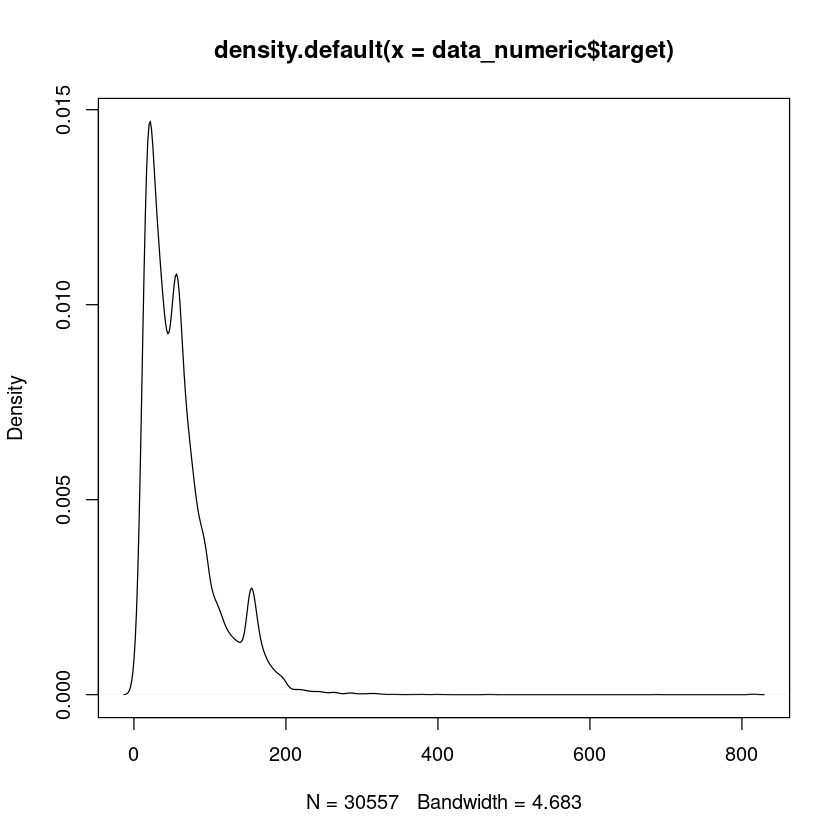

In [45]:
plot(density(data_numeric$target))
summary(data_numeric$target)

We classify the different columns based on the topic group they are related to.

In [46]:
col_names_c <- colnames(data_numeric)
chem <- c("L3_NO2_", "L3_O3_", "L3_CO_", "L3_HCHO_", "L3_CLOUD_", "L3_SO2", "L3_CH4", "L3_AER_AI")

categories <- list()

for (i in chem) {
  cat <- col_names_c[startsWith(col_names_c, i)]
  categories[[i]] <- cat
}
categories[["WEATHER"]] <-  colnames(data_numeric[6:11])

print(categories)

$L3_NO2_
 [1] "L3_NO2_NO2_column_number_density"              
 [2] "L3_NO2_NO2_slant_column_number_density"        
 [3] "L3_NO2_absorbing_aerosol_index"                
 [4] "L3_NO2_cloud_fraction"                         
 [5] "L3_NO2_sensor_altitude"                        
 [6] "L3_NO2_sensor_azimuth_angle"                   
 [7] "L3_NO2_sensor_zenith_angle"                    
 [8] "L3_NO2_solar_azimuth_angle"                    
 [9] "L3_NO2_solar_zenith_angle"                     
[10] "L3_NO2_stratospheric_NO2_column_number_density"
[11] "L3_NO2_tropopause_pressure"                    
[12] "L3_NO2_tropospheric_NO2_column_number_density" 

$L3_O3_
[1] "L3_O3_O3_column_number_density" "L3_O3_O3_effective_temperature"
[3] "L3_O3_cloud_fraction"           "L3_O3_sensor_azimuth_angle"    
[5] "L3_O3_sensor_zenith_angle"      "L3_O3_solar_azimuth_angle"     
[7] "L3_O3_solar_zenith_angle"      

$L3_CO_
[1] "L3_CO_CO_column_number_density"  "L3_CO_H2O_column_number_density"
[3] "L

This code chunck produces histograms of each numerical column and group them per chemical.

Histogram for L3_NO2_ 
Histogram for L3_O3_ 


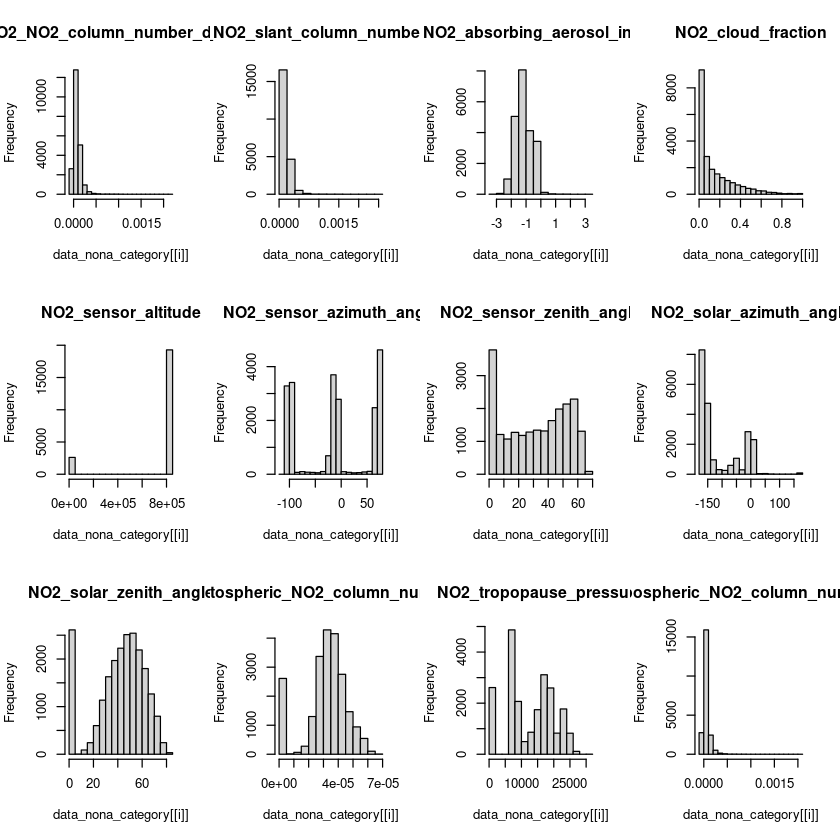

Histogram for L3_CO_ 


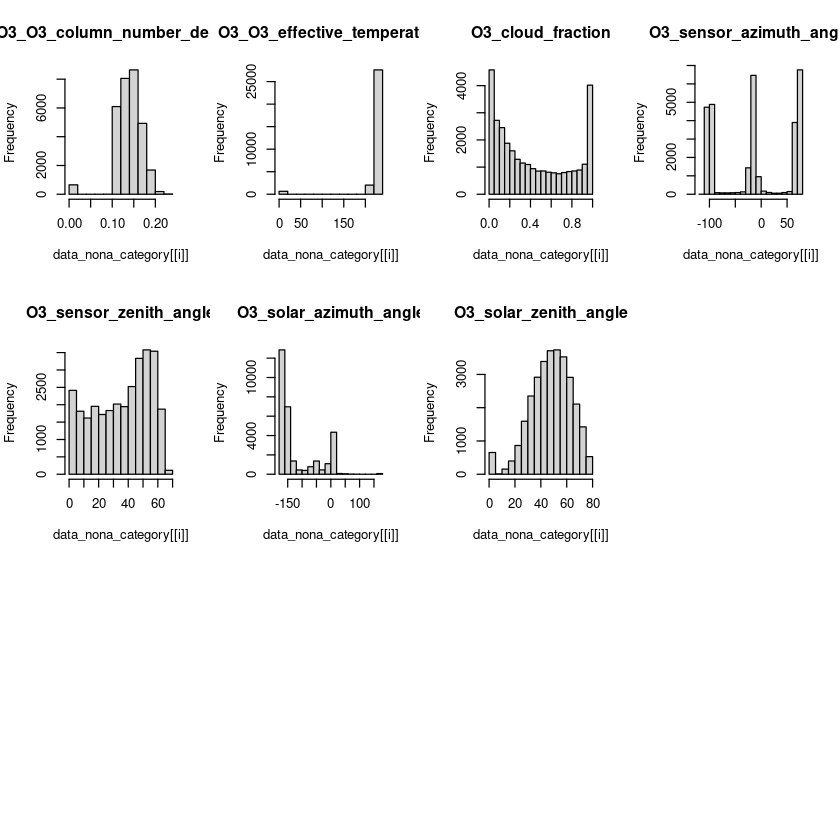

Histogram for L3_HCHO_ 


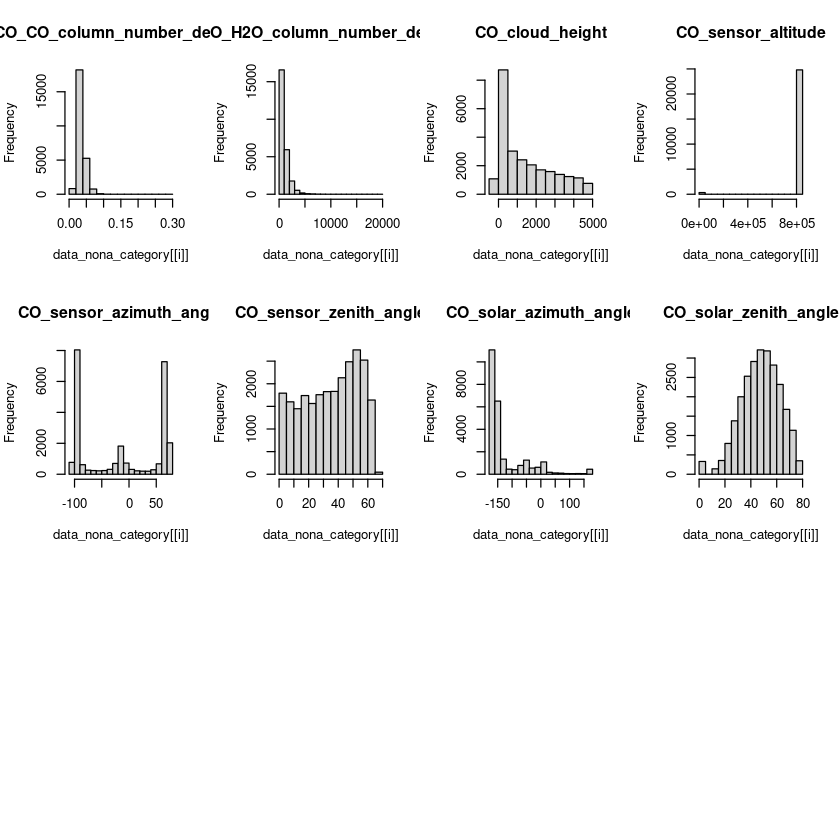

Histogram for L3_CLOUD_ 


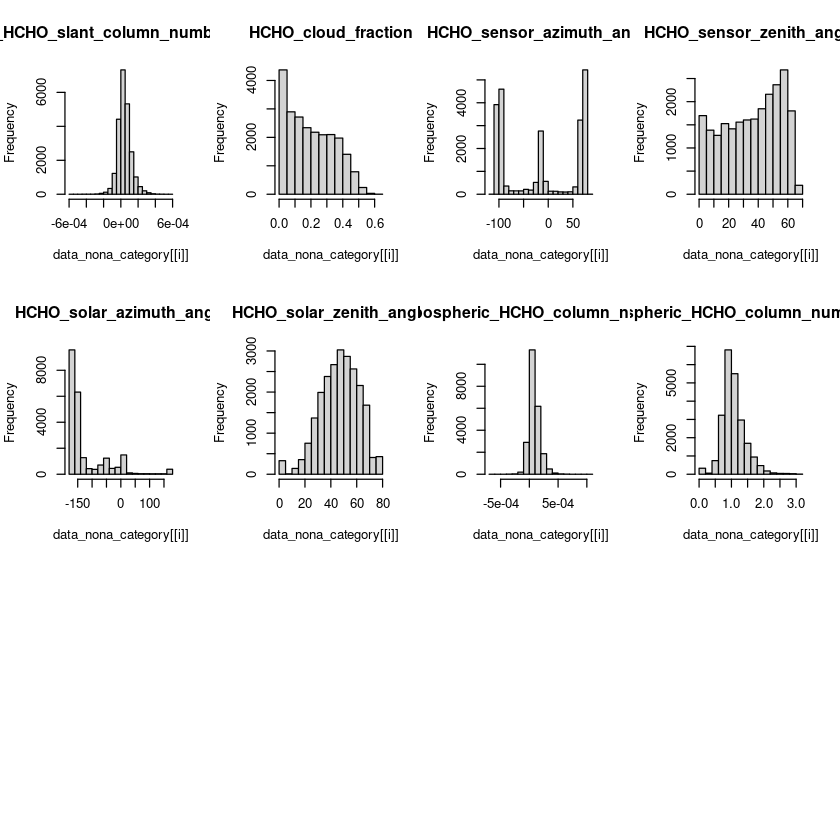

Histogram for L3_SO2 


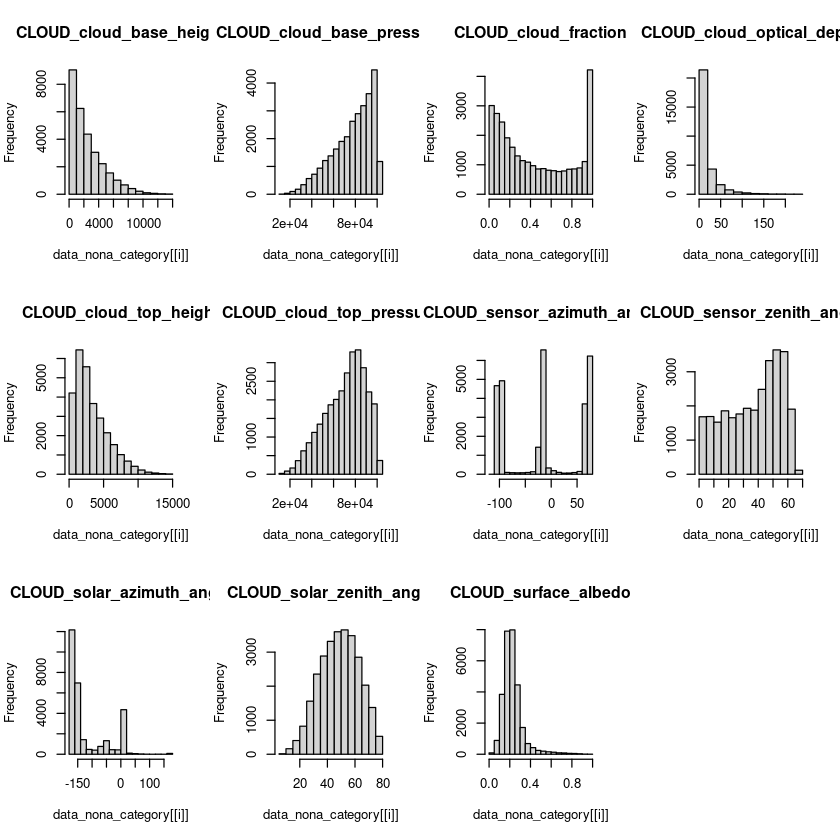

Histogram for L3_CH4 


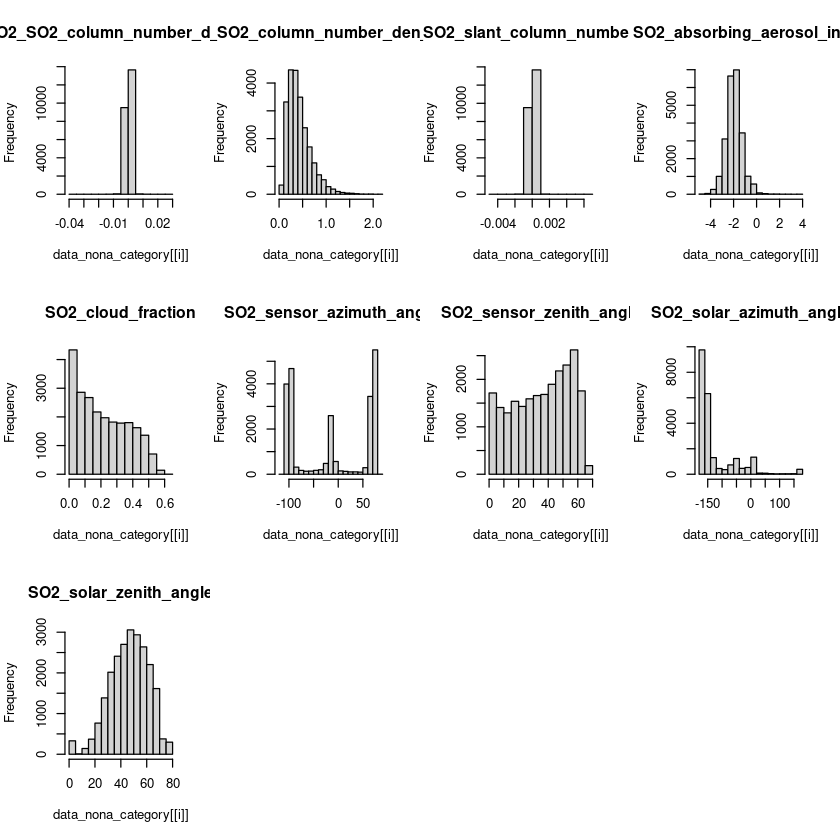

Histogram for L3_AER_AI 


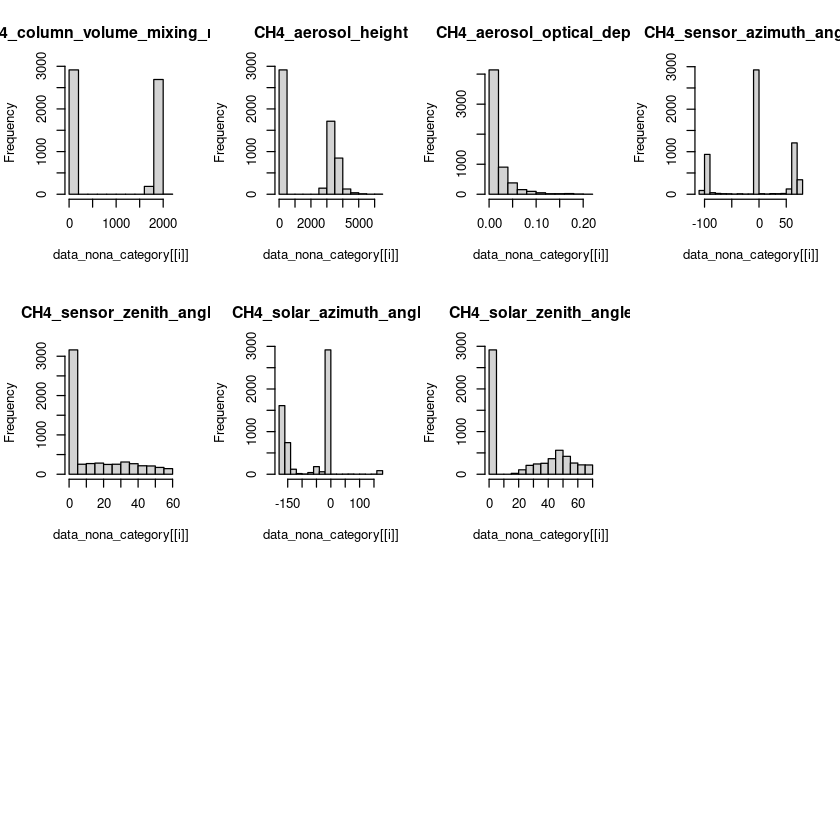

Histogram for WEATHER 


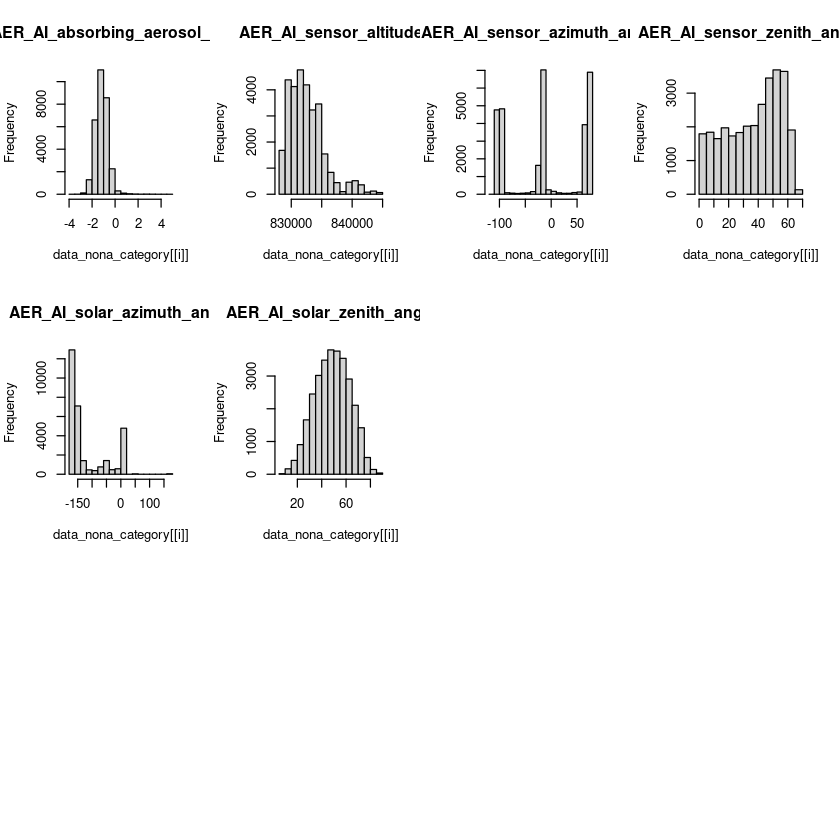

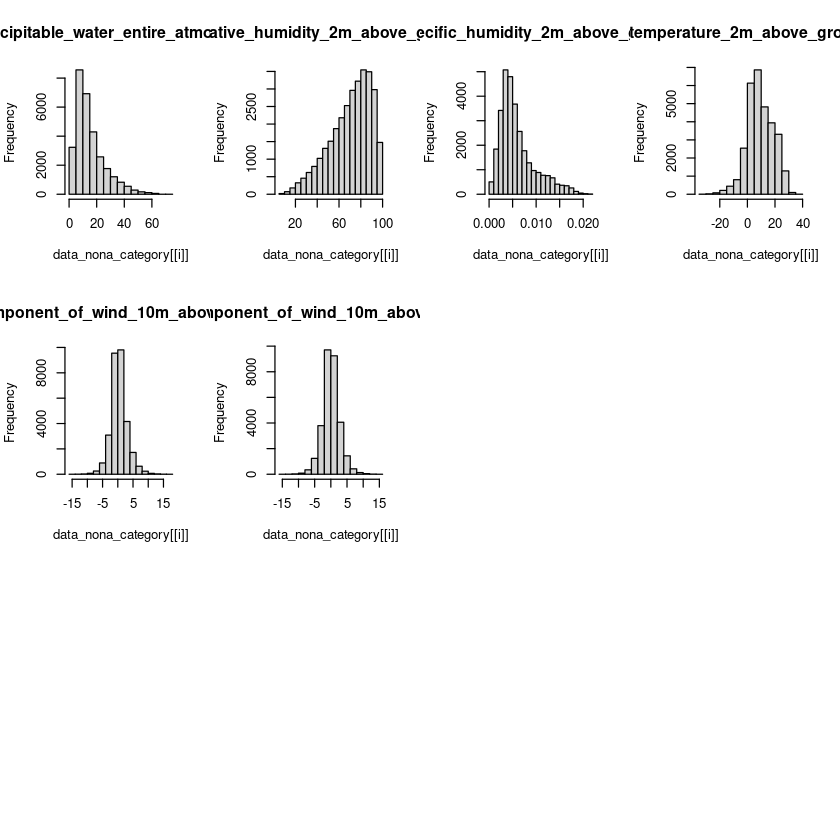

In [47]:
for (category_name in names(categories)) {
  numericaldata <- categories[[category_name]]

  data_category <- subset(data, select = numericaldata)
  
  data_nona_category <- na.omit(data_category)
  
  cat(paste("Histogram for", category_name, "\n"))
  par(mfrow = c(3,4))
  for (i in numericaldata) {
    hist(data_nona_category[[i]], main = gsub('L3_', '', i))
  }
}

These diagrams displayed abnormal amounts of zeros (e.g. the histogram of `NO2_column_number_density`). We then inspected the visually the dataset in R and found out that there were two types of data: 

- values with four decimal digits (e.g. 0.0000)
- zeros with no decimal digits

In the following part of this project, we considered that the zeros with no decimal digits were in fact missing data which were not correctly encoded.

Thus, the following code chunk is looking for occurrences of exactly '0' in the numerical dataframe.

In [48]:
i <- 0
for(column in colnames(data_numeric)){
    
    column <- na.omit(data_numeric[[column]])
    if('0' %in% as.character(column)){
        i <- i + sum(column == 0)
    }
}
# Print total count of '0'
print(i)

[1] 69032


The following function takes our dataframe as input and another empty dataframe in which it will store the new columns without the 'fake' zeros.

In [49]:
replace_fake_zeros <- function(df, empty_df){
    for(column in colnames(df)){
        column_data <- df[[column]]
        for(i in seq_along(column_data)){
            if(is.na(column_data[i])){

            } else if(as.character(column_data[i]) == '0'){
                column_data[i] <- NA
            }
        }
        empty_df[[column]] <- column_data
    }
    return(empty_df)
}

In [50]:
#This cell replace all the occurence of exactly '0' by NAs
data_nozero <- subset(data, select = c(Place_ID.X.Date, Date, Place_ID))
data_nozero <- replace_fake_zeros(data_numeric, data_nozero)

In [51]:
sum(is.na(data_numeric))
sum(is.na(data_nozero))

[1] 388262

[1] 457294

We can see that we have now much more missing data (i.e. 69032).

We can visualise the amount of missing data in the following plot.

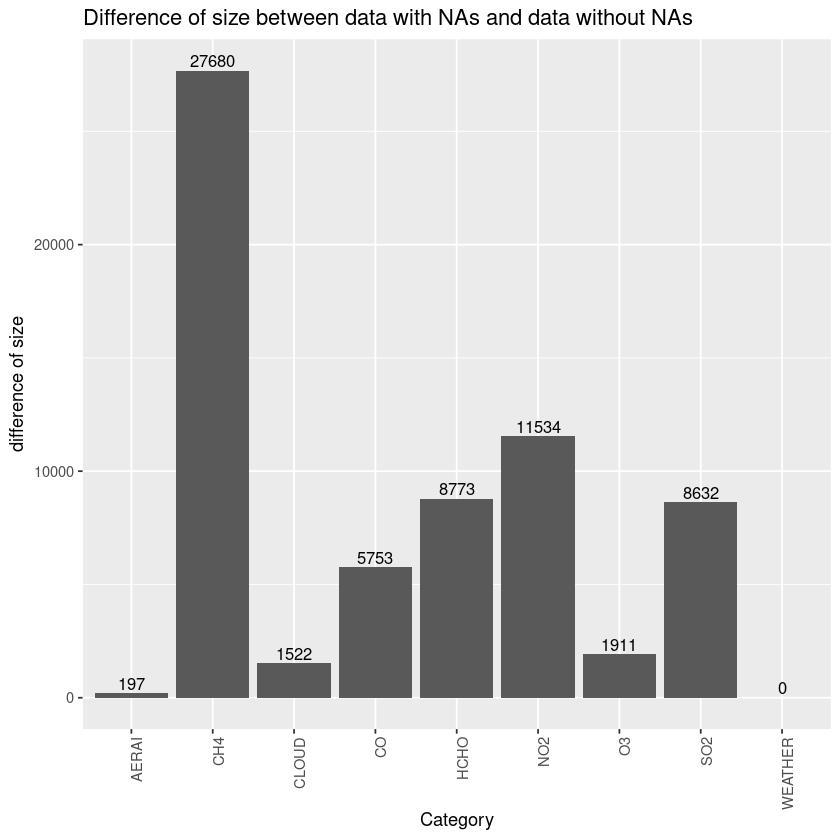

In [52]:
size_diff <- c()
for (category_name in names(categories)) {
  numericaldata <- categories[[category_name]]

  data_category <- subset(data_nozero, select = numericaldata)

  data_nona_category <- na.omit(data_category)
  diff <- nrow(data_category) - nrow(data_nona_category)
  size_diff <- c(size_diff, diff)
}
df <- data.frame(Category = gsub('_', '', gsub('L3_', '' ,names(categories))), SizeDifference = size_diff)
ggplot(df, aes(x = Category, y = SizeDifference)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = SizeDifference), vjust = -0.3, size = 3.5) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = "Category", y = "difference of size", title = "Difference of size between data with NAs and data without NAs")

From the plot here above and the histograms shown previously, we took the following decisions:

- CH4: due to too many missing data (more than 80%), we decided to discard those columns completely
- in order to not impact too much the distribution of the data, the following column will have their missing data replaced by their median (HCHO: solar_azimuth_angle, CO: H2O_column_number_density, O3: solar_azimuth_angle).
- The 197 missing data from AER (aerosol index) will be discarded because those are lines with too much missing data and that deleting them does not impact much the size of the dataset.
- all the other missing data will be replaced by the mean of their respective column

We start by deleting rows containing missing data in AER.

In [53]:
#delete rows with lots of NAs in L3_AER, the other NA are gonna be replaced by the mean or median of the column
dim(data_nozero)
data_nona_AER <- data_nozero[complete.cases(data_nozero[ , "L3_AER_AI_absorbing_aerosol_index"]),]
dim(data_nona_AER)

[1] 30557    82

[1] 30360    82

This function replace all the missing data by the mean of their column except in the columns specified as input.

In [54]:
replace_na_by_mean <- function(df, column_exception) {
  for (name_column in names(df)) {
    if (!(name_column %in% column_exception)) { #to go through all columns except the ones listed above
      is_na <- is.na(df[[name_column]])
      mean_column <- mean(df[[name_column]], na.rm = TRUE)
      df[[name_column]][is_na] <- mean_column
    }
  }
  return(df)
}

In [55]:
column_no_mean <- c("Place_ID.X.Date", "Date", "Place_ID",
                    "L3_HCHO_solar_azimuth_angle","L3_CO_H2O_column_number_density","L3_O3_solar_azimuth_angle")
sum(is.na(replace_na_by_mean(data_nona_AER, column_no_mean)))
data_nona_mean <- replace_na_by_mean(data_nona_AER, column_no_mean)

[1] 13853

This function replace all the missing data by the median of their column only in the columns specified as input.

In [56]:
replace_na_by_median <- function(df, column_exception) {
  for (name_column in names(df)) {
    if (name_column %in% column_exception) { #to go through only the columns listed above
      is_na <- is.na(df[[name_column]])
      median_column <- median(df[[name_column]], na.rm = TRUE)
      df[[name_column]][is_na] <- median_column
    }
  }
  return(df)
}

In [57]:
column_median <- c("L3_HCHO_solar_azimuth_angle","L3_CO_H2O_column_number_density","L3_O3_solar_azimuth_angle")
sum(is.na(replace_na_by_median(data_nona_mean, column_median)))
data_nona <- replace_na_by_median(data_nona_mean, column_median)

[1] 0

Here we delete all the columns from the methane (CH4) data bacause they contain too many missing values.

In [58]:
#We decided to delete the columns for the methane (CH4)
data_clean_nums <- subset(data_nona, select = -c(L3_CH4_CH4_column_volume_mixing_ratio_dry_air,
                                                    L3_CH4_aerosol_height,
                                                    L3_CH4_aerosol_optical_depth,
                                                    L3_CH4_sensor_azimuth_angle,
                                                    L3_CH4_sensor_zenith_angle,
                                                    L3_CH4_solar_azimuth_angle,
                                                    L3_CH4_solar_zenith_angle))
summary(data_clean_nums)
dim(data_clean_nums)

 Place_ID.X.Date        Date             Place_ID             target      
 Length:30360       Length:30360       Length:30360       Min.   :  1.00  
 Class :character   Class :character   Class :character   1st Qu.: 25.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 50.00  
                                                          Mean   : 61.19  
                                                          3rd Qu.: 80.00  
                                                          Max.   :815.00  
   target_min       target_max  target_variance      target_count   
 Min.   :  1.00   Min.   :  1   Min.   :      0.4   Min.   :   2.0  
 1st Qu.:  5.00   1st Qu.: 60   1st Qu.:   1072.1   1st Qu.:  44.0  
 Median : 15.00   Median : 91   Median :   2410.6   Median :  72.0  
 Mean   : 29.08   Mean   :118   Mean   :   7996.5   Mean   : 125.6  
 3rd Qu.: 44.00   3rd Qu.:155   3rd Qu.:   5943.4   3rd Qu.: 150.0  
 Max.   :438.00   Max.   :999   Max.   :1841490.0   Max.   :1

[1] 30360    75

The next step was to deal with categorical data. We have three columns which are encoded as characters:

- Place_ID: this column denotes a special code for each country, we will try to one-hot-encode this column in the following part of our analysis
- Date: we will have to deal with part of the data too.
- Place_ID X Date: this column is just a combination of the previous two and is only useful for the test set and the submission to Zindi.

We first perform here a one-hot encoding on the Place_ID column.

In [59]:
dummy <- dummyVars("~ Place_ID", data = data_clean_nums)
data_one_hot <- data.frame(predict(dummy, newdata = data_clean_nums)) 
data_encoded <- cbind(subset(data_clean_nums,select = -c(Place_ID)), data_one_hot)
dim(data_encoded)

[1] 30360   414

This makes the feature space explode to 414 features but we will deal with that problem later.

In [60]:
data_encoded$Date <-as.Date(data_encoded$Date)
data_encoded$Date<-as.numeric(format(data_encoded$Date,"%m"))

We decided to discard the descriptors of the target (minimum, maximum, variance and count) given that they are absent of the test set.

In [61]:
data_clean <- subset(data_encoded, select = -c(Place_ID.X.Date,target_min, target_max,target_variance,target_count))
dim(data_clean)

[1] 30360   409

Now that we have a clean training set, we can apply all our preprocessing steps to the test set.

In [62]:
#Load the test data
test_data <- read.csv('Test.csv', header = TRUE)
dim(test_data)

#This cell replace all the occurence of exactly '0' by NAs
test_numeric <- subset(test_data, select = -c(Place_ID.X.Date, Date, Place_ID))
test_nozero <- subset(test_data, select = c(Place_ID.X.Date, Date, Place_ID))
test_nozero <- replace_fake_zeros(test_numeric, test_nozero)

#Replace NA by the mean of the column
column_no_mean <- c("Place_ID.X.Date", "Date", "Place_ID",
                    "L3_HCHO_solar_azimuth_angle","L3_CO_H2O_column_number_density","L3_O3_solar_azimuth_angle")
test_nona_mean <- replace_na_by_mean(test_nozero, column_no_mean)

#Replace NA by the median of the column
column_median <- c("L3_HCHO_solar_azimuth_angle","L3_CO_H2O_column_number_density","L3_O3_solar_azimuth_angle")
test_nona <- replace_na_by_median(test_nona_mean, column_median)

#One-hot-encoding
dummy <- dummyVars("~ Place_ID", data = test_nona)
test_one_hot <- data.frame(predict(dummy, newdata = test_nona)) 
test_encoded <- cbind(subset(test_nona,select = -c(Place_ID)), test_one_hot)

#Encode the date as just the month
test_encoded$Date <-as.Date(test_encoded$Date)
test_encoded$Date<-as.numeric(format(test_encoded$Date,"%m"))

#Delete the CH4 columns
test_clean <- subset(test_encoded, select = -c(L3_CH4_CH4_column_volume_mixing_ratio_dry_air,
                                                    L3_CH4_aerosol_height,
                                                    L3_CH4_aerosol_optical_depth,
                                                    L3_CH4_sensor_azimuth_angle,
                                                    L3_CH4_sensor_zenith_angle,
                                                    L3_CH4_solar_azimuth_angle,
                                                    L3_CH4_solar_zenith_angle))

dim(test_clean)

[1] 16136    77

[1] 16136   248

The test set is of lower dimension than the training set which cannot be possible for the rest of the analyses. This is why, in the following cells we withdraw all the columns present in one dataset only.

In [63]:
dim(test_clean)
missing_col_data_clean <- setdiff(colnames(test_clean),colnames(data_clean))
place_ID_date <- test_clean$Place_ID.X.Date
test_less_features <- test_clean[, !(colnames(test_clean) %in% missing_col_data_clean)]
test_less_features <- data.frame(place_ID_date, test_less_features)
dim(test_less_features)
head(test_less_features)

[1] 16136   248

[1] 16136    69

,place_ID_date,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,⋯,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0OS9LVX X 2020-01-02,1,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,⋯,22.94202,2.207098e-04,0.7844364,1.835919e-04,-0.1404579,0.032070799,68.09937,1.445658,-95.98498,22.94202
2,0OS9LVX X 2020-01-03,1,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,⋯,18.53952,3.386942e-05,0.6789883,1.353507e-05,-0.8427128,0.040803427,75.93681,34.641758,-95.01491,18.53912
3,0OS9LVX X 2020-01-04,1,17.60000,41.3,0.00590000,15.51104,5.245728,1.6405591,5.035383e-05,0.0001344593,⋯,14.14082,1.839346e-04,0.6677681,1.219163e-04,-0.7167696,0.007112971,75.55244,55.872276,-94.01542,14.14082
4,0OS9LVX X 2020-01-05,1,15.01195,53.1,0.00709000,14.44186,5.454001,-0.1905322,5.499153e-05,0.0001546277,⋯,32.73075,2.008748e-04,0.6967723,1.328754e-04,-0.7301036,0.062076021,-102.28513,59.174188,-97.24760,32.73055
5,0OS9LVX X 2020-01-06,1,9.70000,71.6,0.00808000,11.89630,3.511787,-0.2794409,5.508028e-05,0.0001308539,⋯,28.32053,9.338975e-05,0.6773054,6.526173e-05,-0.1083527,0.042776815,-102.13396,40.925873,-96.05727,28.32053
6,0OS9LVX X 2020-01-07,1,13.40000,69.3,0.00828156,12.74487,3.945603,-0.2409253,5.809714e-05,0.0001141703,⋯,23.90786,8.664031e-05,0.7463363,4.455912e-05,0.2506700,0.039987010,-102.89442,10.836973,-94.79964,23.90786


In [64]:
dim(data_clean)
missing_col_test_clean <- setdiff(colnames(data_clean),colnames(test_less_features))
target <- data_clean$target
data_less_features <- data_clean[, !(colnames(data_clean) %in% missing_col_test_clean)]
data_less_features <- data.frame(data_less_features, target)
dim(data_less_features)
head(data_less_features)

[1] 30360   409

[1] 30360    69

,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,⋯,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,target
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,11.000000,60.2,0.00804000,18.51684,1.996377,-1.2273949,7.383038e-05,0.0001558203,-1.2313303,⋯,-1.268545e-04,0.3125208,-4.046582e-05,-1.8614757,0.22682776,76.53643,38.5930174,-61.75259,22.36366,38
2,1,14.600000,48.8,0.00839000,22.54653,3.330430,-1.1881078,7.603261e-05,0.0001968663,-1.0825535,⋯,1.502963e-04,0.4339572,5.021103e-05,-1.4526119,0.05943286,-14.70804,59.6249116,-67.69351,28.61480,39
3,1,16.400000,33.4,0.00750000,27.03103,5.065727,3.5005591,6.660776e-05,0.0001704180,-1.0012421,⋯,1.500964e-04,0.3569246,5.294885e-05,-1.5729503,0.08206301,-105.20134,49.8397137,-78.34270,34.29698,24
4,1,6.911948,21.3,0.00391000,23.97186,3.004001,1.0994678,8.258178e-05,0.0001748593,-0.7770191,⋯,2.272130e-04,0.5845225,1.097052e-04,-1.2393168,0.12126134,-104.33407,29.1812580,-73.89659,30.54545,49
5,1,13.900001,44.7,0.00535000,16.81631,2.621787,2.6705589,7.038484e-05,0.0001415511,0.3663234,⋯,3.897672e-04,0.4080472,1.589104e-04,0.2024888,0.03791943,58.85018,0.7972941,-68.61248,26.89969,21
6,1,14.600000,42.2,0.00586156,19.17489,2.955603,0.9690747,6.866629e-05,0.0001455166,-0.7253287,⋯,1.859957e-05,0.4411911,8.251524e-06,-0.9878199,0.06383604,76.38766,30.6051757,-62.13426,23.41999,28


We noticed that all the columns deleted by this comparison of the training and the testing features were in fact the one-hot-encoded columns from the Place_ID. 

We concluded that there had been not shuffling of the data before splitting the dataset into training and testing sets.

To facilitate the run of our analyses, we saved our cleaned data into `.csv` files that we could load more easily.

In [65]:
#write.csv(data_less_features, "/home/pierrot/pCloudDrive/Mabisbis/Statistical_Foundation_of_Machine_Learning/Project/Train_clean.csv")
#write.csv(test_less_features, "/home/pierrot/pCloudDrive/Mabisbis/Statistical_Foundation_of_Machine_Learning/Project/Test_clean.csv")

# Normalization

It is necessary to normalize the variables to comparable intervals, as the variable with the largest interval will completely dominate the calculation of the kernel matrix (because this technique uses distances between data points to determine their similarity).
Min-Max normalization and Z-score normalization are two essential techniques in machine learning for scaling data features. 

- **Min-Max normalization**: This technique guarantees that all features will have exactly the same scale, usually between 0 and 1. This ensures that no single feature dominates the others when the model is being trained. However, it does not handle outliers well, which may end up being compressed or stretched during scaling.

- **Z-score normalization**: This technique handles outliers well, assigning them a score based on their deviation from the mean. It doesn't necessarily produce normalized data with exactly the same scale, but it does ensure that outliers won't have a disproportionate impact on model learning.

The scaling of target values is generally not required ([codeacademy](https://www.codecademy.com/article/normalization)).

By default, numeric matrices are scaled to zero mean and unit variance ([Kumar (1994)](https://github.com/vineethshankar/pagerank/blob/master/Introduction%20to%20Parallel%20Computing%2C%20Second%20Edition-Ananth%20Grama%2C%20Anshul%20Gupta%2C%20George%20Karypis%2C%20Vipin%20Kumar.pdf)).
  
The z-score is calculated using the following formula:

$$ z = \frac{x - \mu}{\sigma} $$

where:
- x is the value you want to normalize,
- μ is the mean of the dataset,
- σ is the standard deviation of the dataset.

We settled for the z-score because the target variable contains extreme values (outliers) and that this normalization technique handles them well.

In order to work more easily in parallel on the project, the clean data from the preprocessing step were saved and loaded thanks to the following chunk of code. This cell load the data (train and test set), scale them (step necessary for some algorithms like SVM and improving the performances for others like random forest) and then shuffle and split the train set into 70% training and 30% testing set. This code cell can thus be seen as a checkpoint in the notebook.

In [66]:
set.seed(42)
setwd("/home/pierrot/pCloudDrive/Mabisbis/Statistical_Foundation_of_Machine_Learning/Project/")

#Loading the data
data <- read.csv("Train_clean.csv")
target <- data$target
data <- subset(data, select = -c(target))
dim(data)
test <- read.csv("Test_clean.csv")
place <- test$place_ID_date
test <- subset(test, select = -c(place_ID_date))
dim(test)

#Z-score standardization
data <- scale(data)
test <- scale(test)

#Splitting the dataset into train and test set
test_size <- 0.3
perm <- sample(nrow(data))
test_rows_index <- round(test_size * nrow(data))
X_train <- data[perm[1:(nrow(data) - test_rows_index)], ]
X_test <- data[perm[(nrow(data) - test_rows_index + 1):nrow(data)], ]
y_train <- target[perm[1:(nrow(data) - test_rows_index)]]
y_test <- target[perm[(nrow(data) - test_rows_index + 1):nrow(data)]]
dim(X_train)
dim(X_test)
length(y_train)
length(y_test)

[1] 30360    68

[1] 16136    68

[1] 21252    68

[1] 9108   68

[1] 21252

[1] 9108

# Feature selection

Feature selection has a number of advantages, such as enabling greater visualization and understanding of the data, reducing measurement and storage requirements, reducing training and operating times for the final model...  
However, it's important to note that this step also has possible drawbacks, such as the fact that searching for the optimal subset of relevant features adds an extra layer of complexity.
We tested three different feature selection methods for each of the four algorithms implemented:

- correlation: this first technique calculates the correlation between a given feature and the target variable
- mRMR (minimum redundancy maximum relevance): similarly to the previous technique, this one computes the correlation with the target variable as well as the correlation between variables to avoid taking redundant variables. If two features are redundant, only the one most correlated to the target is kept.
- PCA (principal component analysis): unsupervised projection of data from the original space into a lower-dimensional space.  New axes (called principal components (PCs)) are created, which are linear combinations of the original axes. Despite loosing some interpretability of the features, this technique can represent the feature space differently and was therefore worth trying.

NB: we tried to perform the wrapper technique with a small random forest but it was too computationally heavy (it took more than 18 hours to run) so we decided to leave out this feature selection technique.

In order to determine how many features or principal components to keep, we looked at the plot of the mean squared error (MSE) as a function of the number of features. Those are asymptotic curves. We tried to take the lowest MSE while also minimizing the number of features. The chosen trade-off is stated explicitly under each feature selection technique.

Internal cross-validation is an evaluation process in which all available data is used to select a set of characteristics.  Knowing that it can induce a sampling bias (the model may fit the training data too well and not generalize well to new data), we will instead use external cross-validation, which comprises : 
- excluding a single test fold from the data set, X_ts
- use the remaining training folds to select both the variables and model, X_tr
- Evaluate the generalization error (of the model and the feature set) on the test fold.

The first batch of feature selection was dedicated to the elastic net algorithm.

First we rank the feature based on their correlation with the target variable. We set the value of alpha to 0.5 to give equivalent weight to both ridge and lasso regression in the elastic net but we will fine tune this hyperparameter afterwards. For all the feature selection technique, we will perform a 2-fold cross-validation to allow for a compromise between computational load and reliable results. The code has been adapted from code cells from the fifth practical of Statistical Foundation of Machine Learning (Bontempi et al.).

 [1] "#Features:  1  ; CV error= 0  ; std dev= 0"               
 [2] "#Features:  2  ; CV error= 1858.6811  ; std dev= 43.8984" 
 [3] "#Features:  3  ; CV error= 1728.84  ; std dev= 74.7455"   
 [4] "#Features:  4  ; CV error= 1647.9811  ; std dev= 78.5064" 
 [5] "#Features:  5  ; CV error= 1646.9929  ; std dev= 80.0105" 
 [6] "#Features:  6  ; CV error= 1644.1711  ; std dev= 77.1171" 
 [7] "#Features:  7  ; CV error= 1641.2379  ; std dev= 78.7681" 
 [8] "#Features:  8  ; CV error= 1633.6421  ; std dev= 76.6377" 
 [9] "#Features:  9  ; CV error= 1613.6333  ; std dev= 76.4065" 
[10] "#Features:  10  ; CV error= 1611.0627  ; std dev= 77.5823"
[11] "#Features:  11  ; CV error= 1611.0858  ; std dev= 77.5497"
[12] "#Features:  12  ; CV error= 1610.6524  ; std dev= 77.3978"
[13] "#Features:  13  ; CV error= 1607.9317  ; std dev= 77.496" 
[14] "#Features:  14  ; CV error= 1608.0712  ; std dev= 77.518" 
[15] "#Features:  15  ; CV error= 1597.2831  ; std dev= 77.4016"
[16] "#Features:  16  ; C

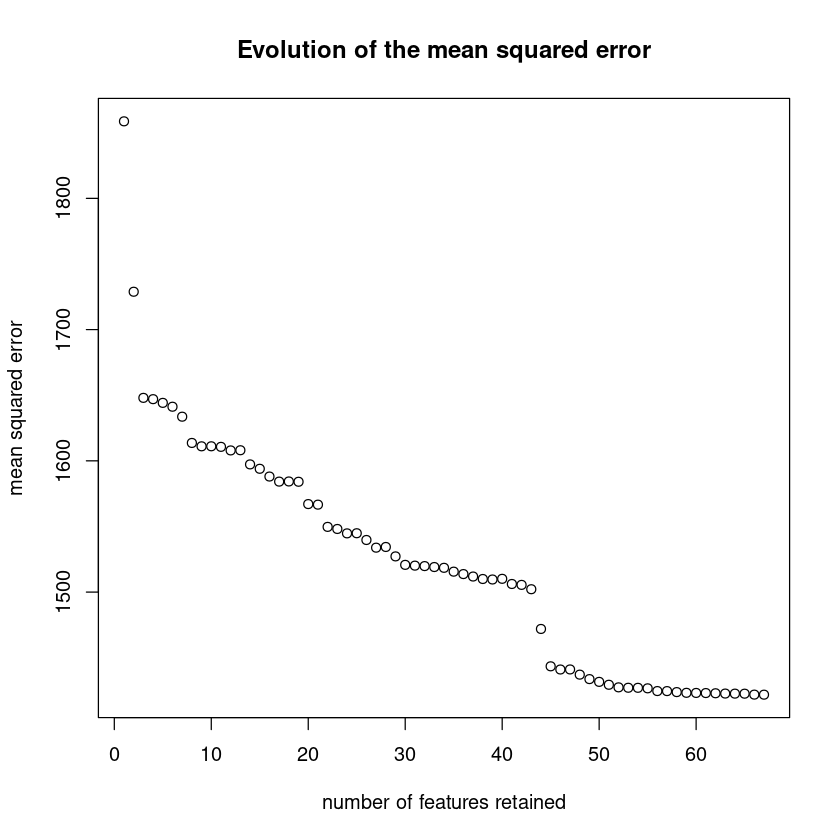

In [67]:
#Correlation elastic net
n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
    
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train[idx_tr,]
    Y_tr<-y_train[idx_tr]                          
    
    #Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    #Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
    
    for (nb_features in 1:n) {
        #Create a dataset including only the nb_features most correlated variables with the output
        DS<-X_tr[,correlation_ranking_idx[1:nb_features],drop=F]
        
        if (ncol(DS) < 2) {
        next  #Skip to the next iteration if DS has less than 2 columns
        }

        #Define the model: elastic net
        model <- glmnet(x = as.matrix(DS), y = Y_tr, alpha = 0.5)

        #Model prediction
        lambda_min_index <- which.min(model$lambda) #Allows to take the minimum value for lambda among the ones proposed by the model
        lambda_min <- model$lambda[lambda_min_index] 
        Y_hat_ts <- predict(model, newx = as.matrix(X_ts[, correlation_ranking_idx[1:nb_features], drop = FALSE]), s = lambda_min)
        
        #Cross validation error = MSE (mean squared error)
        CV_err[nb_features,i] <- mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_correlation <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_correlation[2:length(mean_cv_error_correlation)], main="Evolution of the mean squared error", xlab="number of features retained", ylab="mean squared error")

From the results above, we can see that only the 53 features most correlated with the target variable bring information to the model and contribute to decreasing the MSE (mean squared error). The cross-validation error for 53 features is 1427.4067.

The following code illustrates the ranking of the features based on their correlation with the target variable.

In [68]:
correlation_ranking_idx
colnames(X_train)[correlation_ranking_idx]

[1] 27 55  9 41 12  8 35 30 19 58 51 25 67 15  6 63 18 33 20 39  1 11 21 48 46
[26] 22 45 42 47 29 44 10 43 59 54  3 26 52  7 16 34 62 53 40 68  5  4 60  2 64
[51] 17 36 61 23 49 24 66 50 65 56 38 13 31 32 37 57 14 28

[1] "L3_CO_CO_column_number_density"                     
 [2] "L3_AER_AI_sensor_altitude"                          
 [3] "L3_NO2_NO2_slant_column_number_density"             
 [4] "L3_HCHO_tropospheric_HCHO_column_number_density"    
 [5] "L3_NO2_sensor_altitude"                             
 [6] "L3_NO2_NO2_column_number_density"                   
 [7] "L3_HCHO_HCHO_slant_column_number_density"           
 [8] "L3_CO_sensor_altitude"                              
 [9] "L3_NO2_tropospheric_NO2_column_number_density"      
[10] "L3_AER_AI_solar_azimuth_angle"                      
[11] "L3_CLOUD_solar_azimuth_angle"                       
[12] "L3_O3_solar_azimuth_angle"                          
[13] "L3_SO2_solar_azimuth_angle"                         
[14] "L3_NO2_solar_azimuth_angle"                         
[15] "u_component_of_wind_10m_above_ground"               
[16] "L3_SO2_absorbing_aerosol_index"                     
[17] "L3_NO2_tropopause_pressure"                         
[18] "L3_CO_solar_azimuth_angle"                          
[19] "L3_O3_O3_column_number_density"                     
[20] "L3_HCHO_solar_azimuth_angle"                        
[21] "Date"                                               
[22] "L3_NO2_cloud_fraction"                              
[23] "L3_O3_O3_effective_temperature"                     
[24] "L3_CLOUD_cloud_top_pressure"                        
[25] "L3_CLOUD_cloud_optical_depth"                       
[26] "L3_O3_cloud_fraction"                               
[27] "L3_CLOUD_cloud_fraction"                            
[28] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[29] "L3_CLOUD_cloud_top_height"                          
[30] "L3_CO_cloud_height"                                 
[31] "L3_CLOUD_cloud_base_pressure"                       
[32] "L3_NO2_absorbing_aerosol_index"                     
[33] "L3_CLOUD_cloud_base_height"                         
[34] "L3_AER_AI_solar_zenith_angle"                       
[35] "L3_AER_AI_absorbing_aerosol_index"                  
[36] "relative_humidity_2m_above_ground"                  
[37] "L3_O3_solar_zenith_angle"                           
[38] "L3_CLOUD_solar_zenith_angle"                        
[39] "v_component_of_wind_10m_above_ground"               
[40] "L3_NO2_solar_zenith_angle"                          
[41] "L3_CO_solar_zenith_angle"                           
[42] "L3_SO2_SO2_slant_column_number_density"             
[43] "L3_CLOUD_surface_albedo"                            
[44] "L3_HCHO_solar_zenith_angle"                         
[45] "L3_SO2_solar_zenith_angle"                          
[46] "temperature_2m_above_ground"                        
[47] "specific_humidity_2m_above_ground"                  
[48] "L3_SO2_SO2_column_number_density"                   
[49] "precipitable_water_entire_atmosphere"               
[50] "L3_SO2_cloud_fraction"                              
[51] "L3_NO2_stratospheric_NO2_column_number_density"     
[52] "L3_HCHO_cloud_fraction"                             
[53] "L3_SO2_SO2_column_number_density_amf"               
[54] "L3_O3_sensor_azimuth_angle"                         
[55] "L3_CLOUD_sensor_azimuth_angle"                      
[56] "L3_O3_sensor_zenith_angle"                          
[57] "L3_SO2_sensor_zenith_angle"                         
[58] "L3_CLOUD_sensor_zenith_angle"                       
[59] "L3_SO2_sensor_azimuth_angle"                        
[60] "L3_AER_AI_sensor_azimuth_angle"                     
[61] "L3_HCHO_sensor_zenith_angle"                        
[62] "L3_NO2_sensor_azimuth_angle"                        
[63] "L3_CO_sensor_azimuth_angle"                         
[64] "L3_CO_sensor_zenith_angle"                          
[65] "L3_HCHO_sensor_azimuth_angle"                       
[66] "L3_AER_AI_sensor_zenith_angle"                      
[67] "L3_NO2_sensor_zenith_angle"                         
[68] "L3_CO_H2O_column_number_density"

The second feature selection technique applied to the elastic net algorithm is mRMR.

 [1] "#Features:  1  ; CV error= 0  ; std dev= 0"               
 [2] "#Features:  2  ; CV error= 1825.1441  ; std dev= 91.3269" 
 [3] "#Features:  3  ; CV error= 1720.6423  ; std dev= 86.3389" 
 [4] "#Features:  4  ; CV error= 1647.981  ; std dev= 78.5064"  
 [5] "#Features:  5  ; CV error= 1614.2511  ; std dev= 78.2231" 
 [6] "#Features:  6  ; CV error= 1598.906  ; std dev= 76.8991"  
 [7] "#Features:  7  ; CV error= 1589.0489  ; std dev= 73.5053" 
 [8] "#Features:  8  ; CV error= 1582.7615  ; std dev= 71.744"  
 [9] "#Features:  9  ; CV error= 1580.2695  ; std dev= 71.888"  
[10] "#Features:  10  ; CV error= 1579.0396  ; std dev= 72.566" 
[11] "#Features:  11  ; CV error= 1575.5598  ; std dev= 73.4372"
[12] "#Features:  12  ; CV error= 1574.5238  ; std dev= 72.177" 
[13] "#Features:  13  ; CV error= 1573.2489  ; std dev= 73.0943"
[14] "#Features:  14  ; CV error= 1571.2842  ; std dev= 74.1941"
[15] "#Features:  15  ; CV error= 1565.6797  ; std dev= 71.1369"
[16] "#Features:  16  ; C

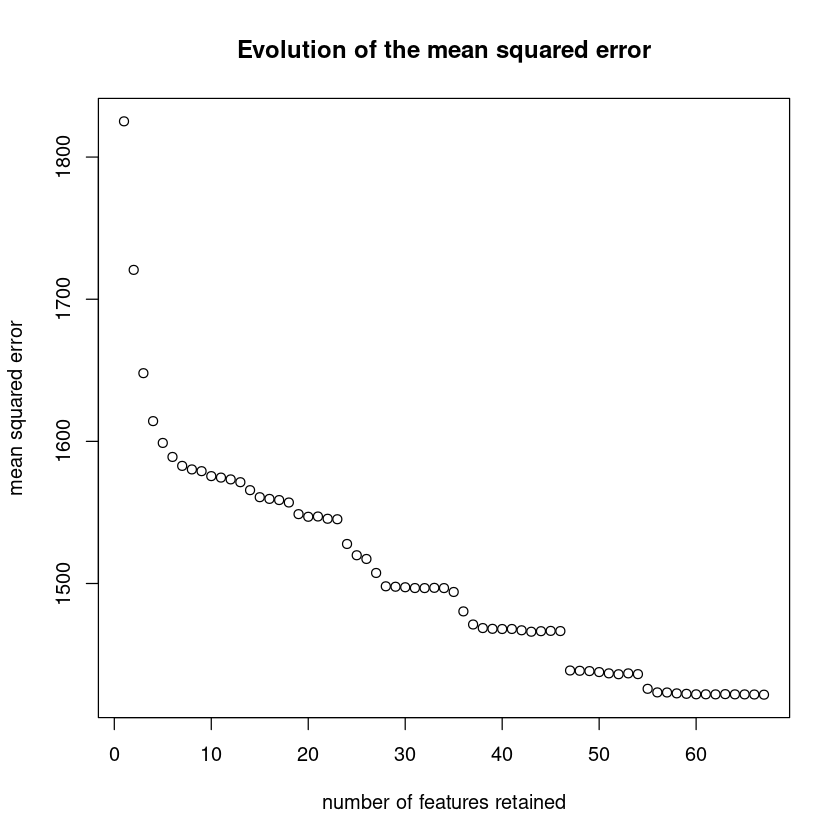

In [69]:
#mRMR elastic net
n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train[idx_tr,]
    Y_tr<-y_train[idx_tr]                          
    
    #Computing the mutual_info between input variables and output variable on the training set
    mutual_info <- -0.5 * log(1 - cor(X_tr,Y_tr)^2)
    
    #Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    candidates<-1:n
    
    #mRMR ranks the variables by taking account not only the mutual_info with the output, but also by avoiding redudant variables
    for (j in 1:n) {
        redundancy_score<-numeric(length(candidates))
        
        if (length(selected)>0) {
            #Compute the mutual_info between the selected variables and the candidates on the training set
            mutual_info_selected_candidates <- -0.5 * log(1 - cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])^2)
            #Compute the mean mutual_info for each candidate variable, across the selected variables
            redundancy_score<-apply(mutual_info_selected_candidates,2,mean)
        }
        
        #mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-mutual_info[candidates]-redundancy_score
        
        #Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)
        
        #Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n) {
        #Create a dataset including only the first nb_features selected variables
        DS<-X_tr[,ranking[1:nb_features],drop=F]
        
        if (ncol(DS) < 2) {
        next  #Skip to the next iteration if DS has less than 2 columns
        }

        #Define the model: elastic net
        model <- glmnet(x = as.matrix(DS),
                        y = Y_tr,
                        alpha = 0.5)

        #Model prediction
        lambda_min_index <- which.min(model$lambda) #Allows to take the minimum value for lambda among the ones proposed by the model
        lambda_min <- model$lambda[lambda_min_index]
        Y_hat_ts <- predict(model, newx = as.matrix(X_ts[, ranking[1:nb_features], drop = FALSE]), s = lambda_min)
        
        #Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_mrmr <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_mrmr[2:length(mean_cv_error_mrmr)], main="Evolution of the mean squared error", xlab="number of features retained", ylab="mean squared error")

From the results above, we can see that only the 56 features most correlated with the target variable bring information to the model and contribute to decreasing the MSE. The cross-validation error for 56 features is 1425.9301.

The following code illustrates the ranking of the selected features based on the mRMR analysis.

In [70]:
selected
colnames(X_train)[selected]

selected_elastic <- selected[1:56]
X_train_elastic <- subset(X_train,select = colnames(X_train)[selected_elastic])
X_test_elastic <- subset(X_test,select = colnames(X_test)[selected_elastic])
test_elastic <- subset(test,select = colnames(test)[selected_elastic])

[1] 27  9 41 55  1  6 46 63 60 48 67 13 18  8  7 42  3 29 57 53 35 21 33 11 19
[26] 10 12 28 36 61 17 58 62 37 20 38 45  2 30 54 31 15 68 43 64 39 32  5 56 34
[51] 14 25  4 22 65 59 44 66 16 23 51 40 24 47 26 49 50 52

[1] "L3_CO_CO_column_number_density"                     
 [2] "L3_NO2_NO2_slant_column_number_density"             
 [3] "L3_HCHO_tropospheric_HCHO_column_number_density"    
 [4] "L3_AER_AI_sensor_altitude"                          
 [5] "Date"                                               
 [6] "u_component_of_wind_10m_above_ground"               
 [7] "L3_CLOUD_cloud_optical_depth"                       
 [8] "L3_SO2_absorbing_aerosol_index"                     
 [9] "L3_SO2_SO2_column_number_density"                   
[10] "L3_CLOUD_cloud_top_pressure"                        
[11] "L3_SO2_solar_azimuth_angle"                         
[12] "L3_NO2_sensor_azimuth_angle"                        
[13] "L3_NO2_tropopause_pressure"                         
[14] "L3_NO2_NO2_column_number_density"                   
[15] "v_component_of_wind_10m_above_ground"               
[16] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[17] "relative_humidity_2m_above_ground"                  
[18] "L3_CO_cloud_height"                                 
[19] "L3_AER_AI_sensor_zenith_angle"                      
[20] "L3_CLOUD_surface_albedo"                            
[21] "L3_HCHO_HCHO_slant_column_number_density"           
[22] "L3_O3_O3_effective_temperature"                     
[23] "L3_CO_solar_azimuth_angle"                          
[24] "L3_NO2_cloud_fraction"                              
[25] "L3_NO2_tropospheric_NO2_column_number_density"      
[26] "L3_NO2_absorbing_aerosol_index"                     
[27] "L3_NO2_sensor_altitude"                             
[28] "L3_CO_H2O_column_number_density"                    
[29] "L3_HCHO_cloud_fraction"                             
[30] "L3_SO2_SO2_column_number_density_amf"               
[31] "L3_NO2_stratospheric_NO2_column_number_density"     
[32] "L3_AER_AI_solar_azimuth_angle"                      
[33] "L3_SO2_SO2_slant_column_number_density"             
[34] "L3_HCHO_sensor_azimuth_angle"                       
[35] "L3_O3_O3_column_number_density"                     
[36] "L3_HCHO_sensor_zenith_angle"                        
[37] "L3_CLOUD_cloud_fraction"                            
[38] "precipitable_water_entire_atmosphere"               
[39] "L3_CO_sensor_altitude"                              
[40] "L3_AER_AI_absorbing_aerosol_index"                  
[41] "L3_CO_sensor_azimuth_angle"                         
[42] "L3_NO2_solar_azimuth_angle"                         
[43] "L3_SO2_solar_zenith_angle"                          
[44] "L3_CLOUD_cloud_base_height"                         
[45] "L3_SO2_cloud_fraction"                              
[46] "L3_HCHO_solar_azimuth_angle"                        
[47] "L3_CO_sensor_zenith_angle"                          
[48] "temperature_2m_above_ground"                        
[49] "L3_AER_AI_sensor_azimuth_angle"                     
[50] "L3_CO_solar_zenith_angle"                           
[51] "L3_NO2_sensor_zenith_angle"                         
[52] "L3_O3_solar_azimuth_angle"                          
[53] "specific_humidity_2m_above_ground"                  
[54] "L3_O3_cloud_fraction"                               
[55] "L3_SO2_sensor_azimuth_angle"                        
[56] "L3_AER_AI_solar_zenith_angle"                       
[57] "L3_CLOUD_cloud_base_pressure"                       
[58] "L3_SO2_sensor_zenith_angle"                         
[59] "L3_NO2_solar_zenith_angle"                          
[60] "L3_O3_sensor_azimuth_angle"                         
[61] "L3_CLOUD_solar_azimuth_angle"                       
[62] "L3_HCHO_solar_zenith_angle"                         
[63] "L3_O3_sensor_zenith_angle"                          
[64] "L3_CLOUD_cloud_top_height"                          
[65] "L3_O3_solar_zenith_angle"                           
[66] "L3_CLOUD_sensor_azimuth_angle"                      
[67] "L3_CLOUD_sensor_zenith_angle"                       
[68] "L3_CLOUD_solar_zenith_angle"

The third feature selection technique applied to the elastic net algorithm was a PCA.

 [1] "#Features:  1  ; CV error= 0  ; std dev= 0"               
 [2] "#Features:  2  ; CV error= 2197.0816  ; std dev= 77.2189" 
 [3] "#Features:  3  ; CV error= 2174.9465  ; std dev= 72.1666" 
 [4] "#Features:  4  ; CV error= 1964.7962  ; std dev= 85.2479" 
 [5] "#Features:  5  ; CV error= 1951.6417  ; std dev= 84.3948" 
 [6] "#Features:  6  ; CV error= 1910.8638  ; std dev= 82.3771" 
 [7] "#Features:  7  ; CV error= 1849.5571  ; std dev= 81.5907" 
 [8] "#Features:  8  ; CV error= 1698.0551  ; std dev= 80.5371" 
 [9] "#Features:  9  ; CV error= 1693.8503  ; std dev= 80.6524" 
[10] "#Features:  10  ; CV error= 1692.9355  ; std dev= 78.8499"
[11] "#Features:  11  ; CV error= 1687.2823  ; std dev= 77.2545"
[12] "#Features:  12  ; CV error= 1677.8099  ; std dev= 75.615" 
[13] "#Features:  13  ; CV error= 1674.6062  ; std dev= 77.6237"
[14] "#Features:  14  ; CV error= 1641.5337  ; std dev= 66.784" 
[15] "#Features:  15  ; CV error= 1629.4901  ; std dev= 66.1131"
[16] "#Features:  16  ; C

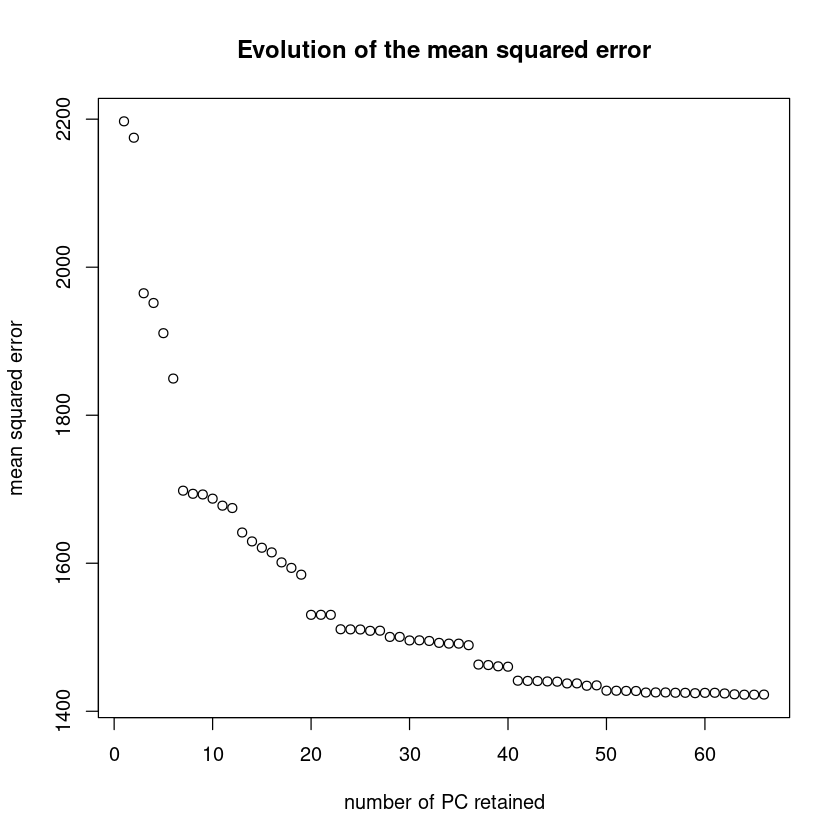

In [71]:
#PCA elastic net
n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

#Compute PCA on the full input dataset X_train and return the dataset transformed in the space of principal components
X_pca<-data.frame(prcomp(X_train,retx=T)$x)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_pca[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_pca[idx_tr,]
    Y_tr<-y_train[idx_tr]         
     
    for (nb_components in 1:n) {
        #Create a dataset including only the first nb_components principal components
        DS<-X_tr[,1:nb_components,drop=F]
        
        if (ncol(DS) < 2) {
        next  #Skip to the next iteration if DS has less than 2 columns
        }

        #Define the model : elastic net
        model <- glmnet(x = as.matrix(DS), y = Y_tr, alpha = 0.5)

        #Model prediction
        lambda_min_index <- which.min(model$lambda) #Allows to take the minimum value for lambda among the ones proposed by the model
        lambda_min <- model$lambda[lambda_min_index]
        Y_hat_ts <- predict(model, newx = as.matrix(X_ts[, 1:nb_components, drop = FALSE]), s = lambda_min)
        
        CV_err[nb_components,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_pca <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_pca[3:length(mean_cv_error_pca)-1], main="Evolution of the mean squared error", xlab="number of PC retained", ylab="mean squared error")

From the results above, we can see that only the 51 first principal components bring information to the model and contribute to decreasing the MSE. The cross-validation error for 51 features is 1427.8301.

Thus, we can conclude that the best feature selection technique for the elastic net algorithm is the one based on the mRMR because the cross-validation error is the lowest. For the validation of the elastic net, we will use the 56 first features selected by the mRMR.

The second feature selection batch was dedicated to the SVR. We start by looking at the correlation of the features with the target variable.

 [1] "#Features:  1  ; CV error= 2029.0237  ; std dev= 75.0362"  
 [2] "#Features:  2  ; CV error= 1847.0789  ; std dev= 52.6133"  
 [3] "#Features:  3  ; CV error= 1677.8577  ; std dev= 85.8586"  
 [4] "#Features:  4  ; CV error= 1539.1256  ; std dev= 74.5155"  
 [5] "#Features:  5  ; CV error= 1510.8957  ; std dev= 78.7252"  
 [6] "#Features:  6  ; CV error= 1503.5311  ; std dev= 82.129"   
 [7] "#Features:  7  ; CV error= 1486.0348  ; std dev= 72.7633"  
 [8] "#Features:  8  ; CV error= 1472.6577  ; std dev= 73.4923"  
 [9] "#Features:  9  ; CV error= 1468.6539  ; std dev= 75.1938"  
[10] "#Features:  10  ; CV error= 1474.541  ; std dev= 75.1507"  
[11] "#Features:  11  ; CV error= 1478.8192  ; std dev= 75.3862" 
[12] "#Features:  12  ; CV error= 1482.4661  ; std dev= 75.5418" 
[13] "#Features:  13  ; CV error= 1483.2579  ; std dev= 74.1386" 
[14] "#Features:  14  ; CV error= 1487.7539  ; std dev= 69.6936" 
[15] "#Features:  15  ; CV error= 1433.6362  ; std dev= 70.1015" 
[16] "#Fea

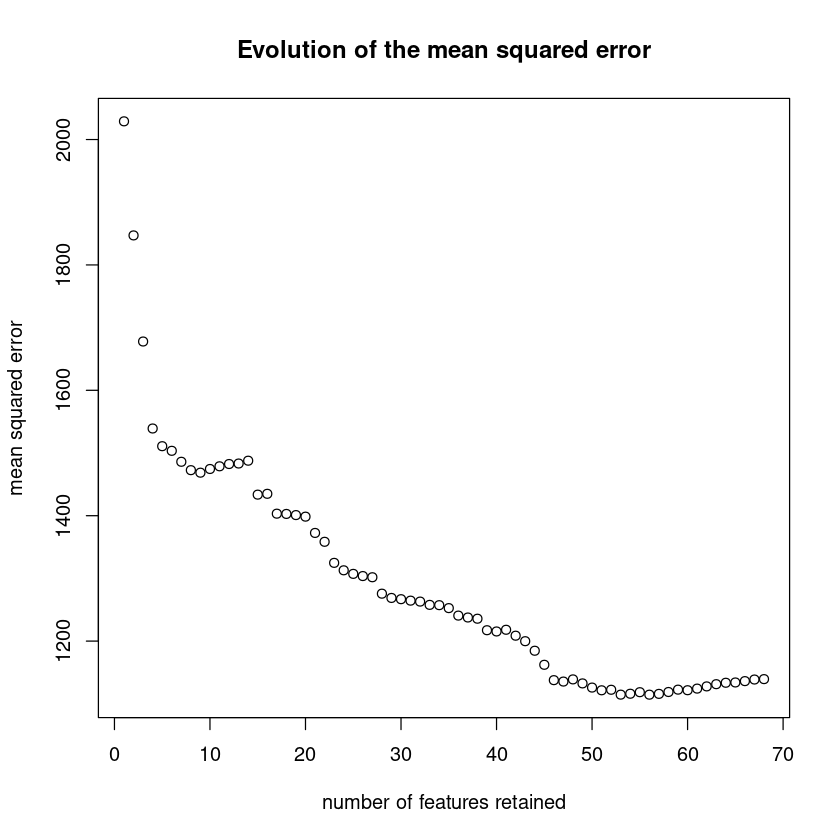

In [72]:
# Correlation SVR
n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds) # initializes a matrix to store the cross-validation errors. Each row of the matrix corresponds to a different number of features used in the model, and each column corresponds to a different fold of the cross-validation.

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
    
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train[idx_tr,]
    Y_tr<-y_train[idx_tr]                          

    #Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    #Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
     
    for (nb_features in 1:ncol(X_train)) {
        #Create a dataset including only the nb_features most correlated variables with the output
        DS<-cbind(X_tr[,correlation_ranking_idx[1:nb_features],drop=F], Y_tr)
        
        #Model fit (using svm)
        model<- svm(Y_tr~., data = DS) # No need to choose the type, the function automatically choose svr if it detects that the data isn't categorical (if the variable is not a factor).
        
        #Model prediction
        Y_hat_ts<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        
        #Cross validation error = MSE
        CV_err[nb_features,i] <- mean((Y_hat_ts-Y_ts)^2)
    }  
}

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_correlation <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_correlation, main="Evolution of the mean squared error", xlab="number of features retained", ylab="mean squared error")

From the results above, we can see that only the 47 first features bring information to the model and contribute to decreasing the MSE. The cross-validation error for 47 features is 1135.4919.

Here under are the features selected by the correlation with the target variable.

In [73]:
correlation_ranking_idx[1:47]
colnames(data)[correlation_ranking_idx][1:47]

[1] 27 55  9 41 12  8 35 30 19 58 51 25 67 15  6 63 18 33 20 39  1 11 21 48 46
[26] 22 45 42 47 29 44 10 43 59 54  3 26 52  7 16 34 62 53 40 68  5  4

[1] "L3_CO_CO_column_number_density"                     
 [2] "L3_AER_AI_sensor_altitude"                          
 [3] "L3_NO2_NO2_slant_column_number_density"             
 [4] "L3_HCHO_tropospheric_HCHO_column_number_density"    
 [5] "L3_NO2_sensor_altitude"                             
 [6] "L3_NO2_NO2_column_number_density"                   
 [7] "L3_HCHO_HCHO_slant_column_number_density"           
 [8] "L3_CO_sensor_altitude"                              
 [9] "L3_NO2_tropospheric_NO2_column_number_density"      
[10] "L3_AER_AI_solar_azimuth_angle"                      
[11] "L3_CLOUD_solar_azimuth_angle"                       
[12] "L3_O3_solar_azimuth_angle"                          
[13] "L3_SO2_solar_azimuth_angle"                         
[14] "L3_NO2_solar_azimuth_angle"                         
[15] "u_component_of_wind_10m_above_ground"               
[16] "L3_SO2_absorbing_aerosol_index"                     
[17] "L3_NO2_tropopause_pressure"                         
[18] "L3_CO_solar_azimuth_angle"                          
[19] "L3_O3_O3_column_number_density"                     
[20] "L3_HCHO_solar_azimuth_angle"                        
[21] "Date"                                               
[22] "L3_NO2_cloud_fraction"                              
[23] "L3_O3_O3_effective_temperature"                     
[24] "L3_CLOUD_cloud_top_pressure"                        
[25] "L3_CLOUD_cloud_optical_depth"                       
[26] "L3_O3_cloud_fraction"                               
[27] "L3_CLOUD_cloud_fraction"                            
[28] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[29] "L3_CLOUD_cloud_top_height"                          
[30] "L3_CO_cloud_height"                                 
[31] "L3_CLOUD_cloud_base_pressure"                       
[32] "L3_NO2_absorbing_aerosol_index"                     
[33] "L3_CLOUD_cloud_base_height"                         
[34] "L3_AER_AI_solar_zenith_angle"                       
[35] "L3_AER_AI_absorbing_aerosol_index"                  
[36] "relative_humidity_2m_above_ground"                  
[37] "L3_O3_solar_zenith_angle"                           
[38] "L3_CLOUD_solar_zenith_angle"                        
[39] "v_component_of_wind_10m_above_ground"               
[40] "L3_NO2_solar_zenith_angle"                          
[41] "L3_CO_solar_zenith_angle"                           
[42] "L3_SO2_SO2_slant_column_number_density"             
[43] "L3_CLOUD_surface_albedo"                            
[44] "L3_HCHO_solar_zenith_angle"                         
[45] "L3_SO2_solar_zenith_angle"                          
[46] "temperature_2m_above_ground"                        
[47] "specific_humidity_2m_above_ground"

The second feature selection technique applied to SVM was the mRMR.

 [1] "#Features:  1  ; CV error= 2029.0237  ; std dev= 75.0362" 
 [2] "#Features:  2  ; CV error= 1841.0582  ; std dev= 61.1279" 
 [3] "#Features:  3  ; CV error= 1687.2506  ; std dev= 72.575"  
 [4] "#Features:  4  ; CV error= 1539.1256  ; std dev= 74.5155" 
 [5] "#Features:  5  ; CV error= 1478.6905  ; std dev= 73.7209" 
 [6] "#Features:  6  ; CV error= 1409.2869  ; std dev= 75.0706" 
 [7] "#Features:  7  ; CV error= 1396.5764  ; std dev= 73.1597" 
 [8] "#Features:  8  ; CV error= 1390.9099  ; std dev= 67.9069" 
 [9] "#Features:  9  ; CV error= 1401.4387  ; std dev= 62.439"  
[10] "#Features:  10  ; CV error= 1389.1057  ; std dev= 62.0504"
[11] "#Features:  11  ; CV error= 1389.4329  ; std dev= 62.7062"
[12] "#Features:  12  ; CV error= 1388.7128  ; std dev= 63.3476"
[13] "#Features:  13  ; CV error= 1368.0097  ; std dev= 86.965" 
[14] "#Features:  14  ; CV error= 1354.2794  ; std dev= 56.1139"
[15] "#Features:  15  ; CV error= 1311.1979  ; std dev= 72.6778"
[16] "#Features:  16  ; C

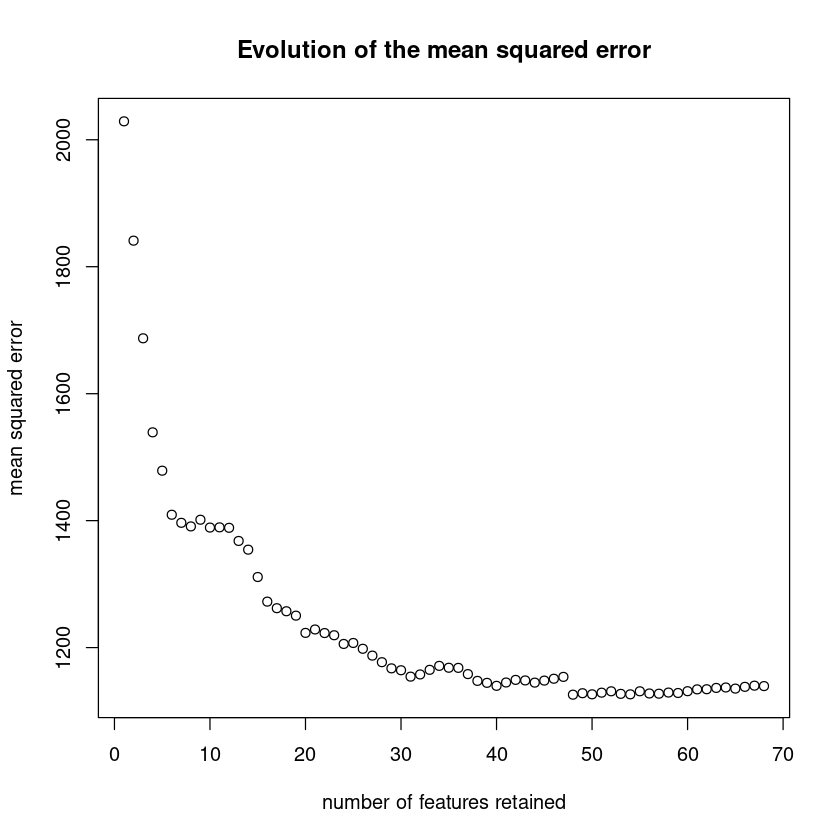

In [74]:
#mRMR
n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)


for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train[idx_tr,]
    Y_tr<-y_train[idx_tr]                          
    
    # Computing the mutual_info between input variables and output variable on the training set
    mutual_info <- -0.5 * log(1 - cor(X_tr,Y_tr)^2)
    
    # Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    candidates<-1:n
    
    #mRMR ranks the variables by taking account not only the mutual_info with the output, but also by avoiding redudant variables
    for (j in 1:n) {
        redundancy_score<-numeric(length(candidates))
        
        if (length(selected)>0) {
            #Compute the mutual_info between the selected variables and the candidates on the training set
            mutual_info_selected_candidates <- -0.5 * log(1 - cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])^2)
            #Compute the mean mutual_info for each candidate variable, across the selected variables
            redundancy_score<-apply(mutual_info_selected_candidates,2,mean)
        }
        
        #mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-mutual_info[candidates]-redundancy_score
        
        #Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)
        
        #Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n) {
        #Create a dataset including only the first nb_features selected variables
        DS<-cbind(X_tr[,ranking[1:nb_features],drop=F], Y_tr)
        
        #Model fit (using SVM)
        model<- svm(Y_tr~., DS)
        
        #Model prediction
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        #Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_mrmr <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_mrmr, main="Evolution of the mean squared error", xlab="number of features retained", ylab="mean squared error")

From the results above, we can see that only the 48 first features bring information to the model and contribute to decreasing the MSE. The cross-validation error for 48 features is 1125.861.

Here under are displayed the features selected by the mRMR.

In [75]:
selected_mRMR <- selected[1:48]
colnames(data)[selected][1:48]

X_train_svm <- subset(X_train,select = colnames(X_train)[selected_mRMR])
X_test_svm <- subset(X_test,select = colnames(X_test)[selected_mRMR])
test_svm <- subset(test,select = colnames(test)[selected_mRMR])

[1] "L3_CO_CO_column_number_density"                     
 [2] "L3_NO2_NO2_slant_column_number_density"             
 [3] "L3_HCHO_tropospheric_HCHO_column_number_density"    
 [4] "L3_AER_AI_sensor_altitude"                          
 [5] "Date"                                               
 [6] "u_component_of_wind_10m_above_ground"               
 [7] "L3_CLOUD_cloud_optical_depth"                       
 [8] "L3_SO2_absorbing_aerosol_index"                     
 [9] "L3_SO2_SO2_column_number_density"                   
[10] "L3_CLOUD_cloud_top_pressure"                        
[11] "L3_SO2_solar_azimuth_angle"                         
[12] "L3_NO2_sensor_azimuth_angle"                        
[13] "L3_NO2_tropopause_pressure"                         
[14] "L3_NO2_NO2_column_number_density"                   
[15] "v_component_of_wind_10m_above_ground"               
[16] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[17] "relative_humidity_2m_above_ground"                  
[18] "L3_CO_cloud_height"                                 
[19] "L3_AER_AI_sensor_zenith_angle"                      
[20] "L3_CLOUD_surface_albedo"                            
[21] "L3_HCHO_HCHO_slant_column_number_density"           
[22] "L3_O3_O3_effective_temperature"                     
[23] "L3_CO_solar_azimuth_angle"                          
[24] "L3_NO2_cloud_fraction"                              
[25] "L3_NO2_tropospheric_NO2_column_number_density"      
[26] "L3_NO2_absorbing_aerosol_index"                     
[27] "L3_NO2_sensor_altitude"                             
[28] "L3_CO_H2O_column_number_density"                    
[29] "L3_HCHO_cloud_fraction"                             
[30] "L3_SO2_SO2_column_number_density_amf"               
[31] "L3_NO2_stratospheric_NO2_column_number_density"     
[32] "L3_AER_AI_solar_azimuth_angle"                      
[33] "L3_SO2_SO2_slant_column_number_density"             
[34] "L3_HCHO_sensor_azimuth_angle"                       
[35] "L3_O3_O3_column_number_density"                     
[36] "L3_HCHO_sensor_zenith_angle"                        
[37] "L3_CLOUD_cloud_fraction"                            
[38] "precipitable_water_entire_atmosphere"               
[39] "L3_CO_sensor_altitude"                              
[40] "L3_AER_AI_absorbing_aerosol_index"                  
[41] "L3_CO_sensor_azimuth_angle"                         
[42] "L3_NO2_solar_azimuth_angle"                         
[43] "L3_SO2_solar_zenith_angle"                          
[44] "L3_CLOUD_cloud_base_height"                         
[45] "L3_SO2_cloud_fraction"                              
[46] "L3_HCHO_solar_azimuth_angle"                        
[47] "L3_CO_sensor_zenith_angle"                          
[48] "temperature_2m_above_ground"

The third feature selection technique applied to SVM was the PCA.

 [1] "#Features:  1  ; CV error= 2361.2355  ; std dev= 38.8982" 
 [2] "#Features:  2  ; CV error= 2328.9504  ; std dev= 32.7736" 
 [3] "#Features:  3  ; CV error= 2243.4822  ; std dev= 33.2815" 
 [4] "#Features:  4  ; CV error= 1909.6347  ; std dev= 48.9292" 
 [5] "#Features:  5  ; CV error= 1836.6781  ; std dev= 55.4345" 
 [6] "#Features:  6  ; CV error= 1748.5154  ; std dev= 66.778"  
 [7] "#Features:  7  ; CV error= 1639.6987  ; std dev= 59.2774" 
 [8] "#Features:  8  ; CV error= 1537.8885  ; std dev= 72.9829" 
 [9] "#Features:  9  ; CV error= 1512.8377  ; std dev= 74.3189" 
[10] "#Features:  10  ; CV error= 1506.2406  ; std dev= 69.9913"
[11] "#Features:  11  ; CV error= 1480.584  ; std dev= 65.5541" 
[12] "#Features:  12  ; CV error= 1455.3198  ; std dev= 60.3298"
[13] "#Features:  13  ; CV error= 1411.2535  ; std dev= 62.6458"
[14] "#Features:  14  ; CV error= 1384.5084  ; std dev= 64.3107"
[15] "#Features:  15  ; CV error= 1339.2757  ; std dev= 64.6376"
[16] "#Features:  16  ; C

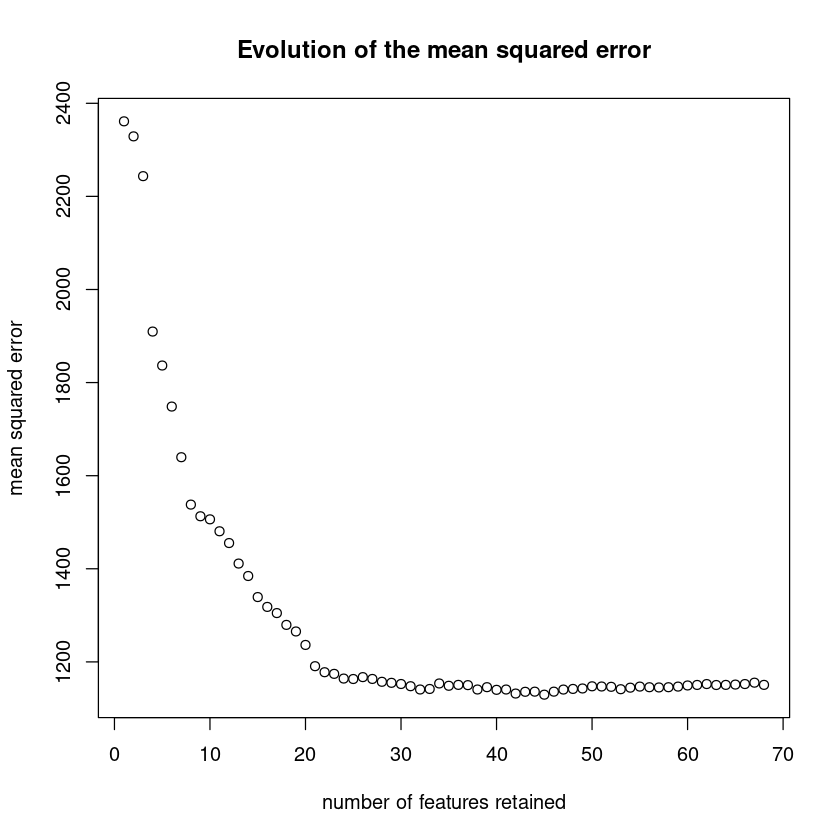

In [76]:
#PCA SVM
n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

# Compute PCA on the full input dataset X_train and return the dataset transformed in the space of principal components
X_pca<-data.frame(prcomp(X_train,retx=T)$x)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_pca[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_pca[idx_tr,]
    Y_tr<-y_train[idx_tr]         
     
    for (nb_components in 1:n) {
        #Create a dataset including only the first nb_components principal components
        DS<-cbind(X_tr[,1:nb_components,drop=F], Y_tr)
        
        #Model fit (using SVM)
        model<- svm(Y_tr~., DS)
        
        #Model predict
        Y_hat_ts<- predict(model,X_ts[,1:nb_components,drop=F])
        
        CV_err[nb_components,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_pca <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_pca, main="Evolution of the mean squared error", xlab="number of features retained", ylab="mean squared error")

From the results above, we can see that only the 45 first principal components bring information to the model and contribute to decreasing the MSE. The cross-validation error for 45 features is 1129.59.

Thus, we can conclude that the best feature selection technique for the SVR algorithm is the one based on the mRMR  because the cross-validation error is the lowest. For the validation of the SVR, we will use the 48 first features selected by the mRMR.

The third feature selection batch was dedicated to the random forest algorithm. In order to have a result computationally tractable, we will grow a forest of a 100 trees.

First we rank the feature based on their correlation with the target variable.

 [1] "#Features:  1  ; CV error= 2408.8088  ; std dev= 56.4041" 
 [2] "#Features:  2  ; CV error= 1865.7757  ; std dev= 113.4593"
 [3] "#Features:  3  ; CV error= 1598.6506  ; std dev= 202.1684"
 [4] "#Features:  4  ; CV error= 1406.8917  ; std dev= 76.2917" 
 [5] "#Features:  5  ; CV error= 1382.4253  ; std dev= 60.7376" 
 [6] "#Features:  6  ; CV error= 1368.9296  ; std dev= 78.3062" 
 [7] "#Features:  7  ; CV error= 1358.467  ; std dev= 72.8317"  
 [8] "#Features:  8  ; CV error= 1353.3643  ; std dev= 65.3249" 
 [9] "#Features:  9  ; CV error= 1341.9919  ; std dev= 67.4838" 
[10] "#Features:  10  ; CV error= 1324.5464  ; std dev= 75.3184"
[11] "#Features:  11  ; CV error= 1331.4091  ; std dev= 76.4349"
[12] "#Features:  12  ; CV error= 1326.5151  ; std dev= 72.6377"
[13] "#Features:  13  ; CV error= 1333.6591  ; std dev= 72.5267"
[14] "#Features:  14  ; CV error= 1333.4715  ; std dev= 75.8095"
[15] "#Features:  15  ; CV error= 1271.091  ; std dev= 77.3624" 
[16] "#Features:  16  ; C

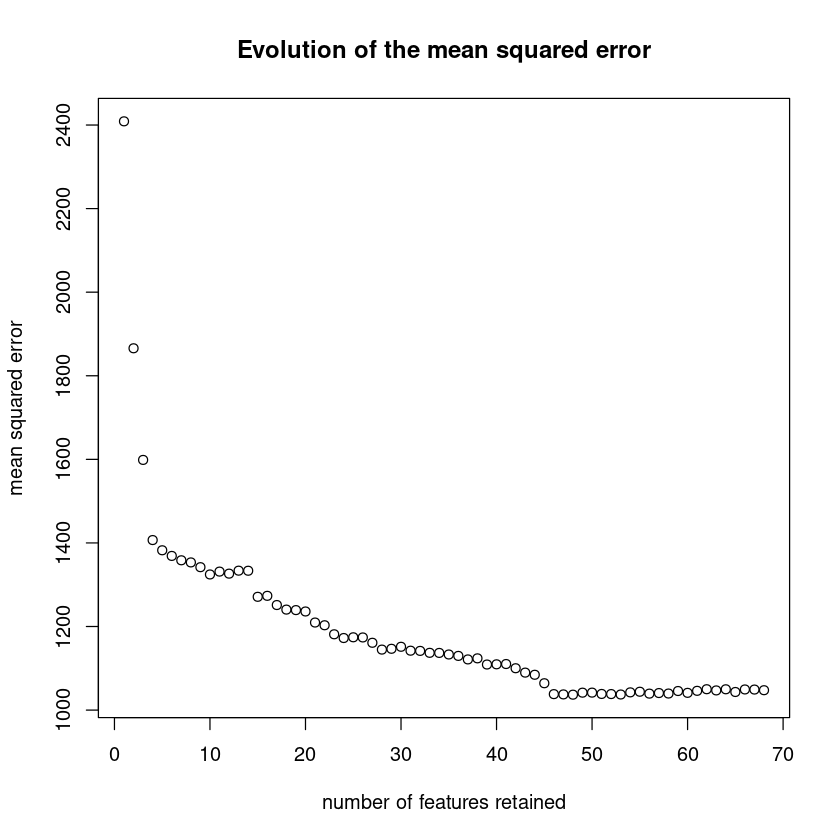

In [77]:
#Correlation random forest
n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
    
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train[idx_tr,]
    Y_tr<-y_train[idx_tr]                          
    
    #Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    #Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
    
    for (nb_features in 1:n) {
        #Create a dataset including only the nb_features most correlated variables with the output
        DS<-X_tr[,correlation_ranking_idx[1:nb_features],drop=F]
        
        #Define the model (random forest)
        model <- randomForest(x=DS, y=Y_tr, ntree=100)

        #Model prediction
        Y_hat_ts<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        
        #Cross validation error = MSE (mean squared error)
        CV_err[nb_features,i] <- mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_correlation <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_correlation, main="Evolution of the mean squared error", xlab="number of features retained", ylab="mean squared error")

From the results above, we can see that only the 46 features most correlated with the target variable bring information to the model and contribute to decreasing the MSE (mean squared error). The cross-validation error for 46 features is 1038.2162.

The following code illustrates the ranking of the features based on their correlation with the target variable.

In [78]:
correlation_ranking_idx
colnames(X_train)[correlation_ranking_idx]

selected_forest <- correlation_ranking_idx[1:46]
X_train_forest <- subset(X_train, select = colnames(X_train)[selected_forest])
X_test_forest <- subset(X_test, select = colnames(X_test)[selected_forest])
test_forest <- subset(test,select = colnames(test)[selected_forest])

[1] 27 55  9 41 12  8 35 30 19 58 51 25 67 15  6 63 18 33 20 39  1 11 21 48 46
[26] 22 45 42 47 29 44 10 43 59 54  3 26 52  7 16 34 62 53 40 68  5  4 60  2 64
[51] 17 36 61 23 49 24 66 50 65 56 38 13 31 32 37 57 14 28

[1] "L3_CO_CO_column_number_density"                     
 [2] "L3_AER_AI_sensor_altitude"                          
 [3] "L3_NO2_NO2_slant_column_number_density"             
 [4] "L3_HCHO_tropospheric_HCHO_column_number_density"    
 [5] "L3_NO2_sensor_altitude"                             
 [6] "L3_NO2_NO2_column_number_density"                   
 [7] "L3_HCHO_HCHO_slant_column_number_density"           
 [8] "L3_CO_sensor_altitude"                              
 [9] "L3_NO2_tropospheric_NO2_column_number_density"      
[10] "L3_AER_AI_solar_azimuth_angle"                      
[11] "L3_CLOUD_solar_azimuth_angle"                       
[12] "L3_O3_solar_azimuth_angle"                          
[13] "L3_SO2_solar_azimuth_angle"                         
[14] "L3_NO2_solar_azimuth_angle"                         
[15] "u_component_of_wind_10m_above_ground"               
[16] "L3_SO2_absorbing_aerosol_index"                     
[17] "L3_NO2_tropopause_pressure"                         
[18] "L3_CO_solar_azimuth_angle"                          
[19] "L3_O3_O3_column_number_density"                     
[20] "L3_HCHO_solar_azimuth_angle"                        
[21] "Date"                                               
[22] "L3_NO2_cloud_fraction"                              
[23] "L3_O3_O3_effective_temperature"                     
[24] "L3_CLOUD_cloud_top_pressure"                        
[25] "L3_CLOUD_cloud_optical_depth"                       
[26] "L3_O3_cloud_fraction"                               
[27] "L3_CLOUD_cloud_fraction"                            
[28] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[29] "L3_CLOUD_cloud_top_height"                          
[30] "L3_CO_cloud_height"                                 
[31] "L3_CLOUD_cloud_base_pressure"                       
[32] "L3_NO2_absorbing_aerosol_index"                     
[33] "L3_CLOUD_cloud_base_height"                         
[34] "L3_AER_AI_solar_zenith_angle"                       
[35] "L3_AER_AI_absorbing_aerosol_index"                  
[36] "relative_humidity_2m_above_ground"                  
[37] "L3_O3_solar_zenith_angle"                           
[38] "L3_CLOUD_solar_zenith_angle"                        
[39] "v_component_of_wind_10m_above_ground"               
[40] "L3_NO2_solar_zenith_angle"                          
[41] "L3_CO_solar_zenith_angle"                           
[42] "L3_SO2_SO2_slant_column_number_density"             
[43] "L3_CLOUD_surface_albedo"                            
[44] "L3_HCHO_solar_zenith_angle"                         
[45] "L3_SO2_solar_zenith_angle"                          
[46] "temperature_2m_above_ground"                        
[47] "specific_humidity_2m_above_ground"                  
[48] "L3_SO2_SO2_column_number_density"                   
[49] "precipitable_water_entire_atmosphere"               
[50] "L3_SO2_cloud_fraction"                              
[51] "L3_NO2_stratospheric_NO2_column_number_density"     
[52] "L3_HCHO_cloud_fraction"                             
[53] "L3_SO2_SO2_column_number_density_amf"               
[54] "L3_O3_sensor_azimuth_angle"                         
[55] "L3_CLOUD_sensor_azimuth_angle"                      
[56] "L3_O3_sensor_zenith_angle"                          
[57] "L3_SO2_sensor_zenith_angle"                         
[58] "L3_CLOUD_sensor_zenith_angle"                       
[59] "L3_SO2_sensor_azimuth_angle"                        
[60] "L3_AER_AI_sensor_azimuth_angle"                     
[61] "L3_HCHO_sensor_zenith_angle"                        
[62] "L3_NO2_sensor_azimuth_angle"                        
[63] "L3_CO_sensor_azimuth_angle"                         
[64] "L3_CO_sensor_zenith_angle"                          
[65] "L3_HCHO_sensor_azimuth_angle"                       
[66] "L3_AER_AI_sensor_zenith_angle"                      
[67] "L3_NO2_sensor_zenith_angle"                         
[68] "L3_CO_H2O_column_number_density"

The second feature selection technique applied with our random forest was mRMR.

 [1] "#Features:  1  ; CV error= 2409.7893  ; std dev= 46.0364" 
 [2] "#Features:  2  ; CV error= 1902.0627  ; std dev= 72.1446" 
 [3] "#Features:  3  ; CV error= 1675.6842  ; std dev= 93.6253" 
 [4] "#Features:  4  ; CV error= 1404.2763  ; std dev= 76.5"    
 [5] "#Features:  5  ; CV error= 1388.6605  ; std dev= 82.5637" 
 [6] "#Features:  6  ; CV error= 1259.0989  ; std dev= 66.3037" 
 [7] "#Features:  7  ; CV error= 1240.0778  ; std dev= 73.7917" 
 [8] "#Features:  8  ; CV error= 1238.45  ; std dev= 69.5257"   
 [9] "#Features:  9  ; CV error= 1237.2563  ; std dev= 75.3721" 
[10] "#Features:  10  ; CV error= 1230.0331  ; std dev= 69.0665"
[11] "#Features:  11  ; CV error= 1222.3634  ; std dev= 79.3444"
[12] "#Features:  12  ; CV error= 1210.7218  ; std dev= 67.7198"
[13] "#Features:  13  ; CV error= 1200.0319  ; std dev= 86.1854"
[14] "#Features:  14  ; CV error= 1194.0535  ; std dev= 63.8447"
[15] "#Features:  15  ; CV error= 1150.1495  ; std dev= 89.6931"
[16] "#Features:  16  ; C

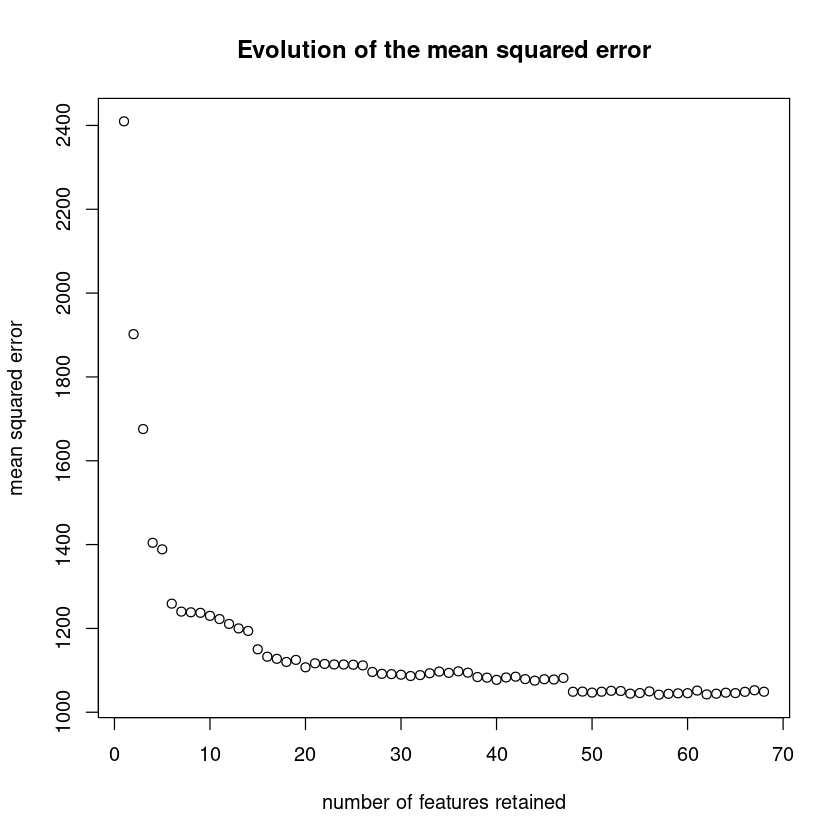

In [79]:
#mRMR random forest
n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train[idx_tr,]
    Y_tr<-y_train[idx_tr]                          
    
    #Computing the mutual_info between input variables and output variable on the training set
    mutual_info <- -0.5 * log(1 - cor(X_tr,Y_tr)^2)
    
    #Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    candidates<-1:n
    
    #mRMR ranks the variables by taking into account not only the mutual_info with the output, but also by avoiding redudant variables
    for (j in 1:n) {
        redundancy_score<-numeric(length(candidates))
        
        if (length(selected)>0) {
            # Compute the mutual_info between the selected variables and the candidates on the training set
            mutual_info_selected_candidates <- -0.5 * log(1 - cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])^2)
            # Compute the mean mutual_info for each candidate variable, across the selected variables
            redundancy_score<-apply(mutual_info_selected_candidates,2,mean)
        }
        
        #mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-mutual_info[candidates]-redundancy_score
        
        #Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)
        
        #Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n) {
        #Create a dataset including only the first nb_features selected variables
        DS<-X_tr[,ranking[1:nb_features],drop=F]
        
        #Model fit (using random forest)
        model<- randomForest(x=DS, y=Y_tr, ntree=100)
        
        #Model prediction
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        #Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_mrmr <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_mrmr, main="Evolution of the mean squared error", xlab="number of features retained", ylab="mean squared error")

From the results above, we can see that only the 48 features most correlated with the target variable bring information to the model and contribute to decreasing the MSE (mean squared error). The cross-validation error for 48 features is 1048.8671.

The selected features by the mRMR are displayed here under.

In [80]:
selected
colnames(X_train)[selected]

[1] 27  9 41 55  1  6 46 63 60 48 67 13 18  8  7 42  3 29 57 53 35 21 33 11 19
[26] 10 12 28 36 61 17 58 62 37 20 38 45  2 30 54 31 15 68 43 64 39 32  5 56 34
[51] 14 25  4 22 65 59 44 66 16 23 51 40 24 47 26 49 50 52

[1] "L3_CO_CO_column_number_density"                     
 [2] "L3_NO2_NO2_slant_column_number_density"             
 [3] "L3_HCHO_tropospheric_HCHO_column_number_density"    
 [4] "L3_AER_AI_sensor_altitude"                          
 [5] "Date"                                               
 [6] "u_component_of_wind_10m_above_ground"               
 [7] "L3_CLOUD_cloud_optical_depth"                       
 [8] "L3_SO2_absorbing_aerosol_index"                     
 [9] "L3_SO2_SO2_column_number_density"                   
[10] "L3_CLOUD_cloud_top_pressure"                        
[11] "L3_SO2_solar_azimuth_angle"                         
[12] "L3_NO2_sensor_azimuth_angle"                        
[13] "L3_NO2_tropopause_pressure"                         
[14] "L3_NO2_NO2_column_number_density"                   
[15] "v_component_of_wind_10m_above_ground"               
[16] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[17] "relative_humidity_2m_above_ground"                  
[18] "L3_CO_cloud_height"                                 
[19] "L3_AER_AI_sensor_zenith_angle"                      
[20] "L3_CLOUD_surface_albedo"                            
[21] "L3_HCHO_HCHO_slant_column_number_density"           
[22] "L3_O3_O3_effective_temperature"                     
[23] "L3_CO_solar_azimuth_angle"                          
[24] "L3_NO2_cloud_fraction"                              
[25] "L3_NO2_tropospheric_NO2_column_number_density"      
[26] "L3_NO2_absorbing_aerosol_index"                     
[27] "L3_NO2_sensor_altitude"                             
[28] "L3_CO_H2O_column_number_density"                    
[29] "L3_HCHO_cloud_fraction"                             
[30] "L3_SO2_SO2_column_number_density_amf"               
[31] "L3_NO2_stratospheric_NO2_column_number_density"     
[32] "L3_AER_AI_solar_azimuth_angle"                      
[33] "L3_SO2_SO2_slant_column_number_density"             
[34] "L3_HCHO_sensor_azimuth_angle"                       
[35] "L3_O3_O3_column_number_density"                     
[36] "L3_HCHO_sensor_zenith_angle"                        
[37] "L3_CLOUD_cloud_fraction"                            
[38] "precipitable_water_entire_atmosphere"               
[39] "L3_CO_sensor_altitude"                              
[40] "L3_AER_AI_absorbing_aerosol_index"                  
[41] "L3_CO_sensor_azimuth_angle"                         
[42] "L3_NO2_solar_azimuth_angle"                         
[43] "L3_SO2_solar_zenith_angle"                          
[44] "L3_CLOUD_cloud_base_height"                         
[45] "L3_SO2_cloud_fraction"                              
[46] "L3_HCHO_solar_azimuth_angle"                        
[47] "L3_CO_sensor_zenith_angle"                          
[48] "temperature_2m_above_ground"                        
[49] "L3_AER_AI_sensor_azimuth_angle"                     
[50] "L3_CO_solar_zenith_angle"                           
[51] "L3_NO2_sensor_zenith_angle"                         
[52] "L3_O3_solar_azimuth_angle"                          
[53] "specific_humidity_2m_above_ground"                  
[54] "L3_O3_cloud_fraction"                               
[55] "L3_SO2_sensor_azimuth_angle"                        
[56] "L3_AER_AI_solar_zenith_angle"                       
[57] "L3_CLOUD_cloud_base_pressure"                       
[58] "L3_SO2_sensor_zenith_angle"                         
[59] "L3_NO2_solar_zenith_angle"                          
[60] "L3_O3_sensor_azimuth_angle"                         
[61] "L3_CLOUD_solar_azimuth_angle"                       
[62] "L3_HCHO_solar_zenith_angle"                         
[63] "L3_O3_sensor_zenith_angle"                          
[64] "L3_CLOUD_cloud_top_height"                          
[65] "L3_O3_solar_zenith_angle"                           
[66] "L3_CLOUD_sensor_azimuth_angle"                      
[67] "L3_CLOUD_sensor_zenith_angle"                       
[68] "L3_CLOUD_solar_zenith_angle"

The third and last feature selection technique applied to our random forest algorithm was the PCA.

 [1] "#Features:  1  ; CV error= 2987.1899  ; std dev= 63.9339" 
 [2] "#Features:  2  ; CV error= 2424.3774  ; std dev= 60.7919" 
 [3] "#Features:  3  ; CV error= 2176.824  ; std dev= 58.0229"  
 [4] "#Features:  4  ; CV error= 1837.8275  ; std dev= 75.7921" 
 [5] "#Features:  5  ; CV error= 1781.104  ; std dev= 73.2644"  
 [6] "#Features:  6  ; CV error= 1694.3933  ; std dev= 77.1506" 
 [7] "#Features:  7  ; CV error= 1612.8415  ; std dev= 69.9087" 
 [8] "#Features:  8  ; CV error= 1497.4389  ; std dev= 77.7954" 
 [9] "#Features:  9  ; CV error= 1482.3496  ; std dev= 76.502"  
[10] "#Features:  10  ; CV error= 1479.3447  ; std dev= 73.2001"
[11] "#Features:  11  ; CV error= 1466.0422  ; std dev= 70.4286"
[12] "#Features:  12  ; CV error= 1453.1784  ; std dev= 68.7627"
[13] "#Features:  13  ; CV error= 1426.7355  ; std dev= 65.5679"
[14] "#Features:  14  ; CV error= 1411.0529  ; std dev= 71.3356"
[15] "#Features:  15  ; CV error= 1376.5403  ; std dev= 69.8633"
[16] "#Features:  16  ; C

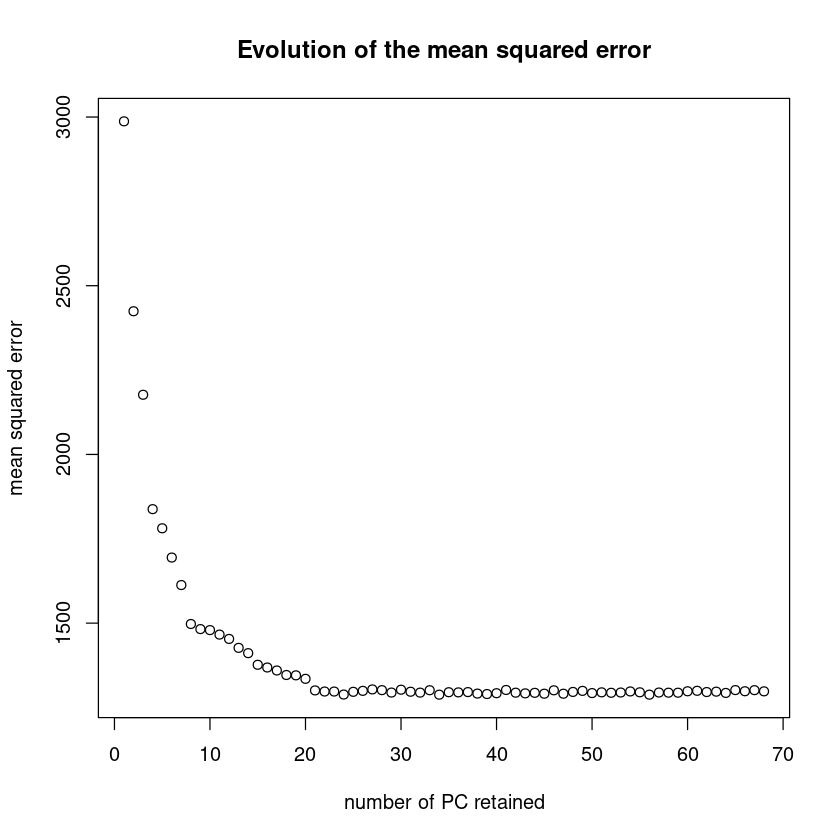

In [81]:
#PCA random forest
n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

#Compute PCA on the full input dataset X_train and return the dataset transformed in the space of principal components
X_pca<-data.frame(prcomp(X_train,retx=T)$x)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_pca[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_pca[idx_tr,]
    Y_tr<-y_train[idx_tr]         
     
    for (nb_components in 1:n) {
        #Create a dataset including only the first nb_components principal components
        DS<-X_tr[,1:nb_components,drop=F]
        
        #Model fit : random forest
        model<- randomForest(x=DS, y=Y_tr, ntree=100)
        
        #Model predict
        Y_hat_ts<- predict(model,X_ts[,1:nb_components,drop=F])
        
        CV_err[nb_components,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_pca <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_pca, main="Evolution of the mean squared error", xlab="number of PC retained", ylab="mean squared error")

From the results above, we can see that only the 24 features most correlated with the target variable bring information to the model and contribute to decreasing the MSE (mean squared error). The cross-validation error for 24 features is 1288.3713.

Thus, we can conclude that the best feature selection technique for the random forest algorithm is the one based on the simple correlation between the features and the target variable  because the cross-validation error is the lowest. For the validation of the random forest, we will use the 46 most correlated features with the target variable.

The fourth and last feature selection batch was dedicated to the LightGBM algorithm. We left the hyperparameters as defined by default for the feature selection step.

First we rank the feature based on their correlation with the target variable.

 [1] "#Features:  1  ; CV error= 1958.6106  ; std dev= 87.2326"  
 [2] "#Features:  2  ; CV error= 1747.3681  ; std dev= 123.4189" 
 [3] "#Features:  3  ; CV error= 1559.6163  ; std dev= 186.2939" 
 [4] "#Features:  4  ; CV error= 1389.6514  ; std dev= 64.2428"  
 [5] "#Features:  5  ; CV error= 1377.727  ; std dev= 55.1051"   
 [6] "#Features:  6  ; CV error= 1365.8556  ; std dev= 59.7881"  
 [7] "#Features:  7  ; CV error= 1359.363  ; std dev= 55.6782"   
 [8] "#Features:  8  ; CV error= 1354.8204  ; std dev= 66.99"    
 [9] "#Features:  9  ; CV error= 1345.3924  ; std dev= 64.8229"  
[10] "#Features:  10  ; CV error= 1336.503  ; std dev= 66.5879"  
[11] "#Features:  11  ; CV error= 1339.9092  ; std dev= 71.5714" 
[12] "#Features:  12  ; CV error= 1335.0096  ; std dev= 72.1656" 
[13] "#Features:  13  ; CV error= 1337.0226  ; std dev= 70.1456" 
[14] "#Features:  14  ; CV error= 1336.0389  ; std dev= 64.144"  
[15] "#Features:  15  ; CV error= 1279.8475  ; std dev= 58.4641" 
[16] "#Fea

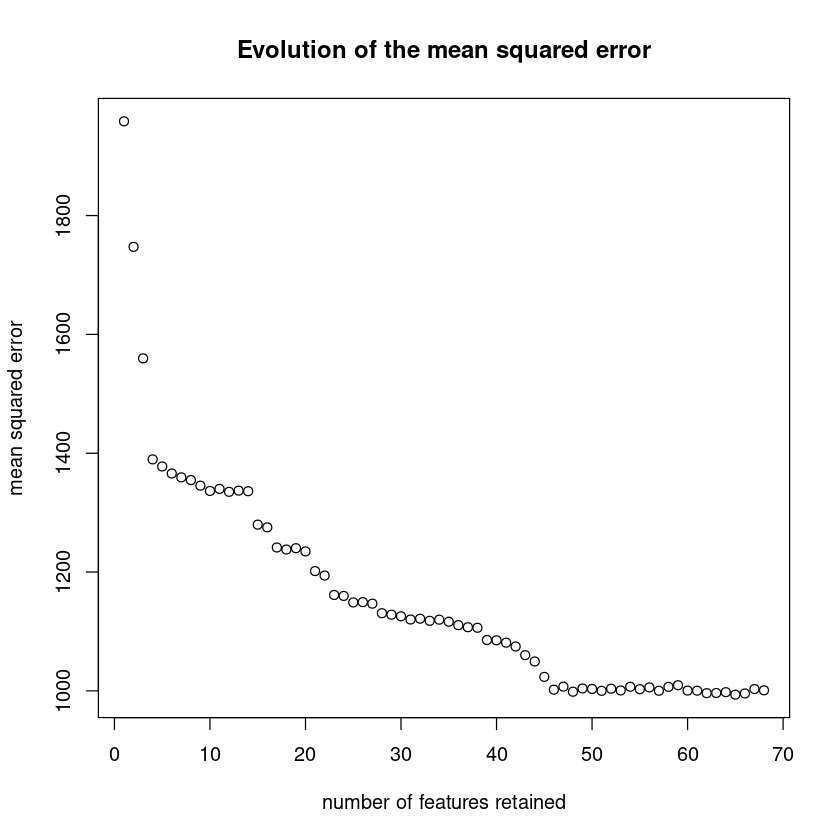

In [82]:
#Correlation for LightGBM
train_params <- list(objective = "regression", num_threads = 6) #default parameters, we just use the multi-threading possibility

n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
    
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train[idx_tr,]
    Y_tr<-y_train[idx_tr]                          
    
    #Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    #Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
    
    for (nb_features in 1:n) {
        #Create a dataset including only the nb_features most correlated variables with the output
        DS<-X_tr[,correlation_ranking_idx[1:nb_features],drop=F]
        dtrain <- lgb.Dataset(data = as.matrix(DS), label = Y_tr) #need to format our dataset into a matrix usable by LightGBM
        
        #Model fit (using LightGBM)
        model<- lgb.train(params = train_params, data = dtrain, eval= "mean_squared_error", verbose = 0)

        #Model prediction
        Y_hat_ts<- predict(model,as.matrix(X_ts[,correlation_ranking_idx[1:nb_features],drop=F]))
        
        #Cross validation error = MSE
        CV_err[nb_features,i] <- mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_correlation <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_correlation, main="Evolution of the mean squared error", xlab="number of features retained", ylab="mean squared error")

From the results above, we can see that only the 46 features most correlated with the target variable bring information to the model and contribute to decreasing the MSE (mean squared error). The cross-validation error for 46 features is 1002.0028.

The following code illustrates the ranking of the features based on their correlation with the target variable.

In [83]:
correlation_ranking_idx
colnames(X_train)[correlation_ranking_idx]

[1] 27 55  9 41 12  8 35 30 19 58 51 25 67 15  6 63 18 33 20 39  1 11 21 48 46
[26] 22 45 42 47 29 44 10 43 59 54  3 26 52  7 16 34 62 53 40 68  5  4 60  2 64
[51] 17 36 61 23 49 24 66 50 65 56 38 13 31 32 37 57 14 28

[1] "L3_CO_CO_column_number_density"                     
 [2] "L3_AER_AI_sensor_altitude"                          
 [3] "L3_NO2_NO2_slant_column_number_density"             
 [4] "L3_HCHO_tropospheric_HCHO_column_number_density"    
 [5] "L3_NO2_sensor_altitude"                             
 [6] "L3_NO2_NO2_column_number_density"                   
 [7] "L3_HCHO_HCHO_slant_column_number_density"           
 [8] "L3_CO_sensor_altitude"                              
 [9] "L3_NO2_tropospheric_NO2_column_number_density"      
[10] "L3_AER_AI_solar_azimuth_angle"                      
[11] "L3_CLOUD_solar_azimuth_angle"                       
[12] "L3_O3_solar_azimuth_angle"                          
[13] "L3_SO2_solar_azimuth_angle"                         
[14] "L3_NO2_solar_azimuth_angle"                         
[15] "u_component_of_wind_10m_above_ground"               
[16] "L3_SO2_absorbing_aerosol_index"                     
[17] "L3_NO2_tropopause_pressure"                         
[18] "L3_CO_solar_azimuth_angle"                          
[19] "L3_O3_O3_column_number_density"                     
[20] "L3_HCHO_solar_azimuth_angle"                        
[21] "Date"                                               
[22] "L3_NO2_cloud_fraction"                              
[23] "L3_O3_O3_effective_temperature"                     
[24] "L3_CLOUD_cloud_top_pressure"                        
[25] "L3_CLOUD_cloud_optical_depth"                       
[26] "L3_O3_cloud_fraction"                               
[27] "L3_CLOUD_cloud_fraction"                            
[28] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[29] "L3_CLOUD_cloud_top_height"                          
[30] "L3_CO_cloud_height"                                 
[31] "L3_CLOUD_cloud_base_pressure"                       
[32] "L3_NO2_absorbing_aerosol_index"                     
[33] "L3_CLOUD_cloud_base_height"                         
[34] "L3_AER_AI_solar_zenith_angle"                       
[35] "L3_AER_AI_absorbing_aerosol_index"                  
[36] "relative_humidity_2m_above_ground"                  
[37] "L3_O3_solar_zenith_angle"                           
[38] "L3_CLOUD_solar_zenith_angle"                        
[39] "v_component_of_wind_10m_above_ground"               
[40] "L3_NO2_solar_zenith_angle"                          
[41] "L3_CO_solar_zenith_angle"                           
[42] "L3_SO2_SO2_slant_column_number_density"             
[43] "L3_CLOUD_surface_albedo"                            
[44] "L3_HCHO_solar_zenith_angle"                         
[45] "L3_SO2_solar_zenith_angle"                          
[46] "temperature_2m_above_ground"                        
[47] "specific_humidity_2m_above_ground"                  
[48] "L3_SO2_SO2_column_number_density"                   
[49] "precipitable_water_entire_atmosphere"               
[50] "L3_SO2_cloud_fraction"                              
[51] "L3_NO2_stratospheric_NO2_column_number_density"     
[52] "L3_HCHO_cloud_fraction"                             
[53] "L3_SO2_SO2_column_number_density_amf"               
[54] "L3_O3_sensor_azimuth_angle"                         
[55] "L3_CLOUD_sensor_azimuth_angle"                      
[56] "L3_O3_sensor_zenith_angle"                          
[57] "L3_SO2_sensor_zenith_angle"                         
[58] "L3_CLOUD_sensor_zenith_angle"                       
[59] "L3_SO2_sensor_azimuth_angle"                        
[60] "L3_AER_AI_sensor_azimuth_angle"                     
[61] "L3_HCHO_sensor_zenith_angle"                        
[62] "L3_NO2_sensor_azimuth_angle"                        
[63] "L3_CO_sensor_azimuth_angle"                         
[64] "L3_CO_sensor_zenith_angle"                          
[65] "L3_HCHO_sensor_azimuth_angle"                       
[66] "L3_AER_AI_sensor_zenith_angle"                      
[67] "L3_NO2_sensor_zenith_angle"                         
[68] "L3_CO_H2O_column_number_density"

The following feature selection technique applied to our LightGBM algorithm was mRMR.

 [1] "#Features:  1  ; CV error= 1958.6106  ; std dev= 87.2326" 
 [2] "#Features:  2  ; CV error= 1784.5586  ; std dev= 70.8236" 
 [3] "#Features:  3  ; CV error= 1632.1389  ; std dev= 83.7315" 
 [4] "#Features:  4  ; CV error= 1389.6514  ; std dev= 64.2428" 
 [5] "#Features:  5  ; CV error= 1317.4646  ; std dev= 67.4663" 
 [6] "#Features:  6  ; CV error= 1256.5884  ; std dev= 58.5783" 
 [7] "#Features:  7  ; CV error= 1238.0996  ; std dev= 63.3476" 
 [8] "#Features:  8  ; CV error= 1228.3573  ; std dev= 65.2932" 
 [9] "#Features:  9  ; CV error= 1239.6401  ; std dev= 59.2832" 
[10] "#Features:  10  ; CV error= 1225.9456  ; std dev= 62.0265"
[11] "#Features:  11  ; CV error= 1222.8871  ; std dev= 57.9592"
[12] "#Features:  12  ; CV error= 1213.3898  ; std dev= 59.0769"
[13] "#Features:  13  ; CV error= 1194.3769  ; std dev= 76.656" 
[14] "#Features:  14  ; CV error= 1179.8554  ; std dev= 60.1678"
[15] "#Features:  15  ; CV error= 1141.1389  ; std dev= 82.4711"
[16] "#Features:  16  ; C

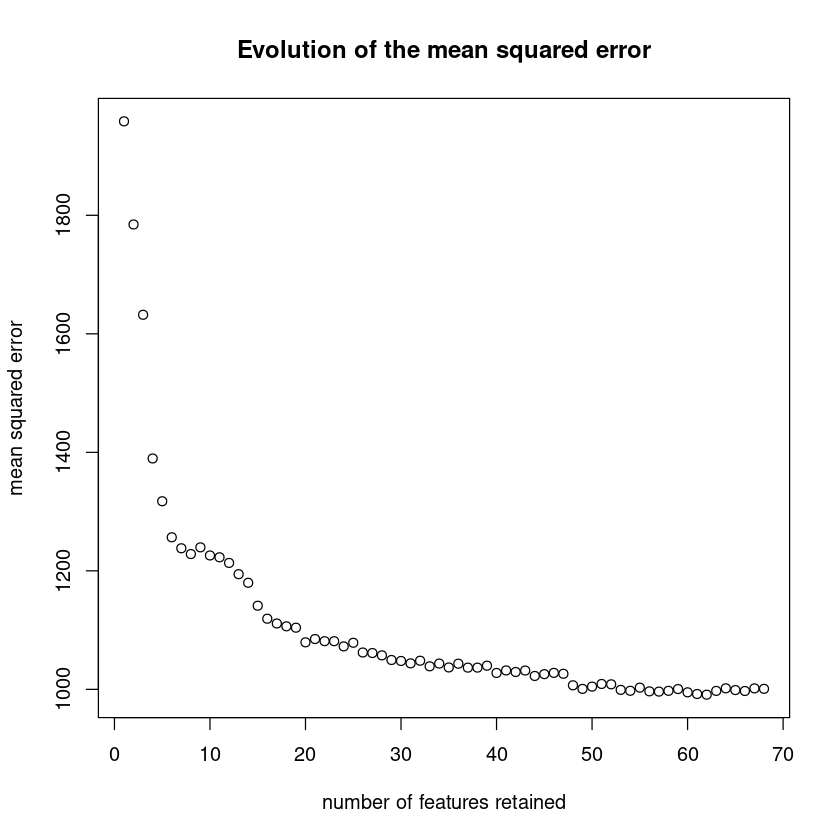

In [84]:
#mRMR for LightBGM
train_params <- list(objective = "regression", num_threads = 6) #default parameters, we just use the multi-threading possibility

n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train[idx_tr,]
    Y_tr<-y_train[idx_tr]                          
    
    #Computing the mutual_info between input variables and output variable on the training set
    mutual_info <- -0.5 * log(1 - cor(X_tr,Y_tr)^2)
    
    #Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    candidates<-1:n
    
    #mRMR ranks the variables by taking account not only the mutual_info with the output, but also by avoiding redudant variables
    for (j in 1:n) {
        redundancy_score<-numeric(length(candidates))
        
        if (length(selected)>0) {
            #Compute the mutual_info between the selected variables and the candidates on the training set
            mutual_info_selected_candidates <- -0.5 * log(1 - cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])^2)
            #Compute the mean mutual_info for each candidate variable, across the selected variables
            redundancy_score<-apply(mutual_info_selected_candidates,2,mean)
        }
        
        #mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-mutual_info[candidates]-redundancy_score
        
        #Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)
        
        #Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n) {
        #Create a dataset including only the first nb_features selected variables
        DS<-X_tr[,ranking[1:nb_features],drop=F]
        dtrain <- lgb.Dataset(data = as.matrix(DS), label = Y_tr) #need to format our dataset into a matrix usable by LightGBM
        
        #Model fit (using lLightGBM)
        model<- lgb.train(params = train_params, data = dtrain, eval= "mean_squared_error", verbose = 0)
        
        #Model prediction
        Y_hat_ts<- predict(model,as.matrix(X_ts[,ranking[1:nb_features],drop=F]))
        
        #Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_mrmr <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_mrmr, main="Evolution of the mean squared error", xlab="number of features retained", ylab="mean squared error")

From the results above, we can see that only the 49 features most correlated with the target variable bring information to the model and contribute to decreasing the MSE. The cross-validation error for 49 features is 1000.8074.

The following code illustrates the ranking of the features based on the mRMR analysis.

In [85]:
selected
colnames(X_train)[selected]

selected_lightgbm <- selected[1:49]
X_train_lightgbm <- subset(X_train, select = colnames(X_train)[selected_lightgbm])
X_test_lightgbm <- subset(X_test, select = colnames(X_test)[selected_lightgbm])
test_lightgbm <- subset(test,select = colnames(test)[selected_lightgbm])

[1] 27  9 41 55  1  6 46 63 60 48 67 13 18  8  7 42  3 29 57 53 35 21 33 11 19
[26] 10 12 28 36 61 17 58 62 37 20 38 45  2 30 54 31 15 68 43 64 39 32  5 56 34
[51] 14 25  4 22 65 59 44 66 16 23 51 40 24 47 26 49 50 52

[1] "L3_CO_CO_column_number_density"                     
 [2] "L3_NO2_NO2_slant_column_number_density"             
 [3] "L3_HCHO_tropospheric_HCHO_column_number_density"    
 [4] "L3_AER_AI_sensor_altitude"                          
 [5] "Date"                                               
 [6] "u_component_of_wind_10m_above_ground"               
 [7] "L3_CLOUD_cloud_optical_depth"                       
 [8] "L3_SO2_absorbing_aerosol_index"                     
 [9] "L3_SO2_SO2_column_number_density"                   
[10] "L3_CLOUD_cloud_top_pressure"                        
[11] "L3_SO2_solar_azimuth_angle"                         
[12] "L3_NO2_sensor_azimuth_angle"                        
[13] "L3_NO2_tropopause_pressure"                         
[14] "L3_NO2_NO2_column_number_density"                   
[15] "v_component_of_wind_10m_above_ground"               
[16] "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
[17] "relative_humidity_2m_above_ground"                  
[18] "L3_CO_cloud_height"                                 
[19] "L3_AER_AI_sensor_zenith_angle"                      
[20] "L3_CLOUD_surface_albedo"                            
[21] "L3_HCHO_HCHO_slant_column_number_density"           
[22] "L3_O3_O3_effective_temperature"                     
[23] "L3_CO_solar_azimuth_angle"                          
[24] "L3_NO2_cloud_fraction"                              
[25] "L3_NO2_tropospheric_NO2_column_number_density"      
[26] "L3_NO2_absorbing_aerosol_index"                     
[27] "L3_NO2_sensor_altitude"                             
[28] "L3_CO_H2O_column_number_density"                    
[29] "L3_HCHO_cloud_fraction"                             
[30] "L3_SO2_SO2_column_number_density_amf"               
[31] "L3_NO2_stratospheric_NO2_column_number_density"     
[32] "L3_AER_AI_solar_azimuth_angle"                      
[33] "L3_SO2_SO2_slant_column_number_density"             
[34] "L3_HCHO_sensor_azimuth_angle"                       
[35] "L3_O3_O3_column_number_density"                     
[36] "L3_HCHO_sensor_zenith_angle"                        
[37] "L3_CLOUD_cloud_fraction"                            
[38] "precipitable_water_entire_atmosphere"               
[39] "L3_CO_sensor_altitude"                              
[40] "L3_AER_AI_absorbing_aerosol_index"                  
[41] "L3_CO_sensor_azimuth_angle"                         
[42] "L3_NO2_solar_azimuth_angle"                         
[43] "L3_SO2_solar_zenith_angle"                          
[44] "L3_CLOUD_cloud_base_height"                         
[45] "L3_SO2_cloud_fraction"                              
[46] "L3_HCHO_solar_azimuth_angle"                        
[47] "L3_CO_sensor_zenith_angle"                          
[48] "temperature_2m_above_ground"                        
[49] "L3_AER_AI_sensor_azimuth_angle"                     
[50] "L3_CO_solar_zenith_angle"                           
[51] "L3_NO2_sensor_zenith_angle"                         
[52] "L3_O3_solar_azimuth_angle"                          
[53] "specific_humidity_2m_above_ground"                  
[54] "L3_O3_cloud_fraction"                               
[55] "L3_SO2_sensor_azimuth_angle"                        
[56] "L3_AER_AI_solar_zenith_angle"                       
[57] "L3_CLOUD_cloud_base_pressure"                       
[58] "L3_SO2_sensor_zenith_angle"                         
[59] "L3_NO2_solar_zenith_angle"                          
[60] "L3_O3_sensor_azimuth_angle"                         
[61] "L3_CLOUD_solar_azimuth_angle"                       
[62] "L3_HCHO_solar_zenith_angle"                         
[63] "L3_O3_sensor_zenith_angle"                          
[64] "L3_CLOUD_cloud_top_height"                          
[65] "L3_O3_solar_zenith_angle"                           
[66] "L3_CLOUD_sensor_azimuth_angle"                      
[67] "L3_CLOUD_sensor_zenith_angle"                       
[68] "L3_CLOUD_solar_zenith_angle"

The third feature selection technique applied to LightGBM is PCA.

 [1] "#Features:  1  ; CV error= 2235.5163  ; std dev= 76.8273" 
 [2] "#Features:  2  ; CV error= 2226.6315  ; std dev= 60.8126" 
 [3] "#Features:  3  ; CV error= 2123.3079  ; std dev= 56.0333" 
 [4] "#Features:  4  ; CV error= 1821.7497  ; std dev= 69.1208" 
 [5] "#Features:  5  ; CV error= 1770.1589  ; std dev= 66.8757" 
 [6] "#Features:  6  ; CV error= 1702.5707  ; std dev= 69.8084" 
 [7] "#Features:  7  ; CV error= 1613.7195  ; std dev= 57.1322" 
 [8] "#Features:  8  ; CV error= 1509.4729  ; std dev= 80.4927" 
 [9] "#Features:  9  ; CV error= 1495.2116  ; std dev= 81.7746" 
[10] "#Features:  10  ; CV error= 1480.69  ; std dev= 75.5567"  
[11] "#Features:  11  ; CV error= 1473.757  ; std dev= 71.1119" 
[12] "#Features:  12  ; CV error= 1453.4309  ; std dev= 75.1497"
[13] "#Features:  13  ; CV error= 1426.7834  ; std dev= 75.9803"
[14] "#Features:  14  ; CV error= 1400.14  ; std dev= 76.5711"  
[15] "#Features:  15  ; CV error= 1353.5955  ; std dev= 74.6326"
[16] "#Features:  16  ; C

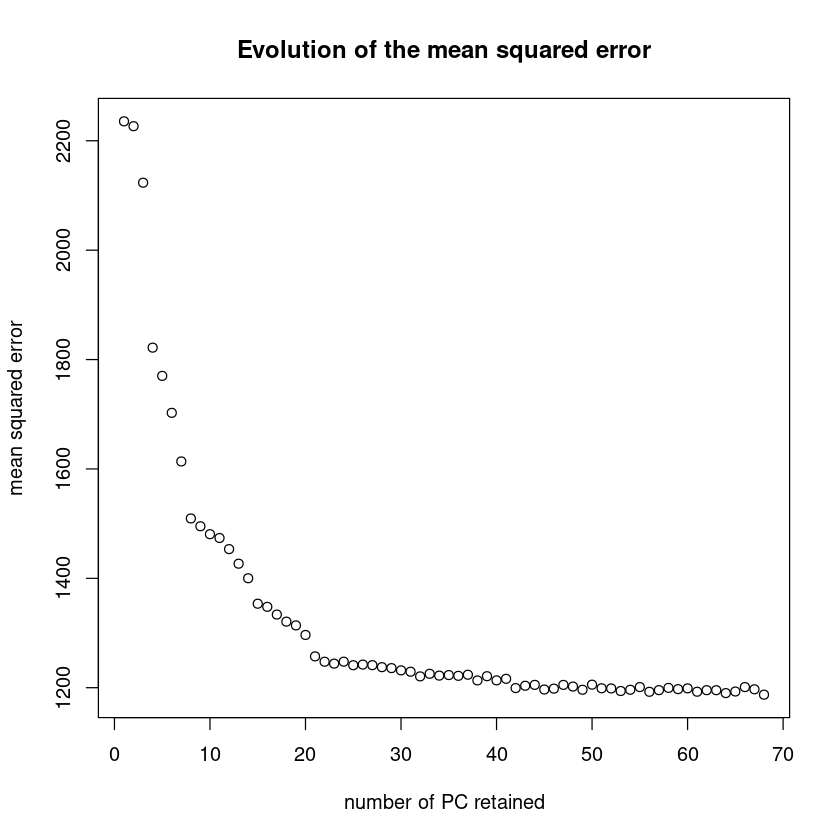

In [86]:
#PCA for LightGBM

train_params <- list(objective = "regression", num_threads = 6) #default parameters, we just use the multi-threading possibility

n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

#Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
X_pca<-data.frame(prcomp(X_train,retx=T)$x)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_pca[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_pca[idx_tr,]
    Y_tr<-y_train[idx_tr]         
     
    for (nb_components in 1:n) {
        #Create a dataset including only the first nb_components principal components
        DS<-X_tr[,1:nb_components,drop=F]
        dtrain <- lgb.Dataset(data = as.matrix(DS), label = Y_tr) #need to format our dataset into a matrix usable by LightGBM
        
        #Model fit (using lm function)
        model<- lgb.train(params = train_params, data = dtrain, eval= "mean_squared_error", verbose = 0)
        
        #Model predict
        Y_hat_ts<- predict(model,as.matrix(X_ts[,1:nb_components,drop=F]))
        
        CV_err[nb_components,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_pca <- round(apply(CV_err,1,mean),digits=4)
plot(mean_cv_error_pca, main="Evolution of the mean squared error", xlab="number of PC retained", ylab="mean squared error")

From the results above, we can see that only the 42 first principal components bring information to the model and contribute to decreasing the MSE. The cross-validation error for 42 features is 1199.3708.

Thus, we can conclude that the best feature selection technique for the LightGBM algorithm is the one based on the mRMR  because the cross-validation error is the lowest. For the validation of the LightGBM, we will use the 49 first features selected by the mRMR.

# Hyperparameters tuning

Hyperparameter tuning consist in fine-tuning the parameters of the model which are not learned during the learning phase. We will explore them via a grid search approach. This means that we will explore a defined range of possible values for a given parameter and that we will test all possible values for that parameter. For each parameter value we will look at the evolution of the MSE and perform a two-fold cross-validation.

The first algorithm for which we will optimize the hyperparameters is the elastic net. We will tune the parameter alpha which controls the balance between the two regression type inside the elastic net (i.e. ridge and lasso). Then we will tune the penalty parameter lambda.

We start by optimizing alpha by looking throughout its range (0 to 1) by steps of 0.01.

  [1] "Alpha:  0  ; CV error= 1802.6935  ; std dev= 77.1257"   
  [2] "Alpha:  0.01  ; CV error= 1649.6963  ; std dev= 72.2701"
  [3] "Alpha:  0.02  ; CV error= 1613.6178  ; std dev= 71.1696"
  [4] "Alpha:  0.03  ; CV error= 1602.2155  ; std dev= 74.8891"
  [5] "Alpha:  0.04  ; CV error= 1594.2124  ; std dev= 74.6821"
  [6] "Alpha:  0.05  ; CV error= 1586.7937  ; std dev= 73.1447"
  [7] "Alpha:  0.06  ; CV error= 1582.1734  ; std dev= 70.6439"
  [8] "Alpha:  0.07  ; CV error= 1577.2199  ; std dev= 68.2069"
  [9] "Alpha:  0.08  ; CV error= 1574.8568  ; std dev= 68.2325"
 [10] "Alpha:  0.09  ; CV error= 1573.1231  ; std dev= 68.262" 
 [11] "Alpha:  0.1  ; CV error= 1571.0526  ; std dev= 67.1189" 
 [12] "Alpha:  0.11  ; CV error= 1568.6315  ; std dev= 69.3492"
 [13] "Alpha:  0.12  ; CV error= 1566.4833  ; std dev= 69.3071"
 [14] "Alpha:  0.13  ; CV error= 1567.726  ; std dev= 69.4514" 
 [15] "Alpha:  0.14  ; CV error= 1565.9643  ; std dev= 67.184" 
 [16] "Alpha:  0.15  ; CV error= 1565.99

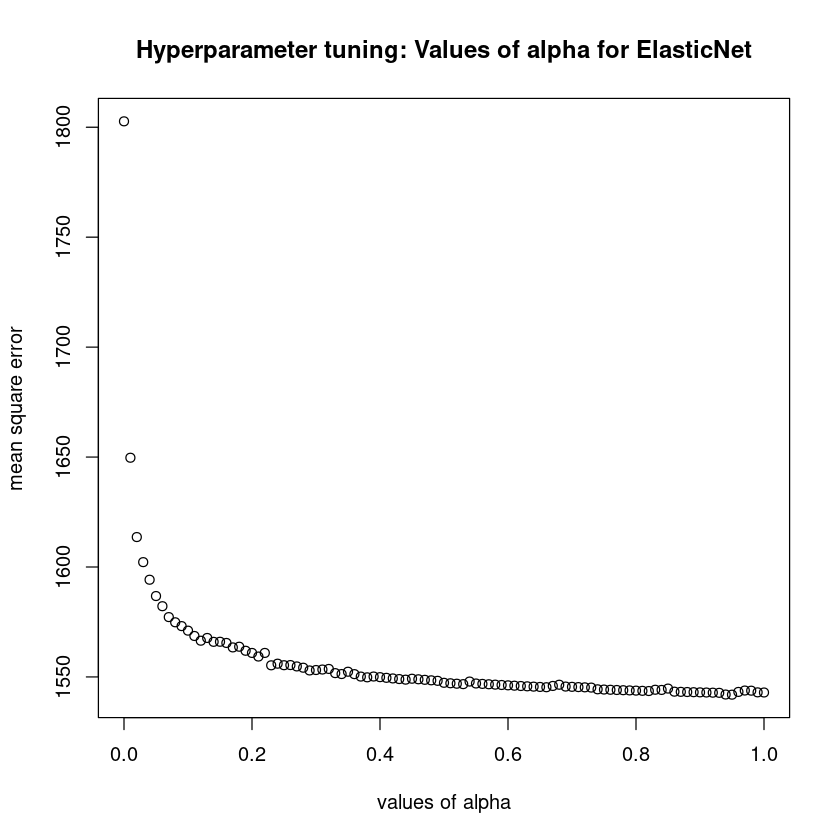

In [87]:
#elastic net: alpha value
alpha_val <- seq(0, 1, by = 0.01)

n <- ncol(X_train) #number of features
N <- nrow(X_train) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err <- matrix(0, nrow = length(alpha_val), ncol = CV_folds)

for (i in 1:CV_folds) {
  
  idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
  X_ts<-X_train_elastic[idx_ts,]  
  Y_ts<-y_train[idx_ts]  
  
  idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
  X_tr<-X_train_elastic[idx_tr,]
  Y_tr<-y_train[idx_tr]         
  
  for (j in seq_along(alpha_val)) {
    
    #Model fit (using elastic net)
    model<- glmnet(x=X_tr, y=Y_tr, alpha=alpha_val[j])
    
    #Model predict
    Y_hat_ts<- predict(model,X_ts)
    
    CV_err[j,i]<-mean((Y_hat_ts-Y_ts)^2)
  }
}  

print(paste("Alpha: ",alpha_val[1:101]," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_alpha <- round(apply(CV_err,1,mean),digits=4)
res_temp_alpha <- data.frame(alpha_val = alpha_val[1:101], mean_cv_error_pca = mean_cv_error_alpha[1:101])
plot(res_temp_alpha, main="Hyperparameter tuning: Values of alpha for ElasticNet", xlab="values of alpha", ylab= "mean square error")

The best alpha we got was 0.95 with a MSE of 1541.9369.

We can now optimize the penalty parameter lambda.

  [1] "Lambda:  0.01  ; CV error= 1426.0558  ; std dev= 59.8691"
  [2] "Lambda:  0.02  ; CV error= 1425.614  ; std dev= 60.2839" 
  [3] "Lambda:  0.03  ; CV error= 1425.4926  ; std dev= 60.4401"
  [4] "Lambda:  0.04  ; CV error= 1425.4541  ; std dev= 60.484" 
  [5] "Lambda:  0.05  ; CV error= 1425.4843  ; std dev= 60.5186"
  [6] "Lambda:  0.06  ; CV error= 1425.5114  ; std dev= 60.5745"
  [7] "Lambda:  0.07  ; CV error= 1425.5929  ; std dev= 60.651" 
  [8] "Lambda:  0.08  ; CV error= 1425.7248  ; std dev= 60.7176"
  [9] "Lambda:  0.09  ; CV error= 1425.9388  ; std dev= 60.7685"
 [10] "Lambda:  0.1  ; CV error= 1426.1995  ; std dev= 60.8162" 
 [11] "Lambda:  0.11  ; CV error= 1426.4833  ; std dev= 60.8666"
 [12] "Lambda:  0.12  ; CV error= 1426.7609  ; std dev= 60.9689"
 [13] "Lambda:  0.13  ; CV error= 1427.0495  ; std dev= 61.1255"
 [14] "Lambda:  0.14  ; CV error= 1427.3718  ; std dev= 61.2957"
 [15] "Lambda:  0.15  ; CV error= 1427.7219  ; std dev= 61.4991"
 [16] "Lambda:  0.16  ; C

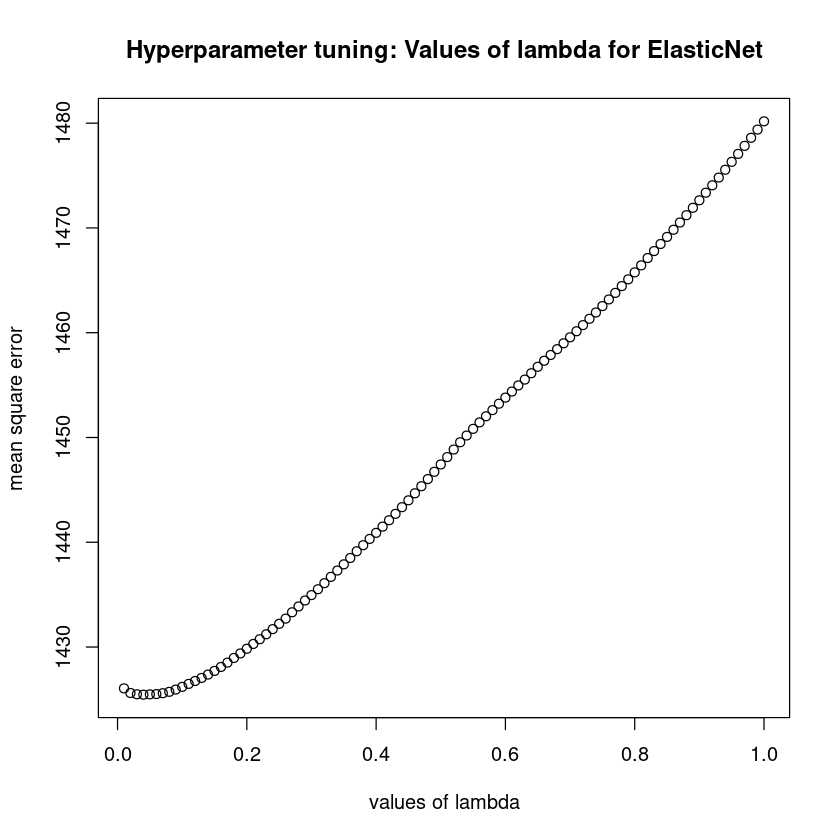

In [88]:
#elastic net: lambda
lambda_val <- seq(0.01, 1, by = 0.01)

CV_err_lambda <- matrix(0, nrow = length(lambda_val), ncol = CV_folds)

for (i in 1:CV_folds) {
  
  idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
  X_ts<-X_train_elastic[idx_ts,]  
  Y_ts<-y_train[idx_ts]  
  
  idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
  X_tr<-X_train_elastic[idx_tr,]
  Y_tr<-y_train[idx_tr]         
  
  for (j in seq_along(lambda_val)) {
    
    #Model fit (using elastic net)
    model<- glmnet(x=X_tr, y=Y_tr, alpha=0.95, lambda=lambda_val[j])
    
    #Model predict
    Y_hat_ts<- predict(model,X_ts)
    
    CV_err_lambda[j,i]<-mean((Y_hat_ts-Y_ts)^2)
  }
}  

print(paste("Lambda: ",lambda_val," ; CV error=",round(apply(CV_err_lambda,1,mean),digits=4), " ; std dev=",round(apply(CV_err_lambda,1,sd),digits=4)))
mean_cv_error_lambda <- round(apply(CV_err_lambda,1,mean),digits=4)
res_temp_lambda <- data.frame(lambda_val, mean_cv_error_lambda)
plot(res_temp_lambda, main="Hyperparameter tuning: Values of lambda for ElasticNet", xlab="values of lambda", ylab= "mean square error")

The best value for lambda is 0.04 with a MSE of 1425.4541.

The second algorithm for which we will tune the hyperparameters is the SVR. We will start by looking for the optimal kernel.

The commonly used kernel functions are:  
- linear: $\langle x, x' \rangle$
- polynomial: $(\gamma\langle x, x' \rangle + r)^d$, where $d$ is specified by parameter degree, $r$ by coef0.
- rbf: $\exp(-\gamma \|x - x'\|^2)$, where $\gamma$ is specified by parameter gamma, must be greater than 0.
- sigmoid: $\tanh(\gamma\langle x, x' \rangle + r)$, where $r$ is specified by coef0.
 
Based on our data, we will se which one of the polynomial, sigmoid or radial basis is the more appropriate.

In [89]:
#SVR: comparison of the different kernels
poss_kernels <- c('linear', 'polynomial', 'radial', 'sigmoid')
n <- length(poss_kernels)
N <- nrow(X_train_svm)

CV_folds <- 2

size_CV <- floor(N/CV_folds)

CV_err <- matrix(0, nrow=n, ncol=CV_folds)

for (i in 1:CV_folds) {

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_svm[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
    
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_svm[idx_tr,]
    Y_tr<-y_train[idx_tr]   

    for (j in seq_along(poss_kernels)) {

        #Model fit
        model<- svm(Y_tr~.,
                    data = cbind(X_tr, Y_tr),
                    kernel = poss_kernels[j])

        #Model predict
        Y_hat_ts<- predict(model,X_ts)

        CV_err[j,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}
print(paste("Kernel : ",poss_kernels," ; CV error =",round(apply(CV_err,1,mean),digits=4), " ; std dev =",round(apply(CV_err,1,sd),digits=4)))

[1] "Kernel :  linear  ; CV error = 1507.0828  ; std dev = 55.4846"        
[2] "Kernel :  polynomial  ; CV error = 1638.4969  ; std dev = 186.5981"   
[3] "Kernel :  radial  ; CV error = 1125.861  ; std dev = 75.3432"         
[4] "Kernel :  sigmoid  ; CV error = 1855218.2048  ; std dev = 116700.7626"


The radial kernel with the minimum cross-validation error is selected.

The second hyperparameter to tune for SVR is the cost, C. The parameter C, found in all SVM kernels, balances misclassification and decision surface simplicity, with a default value of 1.
More regularization is associated with decreasing C, allowing SVM to regress the training example “less accurately”.By default, cost = 1

 [1] "Cost:  0  ; CV error= 1125.861  ; std dev= 75.3432"  
 [2] "Cost:  0.1  ; CV error= 1125.861  ; std dev= 75.3432"
 [3] "Cost:  0.2  ; CV error= 1125.861  ; std dev= 75.3432"
 [4] "Cost:  0.3  ; CV error= 1125.861  ; std dev= 75.3432"
 [5] "Cost:  0.4  ; CV error= 1125.861  ; std dev= 75.3432"
 [6] "Cost:  0.5  ; CV error= 1125.861  ; std dev= 75.3432"
 [7] "Cost:  0.6  ; CV error= 1125.861  ; std dev= 75.3432"
 [8] "Cost:  0.7  ; CV error= 1125.861  ; std dev= 75.3432"
 [9] "Cost:  0.8  ; CV error= 1125.861  ; std dev= 75.3432"
[10] "Cost:  0.9  ; CV error= 1125.861  ; std dev= 75.3432"
[11] "Cost:  1  ; CV error= 1125.861  ; std dev= 75.3432"  


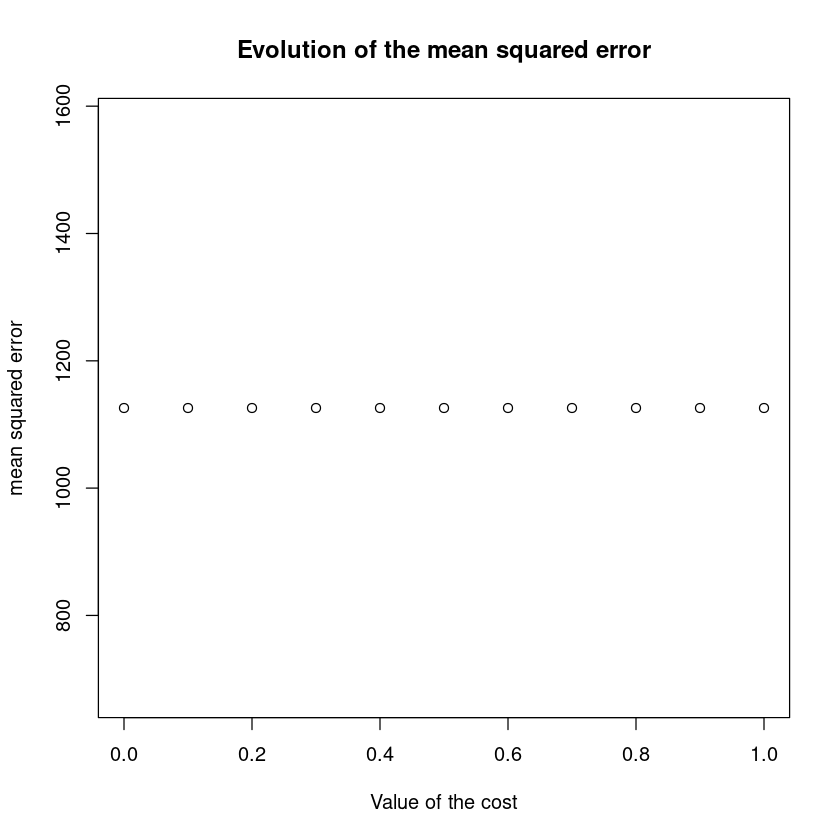

In [90]:
# Comparison of the different C
poss_cost <- seq(0, 1, 0.1)
n <- ncol(X_train_svm)
N <- nrow(X_train_svm)

CV_folds <- 2

size_CV <- floor(N/CV_folds)

CV_err <- matrix(0, nrow = length(poss_cost), ncol = CV_folds)

for (i in 1:CV_folds) {

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_svm[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
    
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_svm[idx_tr,]
    Y_tr<-y_train[idx_tr]   

    for (j in seq_along(poss_cost)) {
        
        #Model fit
        model<- svm(Y_tr~.,
                    data = cbind(X_tr, Y_tr),
                    kernel = 'radial', 
                    C = poss_cost[j])

        #Model predict
        Y_hat_ts<- predict(model,X_ts)

        CV_err[j,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}
print(paste("Cost: ",poss_cost," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_cost <- round(apply(CV_err,1,mean),digits=4)
plot(poss_cost, mean_cv_error_cost, main="Evolution of the mean squared error", xlab="Value of the cost", ylab="mean squared error")

The cost parameter gives a constant MSE even when we look at higher values of C so we won't include it in further analyses.

The third hyperparameter to tune for the SVR is gamma. Gamma determines the impact of an individual training example. The more significant the gamma value, the more closely related other examples need to be to have an impact.  By default, gamma = 0.1

 [1] "Gamma:  0  ; CV error= 2380.758  ; std dev= 47.4311"    
 [2] "Gamma:  0.01  ; CV error= 1191.502  ; std dev= 73.1534" 
 [3] "Gamma:  0.02  ; CV error= 1128.1337  ; std dev= 75.7748"
 [4] "Gamma:  0.03  ; CV error= 1113.1807  ; std dev= 71.1291"
 [5] "Gamma:  0.04  ; CV error= 1118.6398  ; std dev= 66.5353"
 [6] "Gamma:  0.05  ; CV error= 1135.4243  ; std dev= 64.9612"
 [7] "Gamma:  0.06  ; CV error= 1160.1951  ; std dev= 65.0225"
 [8] "Gamma:  0.07  ; CV error= 1190.7145  ; std dev= 65.6316"
 [9] "Gamma:  0.08  ; CV error= 1225.1687  ; std dev= 65.9938"
[10] "Gamma:  0.09  ; CV error= 1262.1819  ; std dev= 66.2789"
[11] "Gamma:  0.1  ; CV error= 1300.5671  ; std dev= 66.8942" 


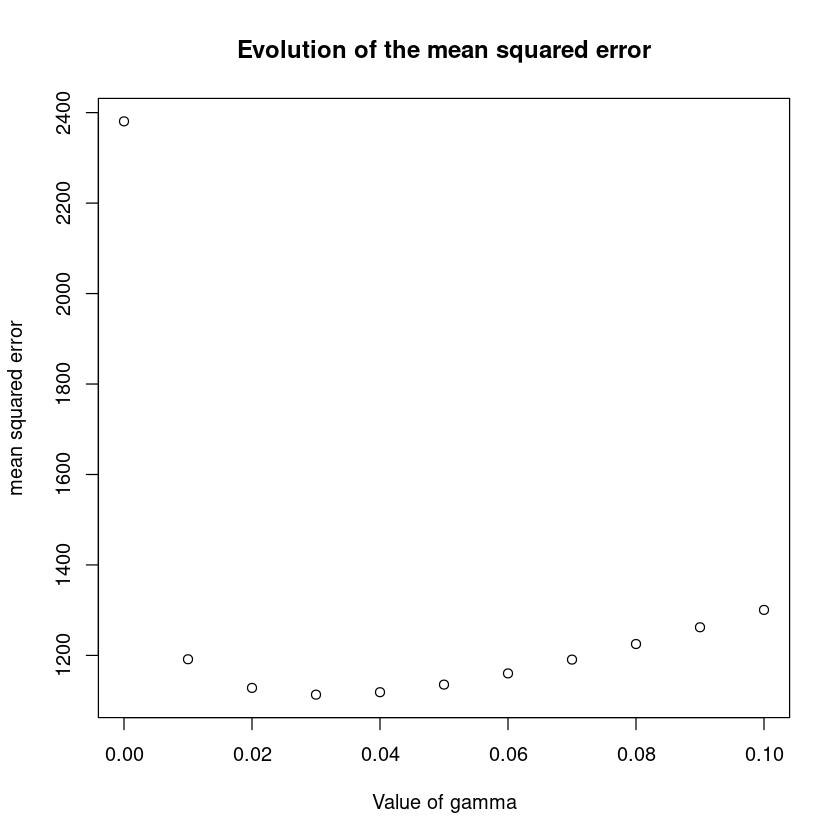

In [91]:
#SVR: gamma
poss_gamma <- seq(0,0.1,0.01)
n <- ncol(X_train_svm)
N <- nrow(X_train_svm)

CV_folds <- 2

size_CV <- floor(N/CV_folds)

CV_err <- matrix(0, nrow = length(poss_gamma), ncol = CV_folds)

for (i in 1:CV_folds) {

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_svm[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
    
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_svm[idx_tr,]
    Y_tr<-y_train[idx_tr]   

    for (j in seq_along(poss_gamma)) {

        # Model fit
        model<- svm(Y_tr~.,
                    data = cbind(X_tr, Y_tr),
                    kernel = 'radial', 
                    gamma = poss_gamma[j])

        # Model predict
        Y_hat_ts<- predict(model,X_ts)

        CV_err[j,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}
print(paste("Gamma: ",poss_gamma," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_gamma <- round(apply(CV_err,1,mean),digits=4)
plot(poss_gamma, mean_cv_error_gamma, main="Evolution of the mean squared error", xlab="Value of gamma", ylab="mean squared error")


The best value for gamma is thus 0.03.

The last hyperparameter to tune for SVR is epsilon. The epsilon parameter functions as a means of defining a tolerance level where errors are exempt from penalties. As epsilon increases, the tolerance for errors in your model also increases. In the case where epsilon equals zero, all errors will be subject to penalties.  By default, epsilon = 0.1

 [1] "Epsilon:  0  ; CV error= 1134.9871  ; std dev= 71.3571"  
 [2] "Epsilon:  0.1  ; CV error= 1125.861  ; std dev= 75.3432" 
 [3] "Epsilon:  0.2  ; CV error= 1120.4302  ; std dev= 77.3053"
 [4] "Epsilon:  0.3  ; CV error= 1115.7841  ; std dev= 81.4336"
 [5] "Epsilon:  0.4  ; CV error= 1118.9978  ; std dev= 80.9151"
 [6] "Epsilon:  0.5  ; CV error= 1130.6495  ; std dev= 79.4439"
 [7] "Epsilon:  0.6  ; CV error= 1150.914  ; std dev= 75.4333" 
 [8] "Epsilon:  0.7  ; CV error= 1185.0454  ; std dev= 74.1828"
 [9] "Epsilon:  0.8  ; CV error= 1233.4941  ; std dev= 68.8608"
[10] "Epsilon:  0.9  ; CV error= 1301.4297  ; std dev= 60.0883"
[11] "Epsilon:  1  ; CV error= 1397.6279  ; std dev= 54.769"   


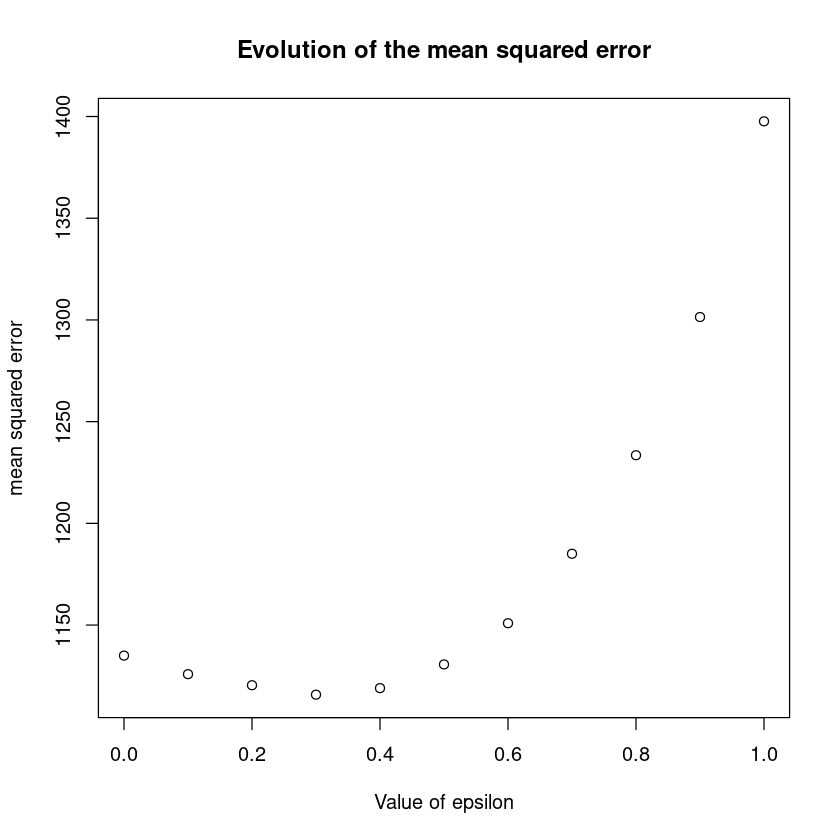

In [92]:
#SVR: epsilon
poss_epsilon <- seq(0,1,0.1)
n <- ncol(X_train_svm)
N <- nrow(X_train_svm)

CV_folds <- 2

size_CV <- floor(N/CV_folds)

CV_err <- matrix(0, nrow = length(poss_epsilon), ncol = CV_folds)

for (i in 1:CV_folds) {

    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_svm[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
    
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_svm[idx_tr,]
    Y_tr<-y_train[idx_tr]   

    for (j in seq_along(poss_epsilon)) {
        
        #Model fit
        model<- svm(Y_tr~.,
                    data = cbind(X_tr, Y_tr),
                    kernel = 'radial', 
                    epsilon = poss_epsilon[j])

        #Model predict
        Y_hat_ts<- predict(model,X_ts)

        CV_err[j,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}
print(paste("Epsilon: ",poss_epsilon," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_epsilon <- round(apply(CV_err,1,mean),digits=4)
plot(poss_epsilon, mean_cv_error_epsilon, main="Evolution of the mean squared error", xlab="Value of epsilon", ylab="mean squared error")


The best value for the parameter epsilon is 0.3.

The third algorithm for which we will optimize the hyperparameter is the random forest for which we will tune the parameter of the number of trees in the random forest.

 [1] "Number of trees:  100  ; CV error= 1046.932  ; std dev= 65.3836"  
 [2] "Number of trees:  200  ; CV error= 1036.652  ; std dev= 61.6399"  
 [3] "Number of trees:  300  ; CV error= 1033.2492  ; std dev= 62.3444" 
 [4] "Number of trees:  400  ; CV error= 1033.8793  ; std dev= 64.7804" 
 [5] "Number of trees:  500  ; CV error= 1035.1955  ; std dev= 64.4489" 
 [6] "Number of trees:  600  ; CV error= 1031.6329  ; std dev= 66.6029" 
 [7] "Number of trees:  700  ; CV error= 1033.594  ; std dev= 64.1206"  
 [8] "Number of trees:  800  ; CV error= 1031.6478  ; std dev= 65.7388" 
 [9] "Number of trees:  900  ; CV error= 1032.4432  ; std dev= 65.5167" 
[10] "Number of trees:  1000  ; CV error= 1033.1381  ; std dev= 65.0736"
[11] "Number of trees:  100  ; CV error= 0  ; std dev= 0"               
[12] "Number of trees:  200  ; CV error= 0  ; std dev= 0"               
[13] "Number of trees:  300  ; CV error= 0  ; std dev= 0"               
[14] "Number of trees:  400  ; CV error= 0  ; std d

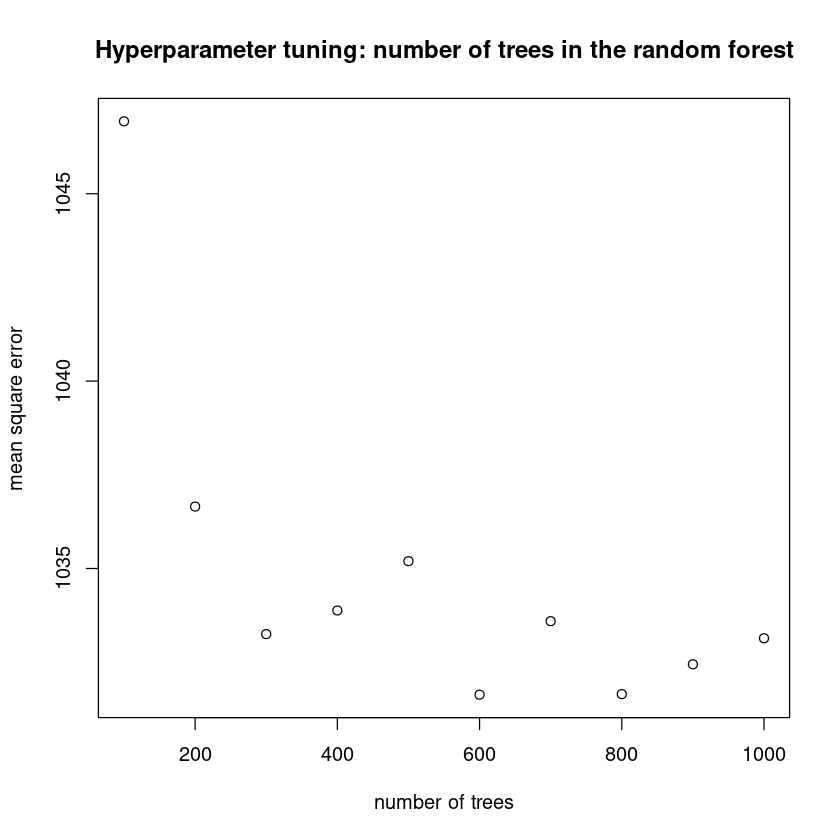

In [93]:
#random forest: number of trees
n_trees <- seq(100, 1000, by = 100) #range of values between 100 and 1000

n <- ncol(X_train_forest) #number of features
N <- nrow(X_train_forest) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_forest[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_forest[idx_tr,]
    Y_tr<-y_train[idx_tr]         
     
    for (j in seq_along(n_trees)) {
        
        # Model fit (using random forest)
        model<- randomForest(x=X_tr, y=Y_tr, ntree=n_trees[j])
        
        # Model predict
        Y_hat_ts<- predict(model,X_ts)
        
        CV_err[j,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("Number of trees: ",n_trees," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_tree <- round(apply(CV_err,1,mean),digits=4)
res_temp_n_trees <- data.frame(n_trees, mean_cv_error_tree[1:10])
plot(res_temp_n_trees, main="Hyperparameter tuning: number of trees in the random forest", xlab="number of trees", ylab= "mean square error")

From the graph here above, we can see that the optimal number of trees in the random forest is 600 so we decided to settle for 600 trees in the random forest for the validation of our model.

The fourth and last algorithm for this section of the hyperparameters tuning is the LightGBM. For this algorithm, we fine-tuned two hyperparameters: the number of iterations and the number of leaves in each tree (proportional to the size of the tree). We start by estimating the number of iterations needed by exploring a range between 100 and 5000 by steps of 100. The default value for this parameter is 100.

 [1] "Iterations:  100  ; CV error= 1000.8097  ; std dev= 65.3416"
 [2] "Iterations:  200  ; CV error= 967.0852  ; std dev= 60.5687" 
 [3] "Iterations:  300  ; CV error= 952.7603  ; std dev= 60.6794" 
 [4] "Iterations:  400  ; CV error= 945.5396  ; std dev= 57.4992" 
 [5] "Iterations:  500  ; CV error= 942.2339  ; std dev= 59.8789" 
 [6] "Iterations:  600  ; CV error= 939.5047  ; std dev= 58.8435" 
 [7] "Iterations:  700  ; CV error= 938.2672  ; std dev= 59.3236" 
 [8] "Iterations:  800  ; CV error= 937.0485  ; std dev= 59.2193" 
 [9] "Iterations:  900  ; CV error= 936.4153  ; std dev= 59.1051" 
[10] "Iterations:  1000  ; CV error= 936.187  ; std dev= 58.7825" 
[11] "Iterations:  1100  ; CV error= 936.0182  ; std dev= 58.9849"
[12] "Iterations:  1200  ; CV error= 935.8666  ; std dev= 58.7968"
[13] "Iterations:  1300  ; CV error= 935.6605  ; std dev= 58.6219"
[14] "Iterations:  1400  ; CV error= 935.4155  ; std dev= 58.1978"
[15] "Iterations:  1500  ; CV error= 935.3447  ; std dev= 58.1

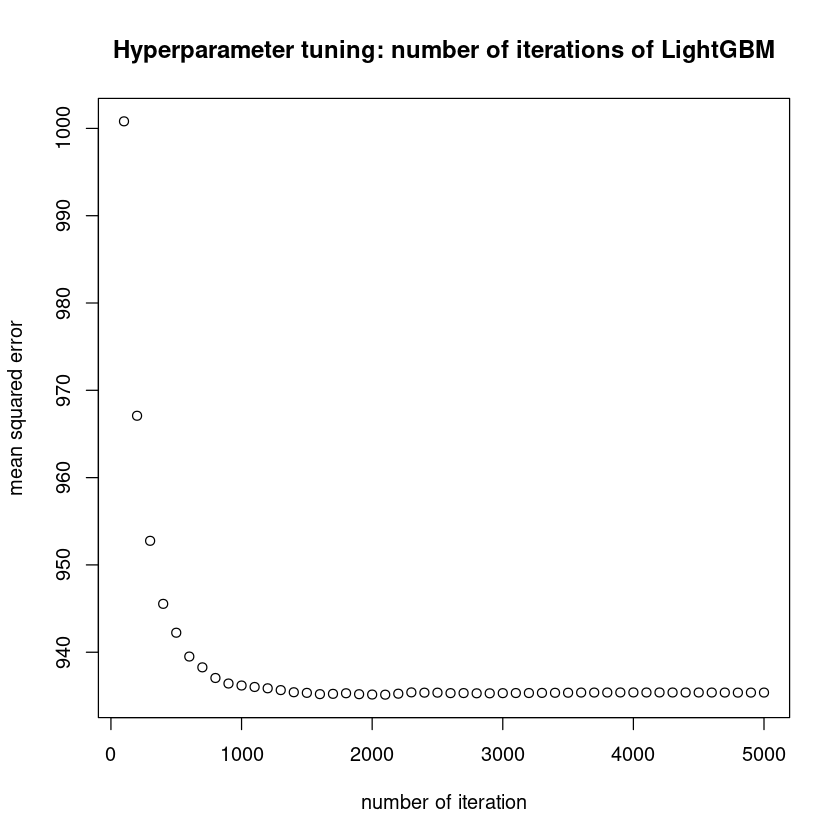

In [94]:
#LightGBM: Number of iterations
n_iter <- seq(100, 5000, by = 100) #hyperparameter to tune

n <- ncol(X_train_lightgbm) #number of features
N <- nrow(X_train_lightgbm) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=length(n_iter),ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_lightgbm[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_lightgbm[idx_tr,]
    Y_tr<-y_train[idx_tr]         
     
    for (j in seq_along(n_iter)) {
        dtrain <- lgb.Dataset(data = X_tr, label = Y_tr) #need to format our dataset into a matrix usable by LightGBM
        train_params <- list(num_iterations = n_iter[j], objective = "regression", num_threads = 6)
        
        #Model fit (using LightGBM)
        model <- lgb.train(params = train_params, data = dtrain, eval= "mean_squared_error", verbose = 0L)
        
        #Model predict
        Y_hat_ts<- predict(model,X_ts)
        
        CV_err[j,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("Iterations: ",n_iter," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_iter <- round(apply(CV_err,1,mean),digits=4)
res_temp_n_iter <- data.frame(n_iter, mean_cv_error_iter)
plot(res_temp_n_iter, main="Hyperparameter tuning: number of iterations of LightGBM", xlab="number of iteration", ylab="mean squared error")


The MSE reached a plateau after more than 1000 iterations to build the gradient boosting tree. We will thus use 1000 iterations for the validation of this model.

The second hyperparameter to tune for the LighGBM is the number of leaves in each tree. Given that the default value is 31 leaves, we explored a range between a small 2 leaves tree and a 60 leaves tree.

 [1] "#Leaves:  2  ; CV error= 1262.6474  ; std dev= 67.4857"
 [2] "#Leaves:  4  ; CV error= 1058.4503  ; std dev= 54.971" 
 [3] "#Leaves:  6  ; CV error= 1007.7214  ; std dev= 60.3019"
 [4] "#Leaves:  8  ; CV error= 985.5537  ; std dev= 59.2193" 
 [5] "#Leaves:  10  ; CV error= 972.2033  ; std dev= 55.785" 
 [6] "#Leaves:  12  ; CV error= 962.3911  ; std dev= 48.6486"
 [7] "#Leaves:  14  ; CV error= 955.696  ; std dev= 55.0829" 
 [8] "#Leaves:  16  ; CV error= 951.0705  ; std dev= 60.7353"
 [9] "#Leaves:  18  ; CV error= 944.1096  ; std dev= 61.1042"
[10] "#Leaves:  20  ; CV error= 944.55  ; std dev= 55.8429"  
[11] "#Leaves:  22  ; CV error= 942.2107  ; std dev= 56.4176"
[12] "#Leaves:  24  ; CV error= 947.6024  ; std dev= 57.9635"
[13] "#Leaves:  26  ; CV error= 938.7917  ; std dev= 58.8995"
[14] "#Leaves:  28  ; CV error= 936.6089  ; std dev= 59.565" 
[15] "#Leaves:  30  ; CV error= 939.0948  ; std dev= 60.7403"
[16] "#Leaves:  32  ; CV error= 935.7389  ; std dev= 57.7363"
[17] "#L

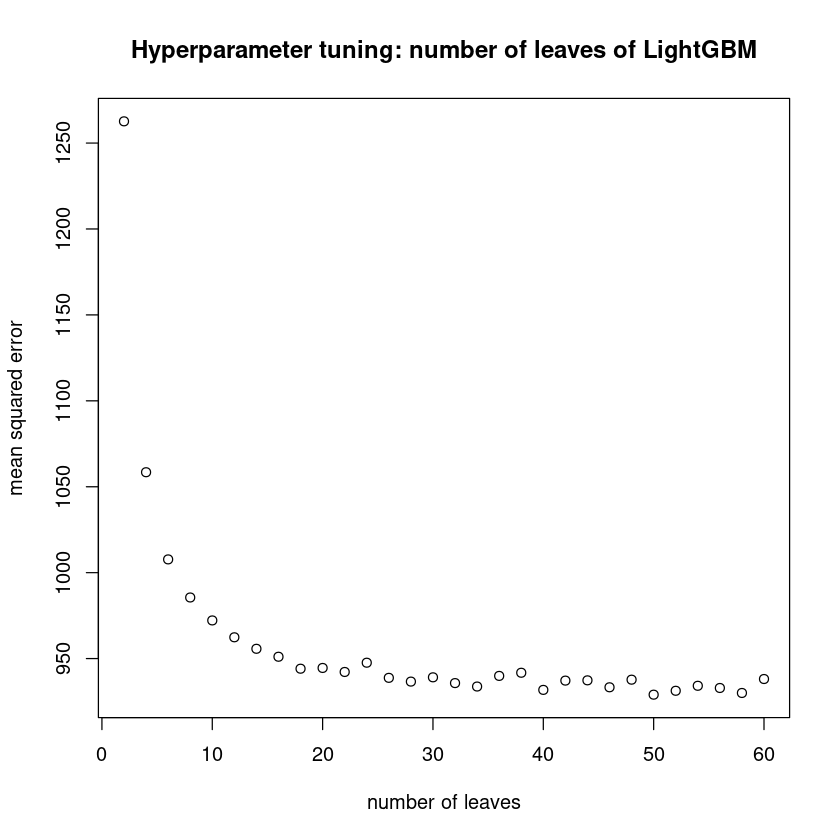

In [95]:
#LightGBM: Number of leaves
n_leaves <- seq(2, 60, by = 2) #hyperparameter to tune

n <- ncol(X_train_lightgbm) #number of features
N <- nrow(X_train_lightgbm) #number of samples

CV_folds <- 2 #two-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=length(n_leaves),ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_lightgbm[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_lightgbm[idx_tr,]
    Y_tr<-y_train[idx_tr]         
     
    for (j in seq_along(n_leaves)) {
        dtrain <- lgb.Dataset(data = X_tr, label = Y_tr)
        train_params <- list(num_iterations = 1000, num_leaves =n_leaves[j], objective = "regression", num_threads = 6)
        
        #Model fit (using LightGBM)
        model <- lgb.train(params = train_params, data = dtrain, eval= "mean_squared_error", verbose = 0L)
        
        #Model predict
        Y_hat_ts<- predict(model,X_ts)
        
        CV_err[j,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Leaves: ",n_leaves," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))
mean_cv_error_n_leaves <- round(apply(CV_err,1,mean),digits=4)
res_temp_n_leaves <- data.frame(n_leaves, mean_cv_error_n_leaves)
plot(res_temp_n_leaves, main="Hyperparameter tuning: number of leaves of LightGBM", xlab="number of leaves", ylab="mean squared error")


The number of leaves for an optimal MSE is 40. Thus, we will use this number for the validation of the algorithm.

# Model validation and submission to Zindi

The models were evaluated using different metrics:

- the mean squared error (MSE) on the training set and on the test set
- the root mean squared error (RMSE) on the test set 
- the normalised mean squared error (NMSE) on the test set

The formula for the MSE is:

$$\mathrm{MSE=\frac{1}{N_{ts}}\sum_{i=1}^{N_{ts}}(y_i-\hat{y}_i)^2}$$

The formula for the RMSE is:

$$\mathrm{RMSE=\sqrt{\frac{1}{N_{ts}}\sum_{i=1}^{N_{ts}}(y_i-\hat{y}_i)^2}}$$

The formula for the NMSE is:

$$\mathrm{NMSE=\frac{\sum_{i=1}^{N_{ts}}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{N_{ts}}(y_i-\overline{y})^2}}$$

where :

- $\mathrm{\hat{y}_i}$: the predicted value of the $\mathrm{i^{th}}$ observation
- $\mathrm{{y}_i}$: the observed value of the $\mathrm{i^{th}}$ observation
- $\mathrm{N_{ts}}$: the total number of observations in the test set
- $\mathrm{\overline{y}_i}$: sample mean

The prediction of each model were submitted on Zindi and respective scores are reported here under.

The first model that we evaluate is the elastic net algorithm.

In [96]:
#Model evaluation: elastic net
n <- 1
N <- nrow(X_train_elastic) #number of samples

CV_folds <- 10 #ten-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err_train<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test_root<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test_norm<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_elastic[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_elastic[idx_tr,]
    Y_tr<-y_train[idx_tr]         

    #Model fit (using elastic net)
    model<- glmnet(x=X_tr,y=Y_tr,alpha=0.95,lambda=0.04)
    
    #Model predict train set
    Y_hat_ts<- predict(model,X_ts)
    
    CV_err_train[,i]<-mean((Y_hat_ts-Y_ts)^2)

    #Model predict test set
    Y_hat_test<- predict(model,X_test_elastic)
    
    CV_err_test[,i]<-mean((Y_hat_test-y_test)^2) #mean squared error
    CV_err_test_root[,i]<-sqrt(mean((Y_hat_test-y_test)^2)) #root mean squared error
    CV_err_test_norm[,i]<- mean((Y_hat_test-y_test)^2)/mean((y_test-mean(y_test))^2) #normalised mean squared error
    
    Y_hat_final<- predict(model, test_elastic)
}
print(paste("In sample mean squared error ; CV error=",round(apply(CV_err_train,1,mean),digits=4), " ; std dev=",round(apply(CV_err_train,1,sd),digits=4)))
print(paste("Out sample mean squared error ; CV error=",round(apply(CV_err_test,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test,1,sd),digits=4)))
print(paste("Out sample rooted mean squared error ; CV error=",round(apply(CV_err_test_root,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test_root,1,sd),digits=4)))
print(paste("Out sample normalised mean squared error ; CV error=",round(apply(CV_err_test_norm,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test_norm,1,sd),digits=4)))
Zindi_submission_elastic <- data.frame(place_ID_date= place, target= Y_hat_final)
head(Zindi_submission_elastic)

[1] "In sample mean squared error ; CV error= 1424.9971  ; std dev= 149.4114"
[1] "Out sample mean squared error ; CV error= 1267.8365  ; std dev= 0.7151"
[1] "Out sample rooted mean squared error ; CV error= 35.6067  ; std dev= 0.01"
[1] "Out sample normalised mean squared error ; CV error= 0.6097  ; std dev= 3e-04"


,place_ID_date,s0
,<chr>,<dbl>
1,0OS9LVX X 2020-01-02,59.29419
2,0OS9LVX X 2020-01-03,39.67472
3,0OS9LVX X 2020-01-04,35.12800
4,0OS9LVX X 2020-01-05,29.52331
5,0OS9LVX X 2020-01-06,42.64583
6,0OS9LVX X 2020-01-07,50.08381


In [97]:
#write.csv(Zindi_submission_elastic, "/home/pierrot/pCloudDrive/Mabisbis/Statistical_Foundation_of_Machine_Learning/Project/Zindi_submission_elastic.csv", row.names=F)

The score obtained on Zindi for the elastic net algorithm is 39.40302775.

Next we evaluate the SVR algorithm.

In [108]:
#Model evaluation: SVM
train_params_svm <- list(kernel = 'radial', gamma = 0.03, epsilon = 0.3) 

n <- 1
N <- nrow(X_train_elastic) #number of samples

CV_folds <- 10 #ten-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err_train<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test_root<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test_norm<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_svm[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_svm[idx_tr,]
    Y_tr<-y_train[idx_tr]         
     

    # Model fit (using SVM)
    model <- svm(Y_tr~.,
                    data = cbind(X_tr, Y_tr),
                    params = train_params_svm)
    
    # Model predict train
    Y_hat_ts<- predict(model,X_ts)
    
    CV_err_train[,i]<-mean((Y_hat_ts-Y_ts)^2)

    # Model predict test
    Y_hat_test<- predict(model,X_test_svm)
    
    CV_err_test[,i]<-mean((Y_hat_test-y_test)^2) #mean squared error
    CV_err_test_root[,i]<-sqrt(mean((Y_hat_test-y_test)^2)) #root mean squared error
    CV_err_test_norm[,i]<- mean((Y_hat_test-y_test)^2)/mean((y_test-mean(y_test))^2) #normalised mean squared error
    
    Y_hat_final<- predict(model, test_svm)
}
print(paste("In sample mean squared error ; CV error=",round(apply(CV_err_train,1,mean),digits=4), " ; std dev=",round(apply(CV_err_train,1,sd),digits=4)))
print(paste("Out sample mean squared error ; CV error=",round(apply(CV_err_test,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test,1,sd),digits=4)))
print(paste("Out sample rooted mean squared error ; CV error=",round(apply(CV_err_test_root,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test_root,1,sd),digits=4)))
print(paste("Out sample normalised mean squared error ; CV error=",round(apply(CV_err_test_norm,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test_norm,1,sd),digits=4)))
Zindi_submission_svm <- data.frame("Place_ID X Date"= place, target= Y_hat_final) 
head(Zindi_submission_svm)

[1] "In sample mean squared error ; CV error= 1052.2605  ; std dev= 187.5134"
[1] "Out sample mean squared error ; CV error= 900.9598  ; std dev= 3.3232"
[1] "Out sample rooted mean squared error ; CV error= 30.0159  ; std dev= 0.0553"
[1] "Out sample normalised mean squared error ; CV error= 0.4333  ; std dev= 0.0016"


,Place_ID.X.Date,target
,<chr>,<dbl>
1,0OS9LVX X 2020-01-02,58.25945
2,0OS9LVX X 2020-01-03,36.90535
3,0OS9LVX X 2020-01-04,37.97669
4,0OS9LVX X 2020-01-05,37.37715
5,0OS9LVX X 2020-01-06,28.89737
6,0OS9LVX X 2020-01-07,43.77577


In [99]:
#write.csv(Zindi_submission_svm, "zindi_submission_svm.csv", row.names=F)

The score obtained on Zindi for the SVR algorithm is 34.98819133  which ranks us to the 154th place in the Leaderboard at the time of writing this report.

Next we evaluate the random forest algorithm.

In [109]:
#Model evaluation: random forest
#n <- ncol(X_train)
n <- 1
N <- nrow(X_train_forest) #number of samples

CV_folds <- 10 #ten-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err_train<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test_root<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test_norm<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_forest[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_forest[idx_tr,]
    Y_tr<-y_train[idx_tr]         
     

    #Model fit (using random forest)
    model<- randomForest(x=X_tr, y=Y_tr, ntree=600)
    
    #Model predict train
    Y_hat_ts<- predict(model,X_ts)
    
    CV_err_train[,i]<-mean((Y_hat_ts-Y_ts)^2)

    #Model predict test
    Y_hat_test<- predict(model,X_test_forest)
    
    CV_err_test[,i]<-mean((Y_hat_test-y_test)^2) #mean squared error
    CV_err_test_root[,i]<-sqrt(mean((Y_hat_test-y_test)^2)) #root mean squared error
    CV_err_test_norm[,i]<- mean((Y_hat_test-y_test)^2)/mean((y_test-mean(y_test))^2) #normalised mean squared error
    
    Y_hat_final<- predict(model, test_forest)
}
print(paste("In sample mean squared error ; CV error=",round(apply(CV_err_train,1,mean),digits=4), " ; std dev=",round(apply(CV_err_train,1,sd),digits=4)))
print(paste("Out sample mean squared error ; CV error=",round(apply(CV_err_test,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test,1,sd),digits=4)))
print(paste("Out sample rooted mean squared error ; CV error=",round(apply(CV_err_test_root,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test_root,1,sd),digits=4)))
print(paste("Out sample normalised mean squared error ; CV error=",round(apply(CV_err_test_norm,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test_norm,1,sd),digits=4)))
#print(paste("Predictions for the test set: ", place, ": ",Y_hat_final))
Zindi_submission_forest <- data.frame(place_ID_date= place, target= Y_hat_final)
head(Zindi_submission_forest)

[1] "In sample mean squared error ; CV error= 950.074  ; std dev= 154.9385"
[1] "Out sample mean squared error ; CV error= 804.2913  ; std dev= 3.1972"
[1] "Out sample rooted mean squared error ; CV error= 28.36  ; std dev= 0.0564"
[1] "Out sample normalised mean squared error ; CV error= 0.3868  ; std dev= 0.0015"


,place_ID_date,target
,<chr>,<dbl>
1,0OS9LVX X 2020-01-02,42.43322
2,0OS9LVX X 2020-01-03,32.60308
3,0OS9LVX X 2020-01-04,34.23073
4,0OS9LVX X 2020-01-05,32.14599
5,0OS9LVX X 2020-01-06,37.13951
6,0OS9LVX X 2020-01-07,32.54637


In [101]:
#write.csv(Zindi_submission_forest, "/home/pierrot/pCloudDrive/Mabisbis/Statistical_Foundation_of_Machine_Learning/Project/Zindi_submission_forest.csv", row.names=F)

The score obtained on Zindi for the random forest is 35.96289537.

Next we evaluate the LightGBM algorithm.

In [102]:
#Model evaluation: LightGBM
train_params <- list(num_iterations = 1000, num_leaves = 40, objective = "regression", num_threads = 6)

n <- 1
N <- nrow(X_train_lightgbm) #number of samples

CV_folds <- 10 #ten-fold cross-validation

size_CV <-floor(N/CV_folds)

CV_err_train<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test_root<-matrix(0,nrow=n,ncol=CV_folds)
CV_err_test_norm<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
    X_ts<-X_train_lightgbm[idx_ts,]  
    Y_ts<-y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
    X_tr<-X_train_lightgbm[idx_tr,]
    Y_tr<-y_train[idx_tr]         
     
    dtrain <- lgb.Dataset(data = X_tr, label = Y_tr)

    # Model fit (using LightGBM)
    model <- lgb.train(params = train_params, data = dtrain, eval= "mean_squared_error", verbose = 0)
    
    # Model predict train
    Y_hat_ts<- predict(model,X_ts)
    
    CV_err_train[,i]<-mean((Y_hat_ts-Y_ts)^2)

    # Model predict test
    Y_hat_test<- predict(model,X_test_lightgbm)
    
    CV_err_test[,i]<-mean((Y_hat_test-y_test)^2) #mean squared error
    CV_err_test_root[,i]<-sqrt(mean((Y_hat_test-y_test)^2)) #root mean squared error
    CV_err_test_norm[,i]<- mean((Y_hat_test-y_test)^2)/mean((y_test-mean(y_test))^2) #normalised mean squared error
    
    Y_hat_final<- predict(model, test_lightgbm)
}
print(paste("In sample mean squared error ; CV error=",round(apply(CV_err_train,1,mean),digits=4), " ; std dev=",round(apply(CV_err_train,1,sd),digits=4)))
print(paste("Out sample mean squared error ; CV error=",round(apply(CV_err_test,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test,1,sd),digits=4)))
print(paste("Out sample rooted mean squared error ; CV error=",round(apply(CV_err_test_root,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test_root,1,sd),digits=4)))
print(paste("Out sample normalised mean squared error ; CV error=",round(apply(CV_err_test_norm,1,mean),digits=4), " ; std dev=",round(apply(CV_err_test_norm,1,sd),digits=4)))
#print(paste("Predictions for the test set: ", place, ": ",Y_hat_final))
Zindi_submission_lightgbm <- data.frame(place_ID_date= place, target= Y_hat_final)
head(Zindi_submission_lightgbm)

[1] "In sample mean squared error ; CV error= 849.3987  ; std dev= 161.9159"
[1] "Out sample mean squared error ; CV error= 722.9615  ; std dev= 8.3537"
[1] "Out sample rooted mean squared error ; CV error= 26.8875  ; std dev= 0.1554"
[1] "Out sample normalised mean squared error ; CV error= 0.3477  ; std dev= 0.004"


,place_ID_date,target
,<chr>,<dbl>
1,0OS9LVX X 2020-01-02,103.389045
2,0OS9LVX X 2020-01-03,55.267432
3,0OS9LVX X 2020-01-04,116.316486
4,0OS9LVX X 2020-01-05,52.281557
5,0OS9LVX X 2020-01-06,14.856550
6,0OS9LVX X 2020-01-07,5.325519


In [103]:
#write.csv(Zindi_submission_lightgbm, "/home/pierrot/pCloudDrive/Mabisbis/Statistical_Foundation_of_Machine_Learning/Project/Zindi_submission_LightGBM.csv", row.names=F)

We obtained the score of 35.57778884 on Zindi.

# Model comparison

From the feature selection, hyperparameter tuning and model evaluation steps, we can make the following comparison table:

|   	| Elastic Net  	| SVR  	| Random Forest  	| LightGBM  	|
|---	|:-:	|:-:	|:-:	|:-:	|
| Feature selection  	|   	|   	|   	|   	|
| Correlation  	| 1427.4067  	| 1135.4919  	| 1038.2162  	| 1002.0028  	|
| mRMR  	| 1425.9301  	| 1125.861  	| 1048.8671  	| 1000.8074  	|
| PCA  	| 1427.8301  	| 1129.59  	| 1288.3713  	| 1199.3708  	|
| Model validation  	|   	|   	|   	|   	|
| MSE training set  	| 1424.9971  	| 1052.2605  	| 950.074  	| 849.3987  	|
| MSE test set  	| 1267.8365  	| 900.9598  	| 804.2913  	| 722.9615  	|
| RMSE test set  	| 35.6067  	| 30.0159  	| 28.36  	| 26.8875  	|
| NMSE test set  	| 0.6097  	| 0.4333  	| 0.3868  	| 0.3477  	|
| Zindi score  	| 39.40302775  	| 34.98819133  	| 35.96289537  	| 35.57778884  	|

The table here above illustrates that, for most of the algorithms presented in this project, the mRMR feature selection technique was performing best. The difference between the different technique tested is not big except for the PCA in ensemble methods (random forest and LightGBM). This may be due to the fact that PCA assumes linear relationships between the features and the target variable while ensemble methods are good at capturing non linear relationships. 

Although the metrics indicate that the LightGBM algorithm performs better than the other algorithms, SVR lead us to a better score on Zindi indicating that this algorithm might generalize better and that the others might overfit.

All the algorithms perform better after hyperparameter tuning highlighting the importance of this step of the pipeline.

Overall, the algorithms fall into a similar range of values with the elastic net lagging behind. This might be due to the nonlinearity of the task at hand.

Both ensemble techniques gives similar performance in terms of metrics but LightGBM was much faster than the random forest (LightGBM validation took 14s whereas the one for the random forest took almost 80min).

# Feature importance

The feature importance denotes the contribution of each feature to the machine learning model. It is calculated as:

$$\mathrm{I(\mathbf{x}_{i};\mathbf{y}\mid\mathbf{X}^{-i})=H(\mathbf{y}\mid\mathbf{X}^{-i})-H(\mathbf{y}\mid\mathbf{X})}$$

Where I is the predictive power and H the entropy. In our calculation, we approximated the entropy by the cross-validation error on the training set. The idea behind this equation is to calculate the performance of the model with and without a given feature. If the feature is important, the difference will be big.

In our case, we performed this analysis with our best performing algorithm, LightGBM and a two-fold cross validation because it can take a long time to run it with more cross-validation fold given that we have to iterate through all the features.

In [106]:
#LightGBM: Feature importance
cv_error <- function(X_train, y_train){
    dtrain <- lgb.Dataset(data = X_train, label = y_train) #format the dataset in matrices usable by LightGBM
    train_params <- list(num_iterations = 1000, num_leaves = 40, objective = "regression", num_threads = 6) #same parameters as the validation

    n <- 1
    N <- nrow(X_train)

    CV_folds <- 2

    size_CV <-floor(N/CV_folds)

    CV_err<-matrix(0,nrow=n,ncol=CV_folds)

    for (i in 1:CV_folds) {
        
        idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  #idx_ts represents the indices of the test set for the i-th fold
        X_ts<-X_train[idx_ts,]  
        Y_ts<-y_train[idx_ts]  
        
        idx_tr<-setdiff(1:N,idx_ts) #idx_tr represents  indices of the training set for the i-th fold
        X_tr<-X_train[idx_tr,]
        Y_tr<-y_train[idx_tr]         
        

        #Model fit (using LightGBM)
        model <- lgb.train(params = train_params, data = dtrain, eval= "mean_squared_error", verbose = 0)
        
        #Model predict train
        Y_hat_ts<- predict(model,X_ts)
        
        CV_err[,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
    return(CV_err)
}

In [107]:
feature_importance <- numeric(ncol(X_train))

#Compute conditional entropy H(Y | X) using cross-validated error with all features
conditional_entropy <- cv_error(X_train, y_train)

for (i in 1:ncol(X_train)) {
  #Create X_-i by removing the i-th feature
  X_minus_i <- X_train[, -i]
  
  #Compute conditional entropy H(Y | X_{-i}) using cross-validated error
  conditional_entropy_minus_i <- cv_error(X_minus_i, y_train)
  
  #Compute feature importance I(X_i; Y | X_{-i})
  feature_importance[i] <- conditional_entropy_minus_i - conditional_entropy
}

#Print the 10 most important features
importance <- data.frame(feature = colnames(X_train), importance = feature_importance)
importance <- importance[order(importance$importance, decreasing = TRUE), ]
head(importance, 10)

Warning message in feature_importance[i] <- conditional_entropy_minus_i - conditional_entropy:
“number of items to replace is not a multiple of replacement length”


Warning message in feature_importance[i] <- conditional_entropy_minus_i - conditional_entropy:
“number of items to replace is not a multiple of replacement length”
Warning message in feature_importance[i] <- conditional_entropy_minus_i - conditional_entropy:
“number of items to replace is not a multiple of replacement length”
Warning message in feature_importance[i] <- conditional_entropy_minus_i - conditional_entropy:
“number of items to replace is not a multiple of replacement length”
Warning message in feature_importance[i] <- conditional_entropy_minus_i - conditional_entropy:
“number of items to replace is not a multiple of replacement length”
Warning message in feature_importance[i] <- conditional_entropy_minus_i - conditional_entropy:
“number of items to replace is not a multiple of replacement length”
Warning message in feature_importance[i] <- conditional_entropy_minus_i - conditional_entropy:
“number of items to replace is not a multiple of replacement length”
Warning message 

,feature,importance
,<chr>,<dbl>
27,L3_CO_CO_column_number_density,7.308070
6,u_component_of_wind_10m_above_ground,4.271744
18,L3_NO2_tropopause_pressure,3.732468
53,L3_CLOUD_surface_albedo,3.691536
7,v_component_of_wind_10m_above_ground,3.122738
2,precipitable_water_entire_atmosphere,2.981746
20,L3_O3_O3_column_number_density,2.524031
23,L3_O3_sensor_azimuth_angle,2.385267
3,relative_humidity_2m_above_ground,2.357203
